### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

### Project background
***Turtle Games, a game manufacturer and retailer, has a business objective of improving overall sales performance by utilising customer trends. Turtle Games has commissioned KW Data Analytics to conduct an in-depth analysis to understand:*** 

***1. How customers accumulate loyalty points***

***2. How customer groups can be used to target specific market segments***

***3. How online customer reviews can be used for marketing campaigns***

***4. The impact of products on sales***

***5. The reliability of the data sets***

***6. If there is any relationship(s) between North America, Europe, and global sales***

***This Jupyter notebook contains the analysis for the first three questions, as the marketing department has indicated that it prefers analysis to be performed on its data using Python rather than R. The accompanying R script contains the analysis of the final three questions.***

# Q1: How do customers accumulate loyalty points?
The marketing department of Turtle Games wants to better understand how users accumulate loyalty points. It has provided the turtle_reviews dataset, which contains information on 2,000 customers, including total loyalty points accumulated. In this section of the analysis, any possible relationships between loyalty points and other variables will be investigated using regression models.

## 1.1. Data ingestion.

The first part of the analysis involves installing any necessary modules and libraries, and importing and exploring the turtle_reviews dataset, including seeing its shape, the metadata, descriptive statistics, and checking for any missing values.

Outputs show that there are 2,000 observations and 11 variables. No missing values were detected and the descriptive statistics do not reveal any anomalies.

In [265]:
# Import necessary libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Suppress warnings. 
import warnings  
warnings.filterwarnings('ignore')

In [266]:
# Import the turtle_reviews CSV file as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

In [267]:
# View the reviews DataFrame.
print(reviews.shape)
reviews.head()

(2000, 11)


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [268]:
# View the metadata and check for any missing values. 
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [269]:
# View the descriptive statistics. 
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 1.2. Data wrangling.

The first question will investigate any relationship(s) between accumulated loyalty points and other variables. Therefore, several columns have been dropped, such as language, platform, product, review, and summary, as they will not be required for this part of the analysis.

A new income column has been added, which is a calculation of the 'remuneration (k£)' column X 1000 in order to change it from a rate to actual annual income.

The 'spending_score (1-100)' column has been renamed to 'spending_score' for easier reference.

The "remuneration (k£)" column has been removed as it is not needed for the analysis.

The resulting Dataframe has been exported as a CSV and imported again to sense-check the data. The output shows there are 2,000 observations and now just the six required columns.

In [270]:
# Drop unnecessary columns from the reviews DataFrame. 
review2 = reviews.drop(['language', 'platform', 'product', 'review', 'summary'], axis=1)

# View column names.
review2.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  
0  graduate  
1  graduate  
2  graduate  
3  graduate  
4  graduate

In [271]:
# Add a new income column based on a calulation of remuneration (k£) * 1000, 
review2['income'] = review2['remuneration (k£)'] * 1000

# View the Dataframe. 
review2.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education   income  
0  graduate  12300.0  
1  graduate  12300.0  
2  graduate  13120.0  
3  graduate  13120.0  
4  graduate  13940.0

In [272]:
# Rename the 'spending_score (1-100)' column.
review2 = review2.rename(columns={'spending_score (1-100)': 'spending_score'})

# View column names.
review2.head()

gender  age  remuneration (k£)  spending_score  loyalty_points education  \
0    Male   18              12.30              39             210  graduate   
1    Male   23              12.30              81             524  graduate   
2  Female   22              13.12               6              40  graduate   
3  Female   25              13.12              77             562  graduate   
4  Female   33              13.94              40             366  graduate   

    income  
0  12300.0  
1  12300.0  
2  13120.0  
3  13120.0  
4  13940.0

In [273]:
# Drop the "remuneration (k£)" column. 
review2 = review2.drop(['remuneration (k£)'], axis=1)

# View column names.
review2.head()

gender  age  spending_score  loyalty_points education   income
0    Male   18              39             210  graduate  12300.0
1    Male   23              81             524  graduate  12300.0
2  Female   22               6              40  graduate  13120.0
3  Female   25              77             562  graduate  13120.0
4  Female   33              40             366  graduate  13940.0

In [274]:
# Create a CSV file as output.
review2.to_csv('reviewscsv.csv')

In [275]:
# Import the new CSV file as reviews_final
reviews_final = pd.read_csv('reviewscsv.csv', index_col=0)

# View the DataFrame.
print(reviews_final.shape)
reviews_final.head()

(2000, 6)


gender  age  spending_score  loyalty_points education   income
0    Male   18              39             210  graduate  12300.0
1    Male   23              81             524  graduate  12300.0
2  Female   22               6              40  graduate  13120.0
3  Female   25              77             562  graduate  13120.0
4  Female   33              40             366  graduate  13940.0

In [276]:
# View the metadata.
reviews_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   spending_score  2000 non-null   int64  
 3   loyalty_points  2000 non-null   int64  
 4   education       2000 non-null   object 
 5   income          2000 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 109.4+ KB


## 1.3. Initial data exploration and identification of outliers. 

In order to identify which variables are most likely to have an impact on accumulated loyalty points, a correlation matrix was created for the Dataframe, and exploratory visualisations (boxplots and scatterplots) were also used to check for any possible relationships.

The first boxplot shows that gender does not appear to impact accumulated loyalty points. The boxplot for education shows that basic education appears to have some impact on accumulated loyalty points. However, the number of customers with basic education (n=50) is too low for this to be significant. No further investigation will be conducted on these variables.

The correlation matrix and the scatterplots for income and spending score indicate that there is a positive relationship between these variables and accumulated loyalty points, so these will be investigated further.

The correlation matrix and the scatterplot for age and loyalty points does not appear to show a relationship. However, the Turtle Games marketing team would like to explore this variable further.

Variables were checked for outliers. None were detected for income, spending score, or age. Outliers were seen for loyalty points, but these will not be removed for the analysis as it will remove too many data points.

In [277]:
# Check for correlation between the numerical variables.
# The output shows a positive relationship between loyalty points and spending score and income.
# Age does not appear to be correlated to loyalty points. 
reviews_final.corr()

age  spending_score  loyalty_points    income
age             1.000000       -0.224334       -0.042445 -0.005708
spending_score -0.224334        1.000000        0.672310  0.005612
loyalty_points -0.042445        0.672310        1.000000  0.616065
income         -0.005708        0.005612        0.616065  1.000000

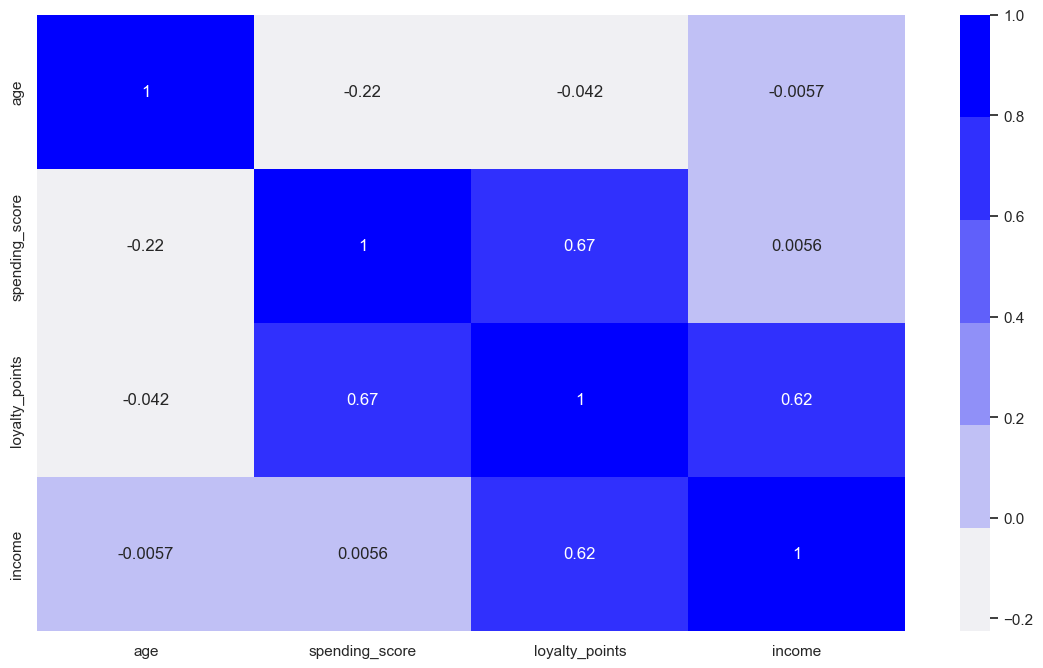

In [278]:
# Visualise the correlation between variables using a heatmap. 

# Generate a range of six blues.
blue_palette = sns.light_palette("blue", n_colors=6)

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.heatmap(reviews_final.corr(), annot = True, cmap=blue_palette)

# Save the plot.
plt.savefig('Correlation matrix')

# View the plot.
plt.show()

### 1.3.1 Visualisation of variables. 

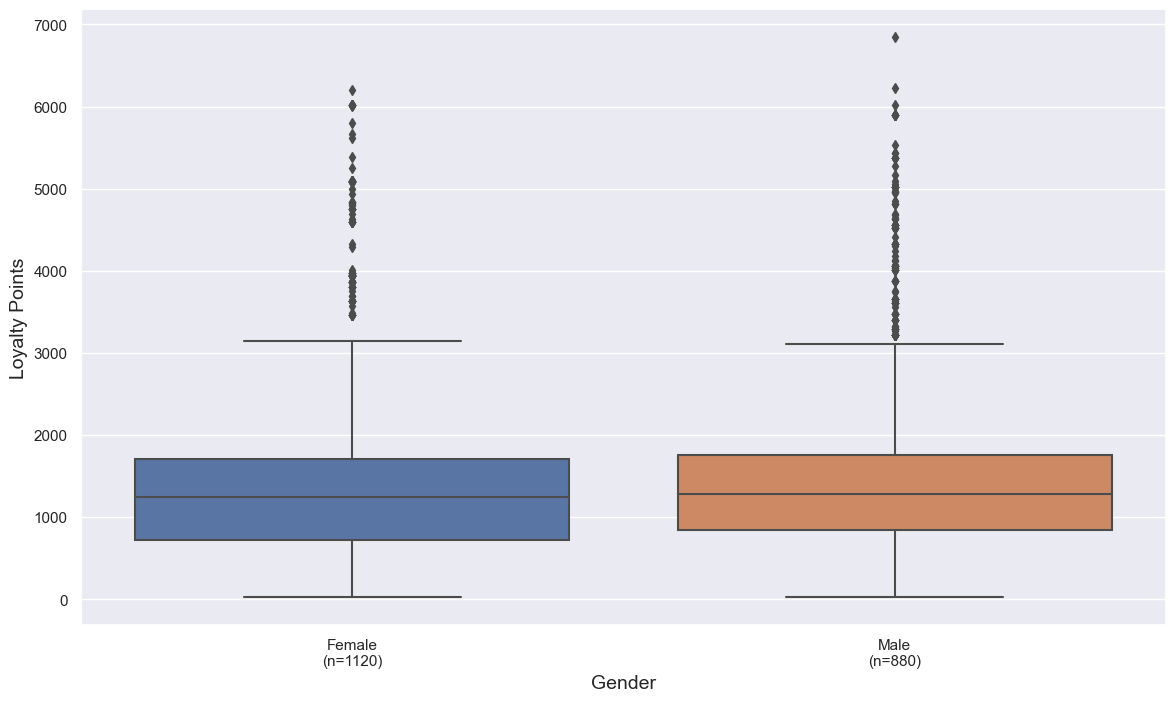

In [279]:
# Create a boxplot using Seaborn of gender versus loyalty points. 
# The output shows that gender does not appear to have a notable impact on loyalty points.
# This variable will not be explored further. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.boxplot(data=reviews_final, x='gender', y='loyalty_points')

# Add the count of observations for gender to the x-axis labels.
gender_counts = reviews_final['gender'].value_counts()
labels = [f'{gender}\n(n={count})' for gender, count in zip(gender_counts.index, gender_counts.values)]
ax.set_xticklabels(labels)

# Set the x-axis label and adjust the font size.
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Loyalty Points', fontsize=14)

# Save the plot.
plt.savefig('Gender')

# View the plot.
plt.show()

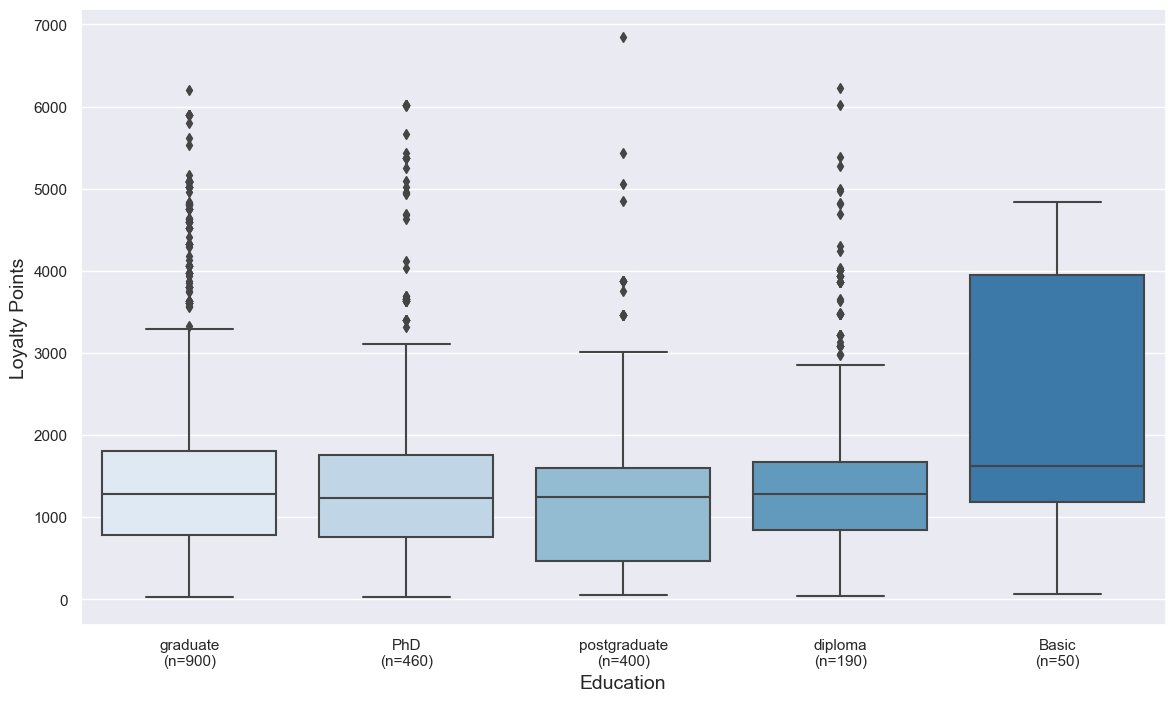

In [280]:
# Create a boxplot using Seaborn of education versus loyalty points. 
# Output appears to show a link between basic education and higher accumulated loyalty points.

# Define the blue color palette
blue_palette = sns.color_palette('Blues')

# Create the boxplot and set the color palette
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.boxplot(data=reviews_final, x='education', y='loyalty_points', palette=blue_palette)

# Add the count of observations for each education type to the x-axis labels.
edu_counts = reviews_final['education'].value_counts()
labels = [f'{edu}\n(n={count})' for edu, count in zip(edu_counts.index, edu_counts.values)]
ax.set_xticklabels(labels)

# Set the x-axis label and adjust the font size.
ax.set_xlabel('Education', fontsize=14)
ax.set_ylabel('Loyalty Points', fontsize=14)

# Save the plot.
plt.savefig('Education')

# View the plot.
plt.show()

In [281]:
# Check the count of each education type. 
# The output shows that there are only 50 customers with basic education.
# This is too low to be significant.
# This variable will not be explored further.
reviews_final['education'].value_counts()

graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: education, dtype: int64

<AxesSubplot:xlabel='spending_score', ylabel='loyalty_points'>

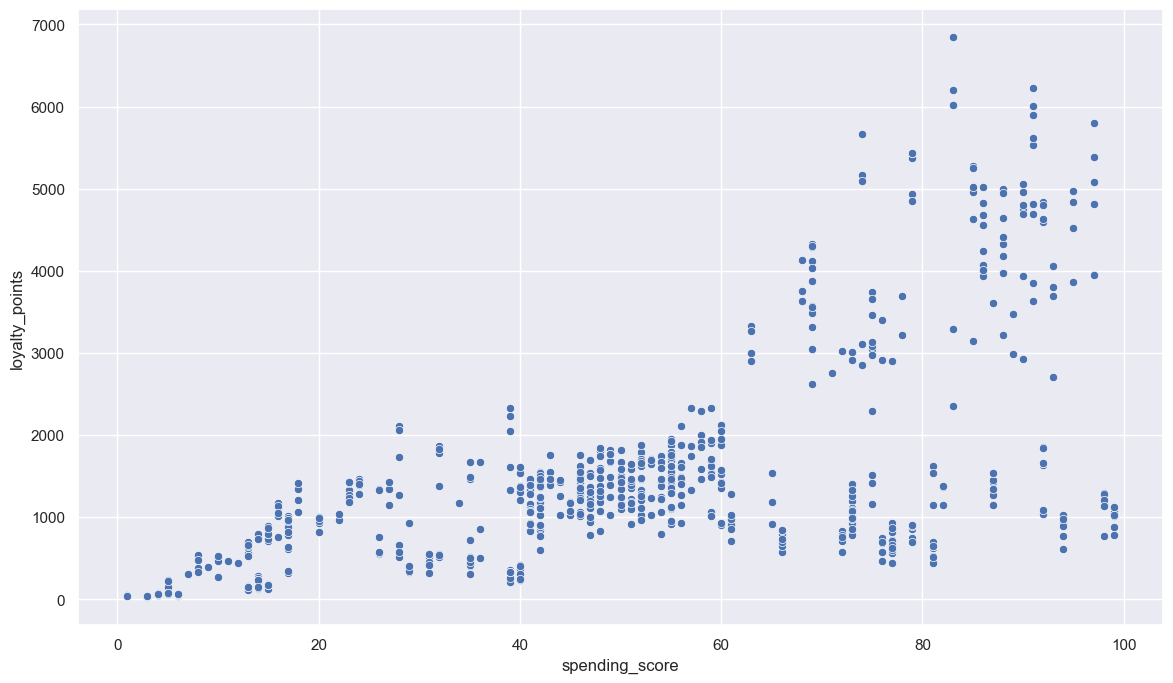

In [282]:
# Create a scatterplot using Seaborn of spending score versus loyalty points. 
# The output shows a positive relationship and this will be investigated further. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.scatterplot(data=reviews_final, x='spending_score', y='loyalty_points')

<AxesSubplot:xlabel='income', ylabel='loyalty_points'>

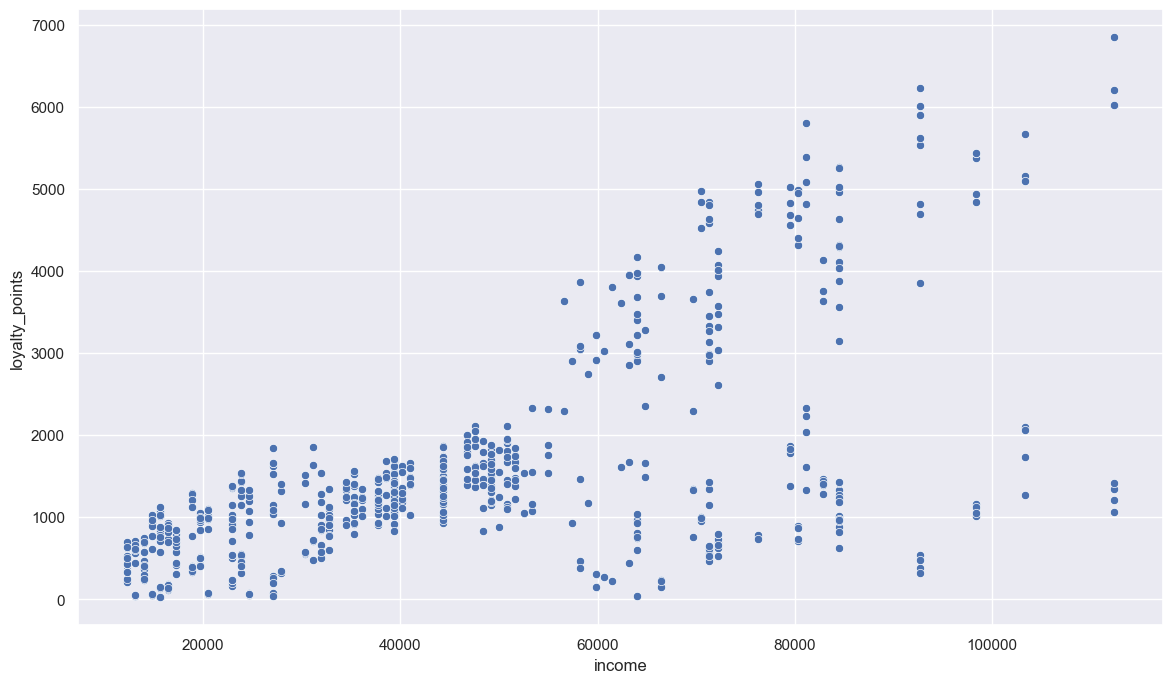

In [283]:
# Create a scatterplot using Seaborn of income versus loyalty points. 
# The output shows a positive relationship and this will be investigated further. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.scatterplot(data=reviews_final, x='income', y='loyalty_points')

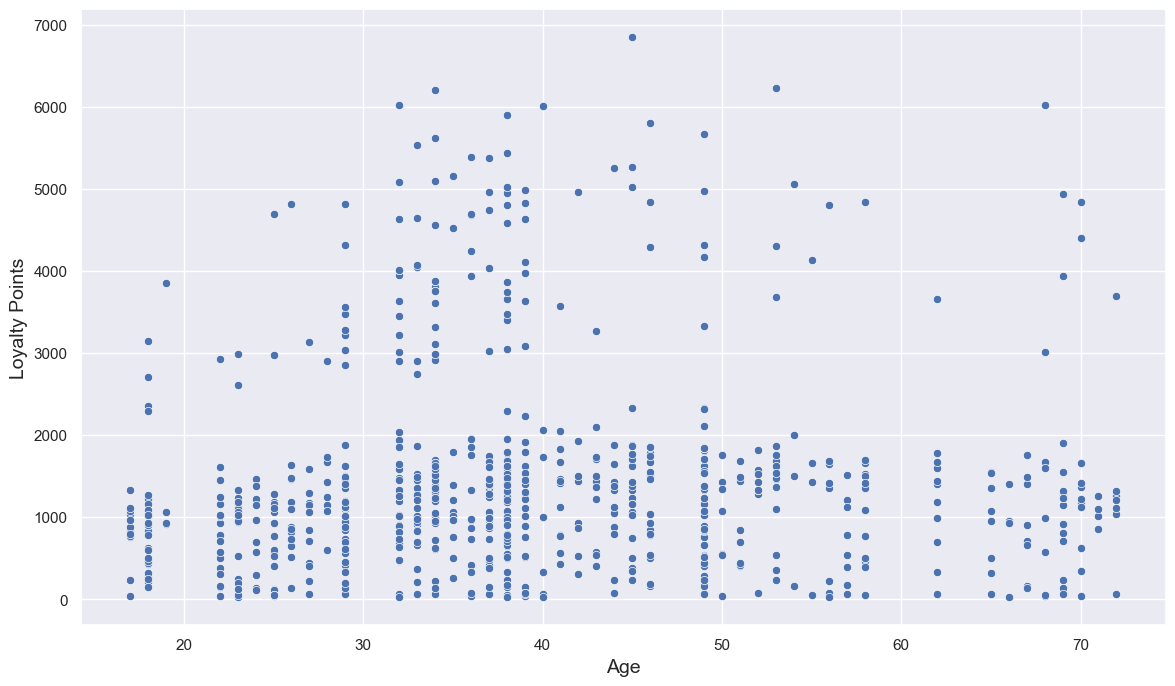

In [284]:
# Create a scatterplot using Seaborn of age versus loyalty points. 
# The output does not show a clear relationship but this needs to be confirmed.
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.scatterplot(data=reviews_final, x='age', y='loyalty_points')

# Set the x-axis label and adjust the font size.
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Loyalty Points', fontsize=14)

# View the plot.
plt.savefig('Age')

# View the plot.
plt.show()

### 1.3.2 Identification of outliers. 

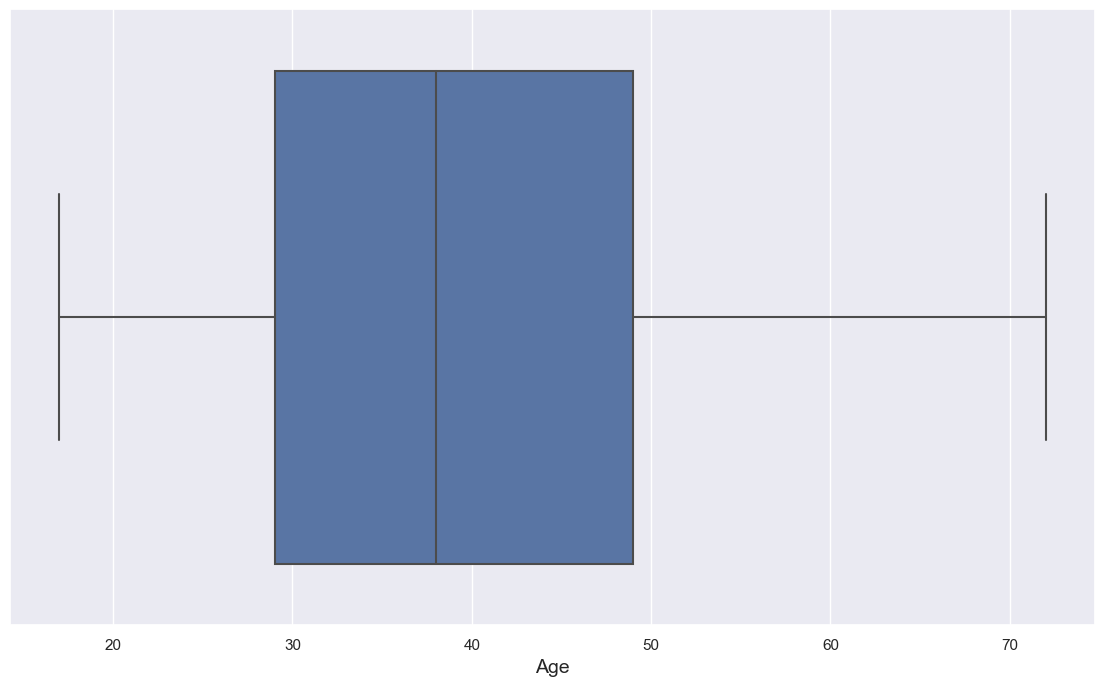

In [285]:
# Create a boxplot using Seaborn to check the age variable for outliers.
# Output shows that none were detected.
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.boxplot(reviews_final['age'])

# Set the x-axis label and adjust the font size.
ax.set_xlabel('Age', fontsize=14)

# View the plot.
plt.show()

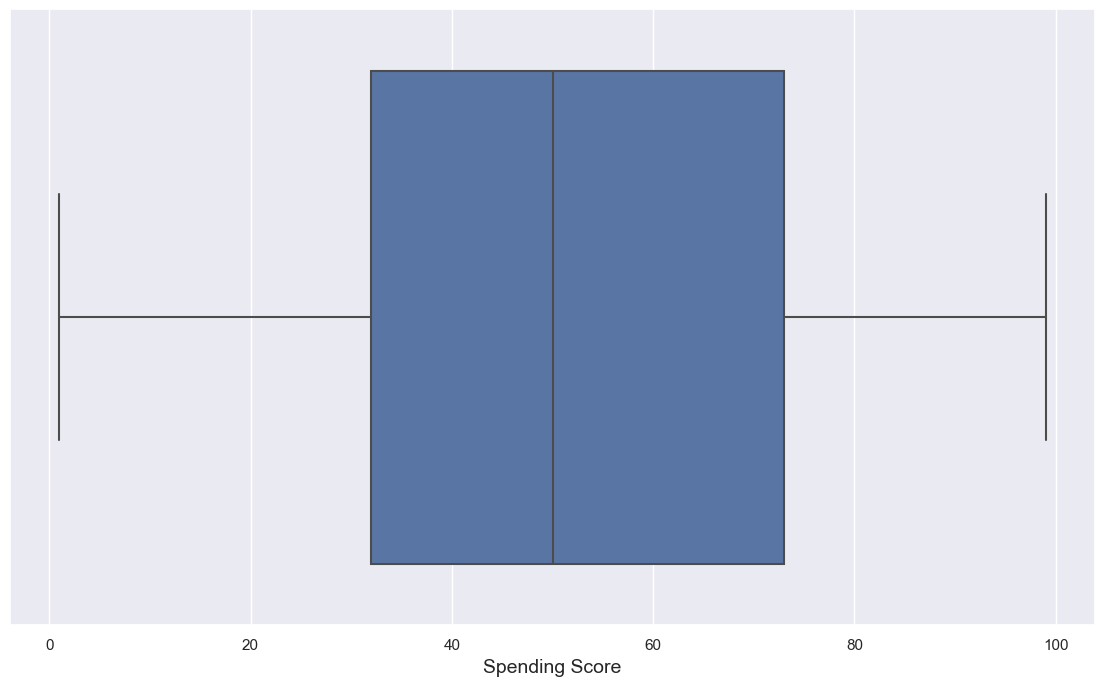

In [286]:
# Create a boxplot using Seaborn to check the spending score variable for outliers.
# Output shows that none were detected. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.boxplot(reviews_final['spending_score'])

# Set the x-axis label and adjust the font size.
ax.set_xlabel('Spending Score', fontsize=14)

# View the plot.
plt.show()

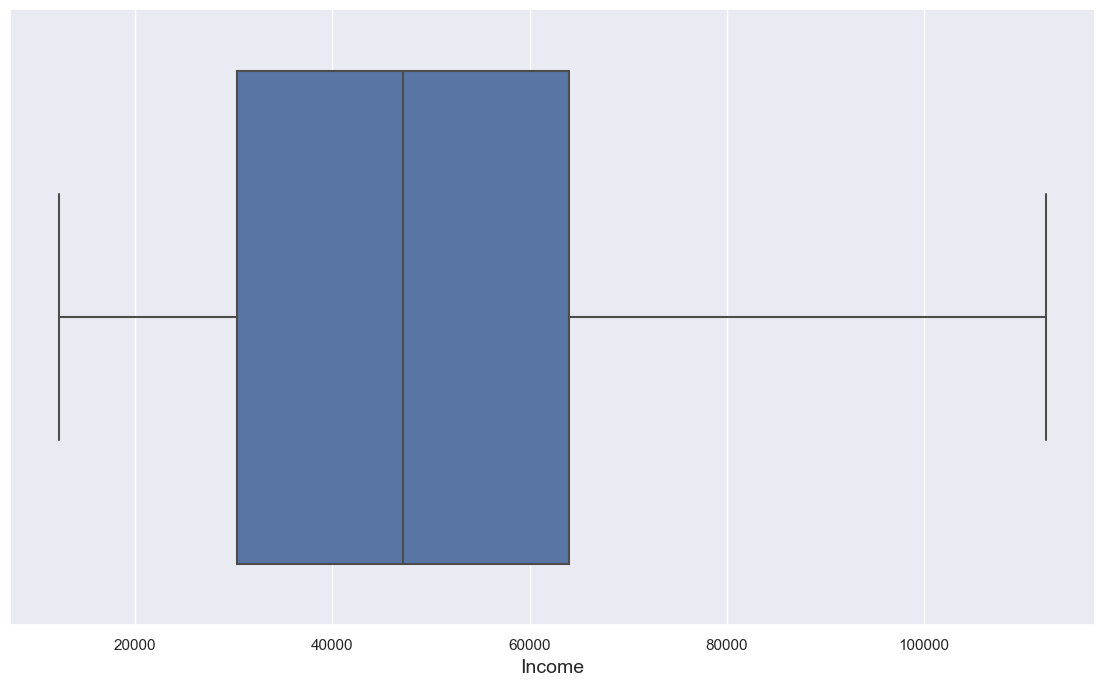

In [287]:
# Create a boxplot using Seaborn to check the income variable for outliers.
# Output shows that none were detected. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.boxplot(reviews_final['income'])

# Set the x-axis label and adjust the font size.
ax.set_xlabel('Income', fontsize=14)

# View the plot.
plt.show()

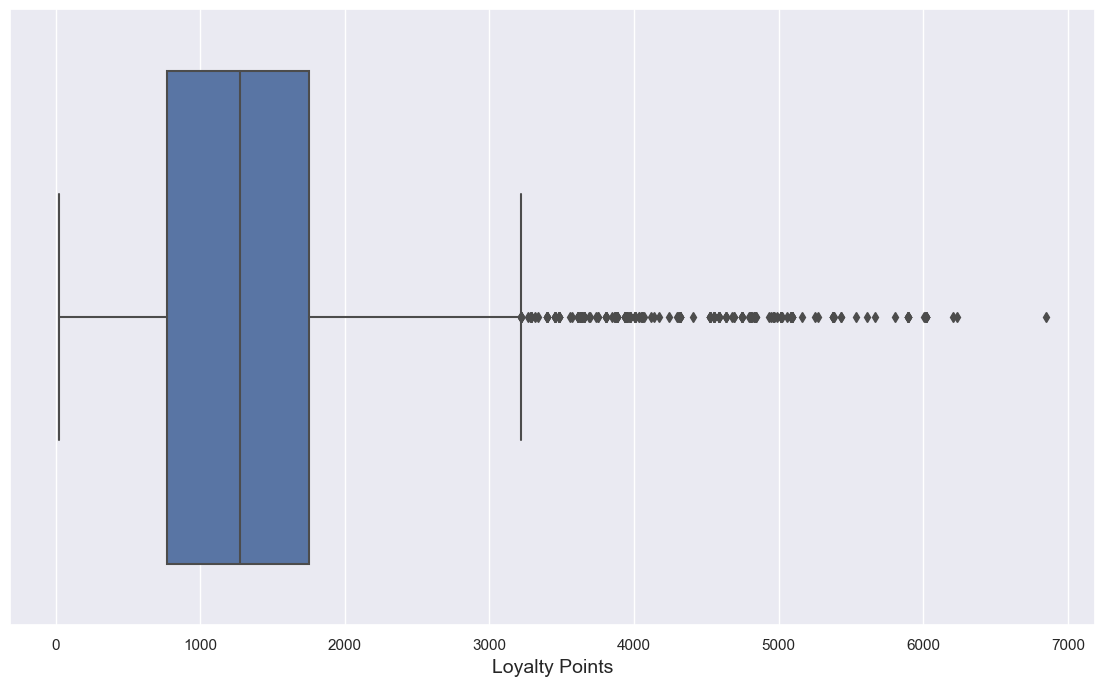

In [288]:
# Create a boxplot using Seaborn to check the loyalty points variable for outliers.
# Output shows that a high number of outliers were detected.
# These will not be removed. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.boxplot(reviews_final['loyalty_points'])

# Set the x-axis label and adjust the font size.
ax.set_xlabel('Loyalty Points', fontsize=14)

# Save the plot.
plt.savefig('Loyalty_outliers')

# View the plot.
plt.show()

## 1.4. Investigation into variable relationships using linear regression.  

This section of the analysis will use linear regression to further assess what factors impact how customers accumulate their loyalty points. It will use simple and multiple linear regression models to investigate any relationship(s) between accumulated loyalty points and income, spending score, and / or age.

In [289]:
# Install the statsmodels package.
!pip install statsmodels
!pip install scipy

# Import necessaary libraries. 
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import scipy as scp
import sklearn
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

### 1.4.1. Simple linear regression models using the OLS method. 

This section uses the ordinary least squares (OLS) method to estimate simple linear regression models and fit regression lines to observed data. Three simple linear regression models have been created for loyalty points versus spending score, income, and age. Model accuracy was assessed using R-squared values, as well as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Mean Squared Error (MSE). These are measures of the difference between the predicted and actual values. The closer to zero these measures are, the more accurate the model is. 

#### 1.4.1.1 Loyalty Points vs Spending Score.

Looking at the regression table for the model, the p-value (Prob (F-statistic)) is < 0.05 (2.92e-263) and means there is a significant relationship between spending score and accumulated loyalty points. The coefficient of x indicates that for every unit increase of spending score, loyalty points will increase by 33.06 units. However, the R-squared value shows that just 45% of loyalty points variation can be explained by spending score. Accuracy metrics also showed high levels of error. When the linear model was visualised, the scatterplot showed a cone-like shape, which is a sign of heteroscedasticity. This was confirmed with a Breusch-Pagan test.

In [290]:
# Set the independent variable (spending_score). 
x = reviews_final[['spending_score']]   

# Set the dependent variable (loyalty_points). 
y = reviews_final['loyalty_points']  

# Define the regression formula as y being a function of x.
f = 'y ~ x'

# Fit the linear regression model to the data using the OLS method. 
test1 = ols(f, data = reviews_final).fit()

# Print the regression table.
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        16:35:27   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
# Extract the estimated parameters e.g. intercept and estimated slope coefficient. 
print("Parameters: ", test1.params)  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64


In [292]:
# Fit the model to predict the value of loyalty points (y_pred1) based on spending score. 
# Use the estimated slope coefficient and add the estimated intercept values. 
y_pred1 = (-75.052663) + 33.061693 * reviews_final['spending_score']

# View the output.
y_pred1

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

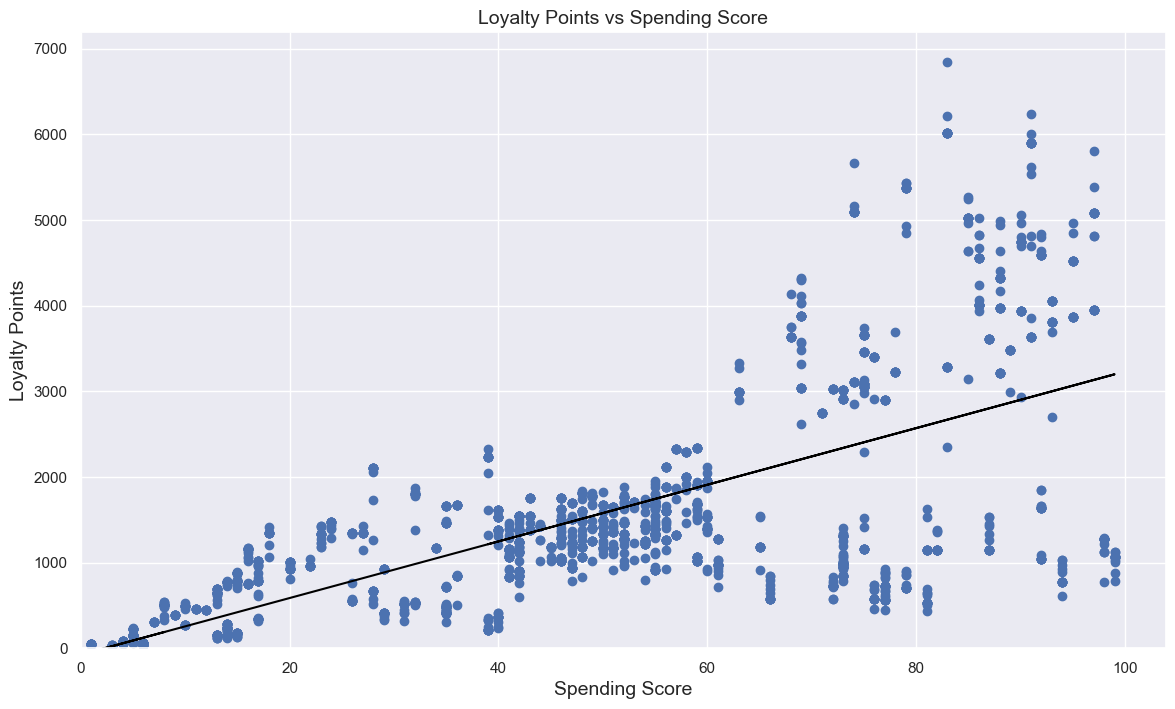

In [293]:
# Visualise the simple linear regression model.  

# Plot the data points with a scatterplot.
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.scatter(x, y)

# Plot the regression line in black.
# Add a title to the chart.
# Add axes titles. 
plt.plot(x, y_pred1, color='black')
plt.title("Loyalty Points vs Spending Score", fontsize=14)
plt.xlabel("Spending Score", fontsize=14)
plt.ylabel("Loyalty Points", fontsize=14)

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Save the plot.
plt.savefig('Loyalty vs Spending scatter')

# View the plot.
plt.show()

# The resulting scatterplot shows a cone-like shape and is a sign of heteroscedasticity.

In [294]:
# Check the accuracy of the model. 
# Use r2_score, mean_squared_error, and mean_absolute_error functions from Metrics. 

# Calculate R squared. 
R_spend = r2_score(reviews_final['loyalty_points'], y_pred1)
print("R squared: ", R_spend)

# Calculate RMSE
RMSE_spend = mean_squared_error(reviews_final['loyalty_points'], y_pred1, squared=False)
print("RMSE: ", RMSE_spend)

# Calculate MAE
MAE_spend = mean_absolute_error(reviews_final['loyalty_points'], y_pred1)
print("MAE: ", MAE_spend)

# Calculate MSE.
MSE_spend = mean_squared_error(y, y_pred1)
print("MSE:", MSE_spend)

# Output shows high levels of error with this model, and only 45% of variance in loyalty points explained by income. 

R squared:  0.4520008865838908
RMSE:  949.7058558308752
MAE:  668.518657058
MSE: 901941.212599455


In [295]:
# Check for heteroscedasticity.
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test1 = sms.het_breuschpagan(test1.resid, test1.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test1)))

# The output shows that the LM Test p-value is 5.04e-139 i.e. <<<< 0.05. 
# Therefore reject the null hypothesis (homoscedasticity) and assume heteroscedasticity. 

{'LM stat': 629.982336021591, 'LM Test p-value': 5.042699614942813e-139, 'F-stat': 918.7507142907726, 'F-test p-value': 2.3037887924501407e-166}


#### 1.4.1.2 Loyalty Points vs Income. 

Looking at the regression table for the model, the p-value (Prob (F-statistic)) is < 0.05 (2.43e-209) and means there is a significant relationship between income and accumulated loyalty points. However, the coefficient of x indicates that for every unit increase of income, loyalty points will increase by just 0.03 units. In addition, the R-squared value shows that just 38% of loyalty points variation can be explained by income. Accuracy metrics also showed high levels of error. In addition, when the linear model was visualised, the scatterplot showed a cone-like shape, which is a sign of heteroscedasticity. This was confirmed with a Breusch-Pagan test.

In [296]:
# Set the independent variable (income). 
x = reviews_final[['income']]  

# Set the dependent variable (loyalty_points). 
y = reviews_final['loyalty_points']  

# Define the regression formula as y being a function of x.
f = 'y ~ x'

# Fit the linear regression model to the data using the OLS method. 
test2 = ols(f, data = reviews_final).fit()

# Print the regression table.
test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        16:35:28   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x              0.0342      0.001     34.960      0.000       0.032       0.036
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                     1.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [297]:
# Extract the estimated parameters e.g. intercept and estimated slope coefficient. 
print("Parameters: ", test2.params)  

Parameters:  Intercept   -65.686513
x             0.034188
dtype: float64


In [298]:
# Fit the model to predict the value of loyalty points (y_pred2) based on spending_score. 
# Use the estimated slope coefficient and add the estimated intercept values. 
y_pred2 = (-65.686513) + 0.034188 * reviews_final['income']

# View the output.
y_pred2

0        354.825887
1        354.825887
2        382.860047
3        382.860047
4        410.894207
           ...     
1995    2821.831967
1996    3102.173567
1997    3102.173567
1998    3298.412687
1999    3102.173567
Name: income, Length: 2000, dtype: float64

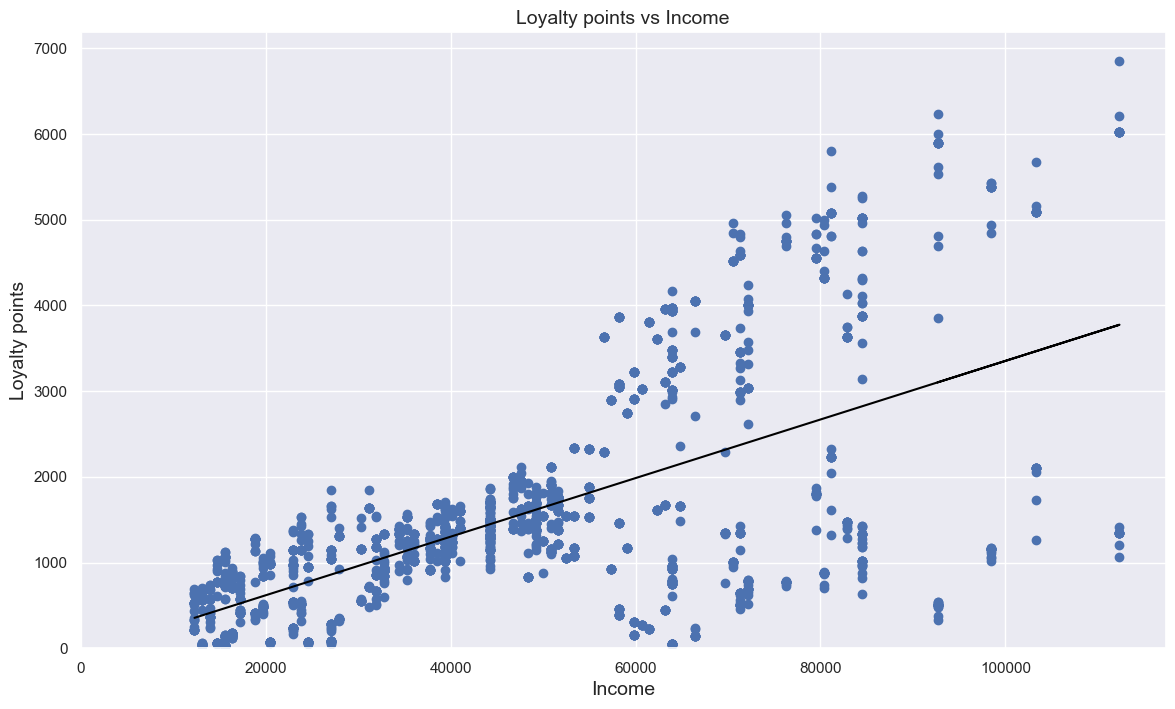

In [299]:
# Visualise the simple linear regression model.  

# Plot the data points with a scatterplot.
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.scatter(x, y)

# Plot the regression line in black.
# Add a title to the chart.
# Add axes titles. 
plt.plot(x, y_pred2, color='black')
plt.title("Loyalty points vs Income", fontsize=14)
plt.xlabel("Income", fontsize=14)
plt.ylabel("Loyalty points", fontsize=14)

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

# The resulting scatterplot shows a cone-like shape and is a sign of heteroscedasticity.

In [300]:
# Check the accuracy of the model.
# Use r2_score, mean_squared_error, and mean_absolute_error functions from Metrics. 

# Calculate R squared. 
R_income = r2_score(reviews_final['loyalty_points'], y_pred2)
print("R squared: ", R_income)

# Calculate RMSE
RMSE_income = mean_squared_error(reviews_final['loyalty_points'], y_pred2, squared=False)
print("RMSE: ", RMSE_income)

# Calculate MAE
MAE_income = mean_absolute_error(reviews_final['loyalty_points'], y_pred2)
print("MAE: ", MAE_income)

# Calculate MSE.
MSE_income = mean_squared_error(y, y_pred2)
print("MSE:", MSE_income)

# Output shows high levels of error with this model, and only 38% of variance in loyalty points explained by income. 

R squared:  0.3795357732267026
RMSE:  1010.5494299996187
MAE:  716.300819906
MSE: 1021210.1504725543


In [301]:
# Check for heteroscedasticity. 
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test2 = sms.het_breuschpagan(test2.resid, test2.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test2)))

# The output shows that the LM Test p-value is 7.15e-228 i.e. <<<< 0.05. 
# Therefore reject the null hypothesis (homoscedasticity) and assume heteroscedasticity. 

{'LM stat': 1038.6445487288279, 'LM Test p-value': 7.153051772823832e-228, 'F-stat': 2158.631134421931, 'F-test p-value': 3.68e-320}


#### 1.4.1.3 Loyalty Points vs Age. 

Looking at the regression table for the model, the p-value (Prob (F-statistic)) is > 0.05 (0.0577) and means there is not a significant relationship between age and loyalty point. In addition, the coefficient of x indicates that for every unit increase of income, loyalty points will decrease by -4.01 units and the R-squared value shows that just 0.2% of loyalty points variation can be explained by age.

Therefore, the relationship between accumulated loyalty points and age will not be investigated any further.

In [302]:
# Set the independent variable (age). 
x = reviews_final[['age']] 

# Set the dependent variable (loyalty_points). 
y = reviews_final['loyalty_points']  

# Define the regression formula as y being a function of x.
f = 'y ~ x'

# Fit the linear regression model to the data using the OLS method.
test3 = ols(f, data = reviews_final).fit()

# Print the regression table.
test3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0577
Time:                        16:35:28   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
# Extract the estimated parameters e.g. intercept and estimated slope coefficient. 
print("Parameters: ", test3.params)  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64


In [304]:
# Fit the model to predict the value of loyalty points (y_pred3) based on spending_score. 
# Use the estimated slope coefficient and add the estimated intercept values. 
y_pred3 = 1736.517739 + (-4.012805) * reviews_final['age']

# View the output.
y_pred3

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

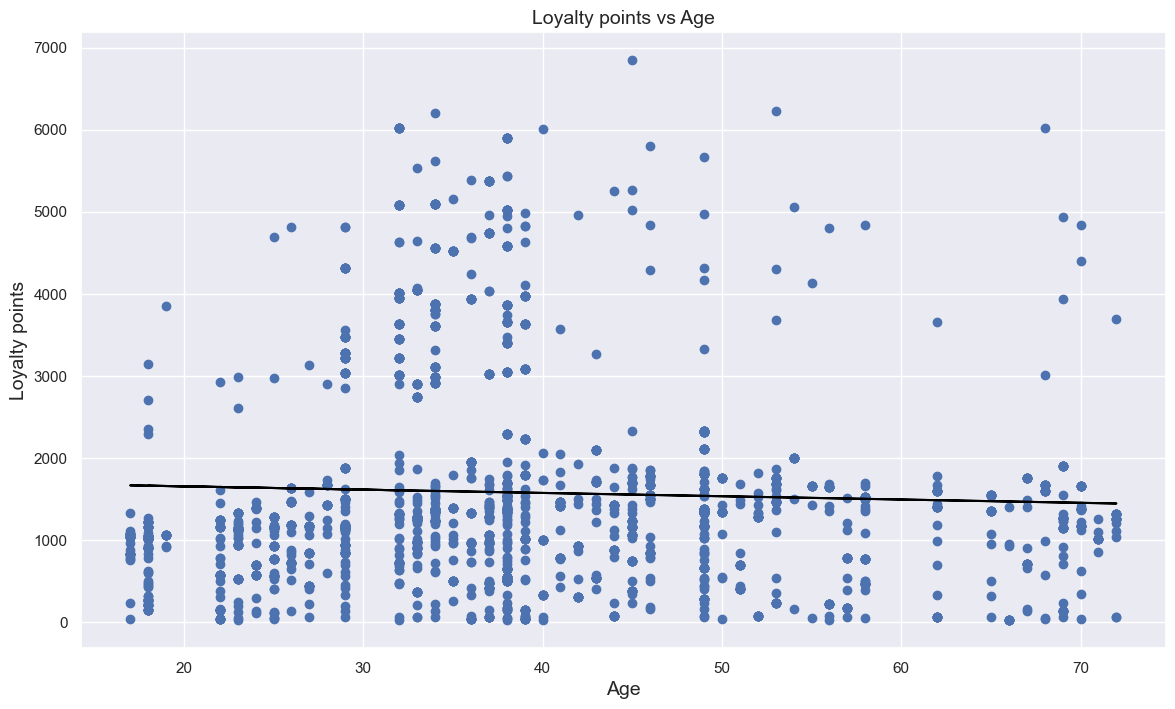

In [305]:
# Visualise the simple linear regression model.  

# Plot the data points with a scatterplot.
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.scatter(x, y)

# Plot the regression line in black.
# Add a title to the chart.
# Add axes titles. 
plt.plot(x, y_pred3, color='black')
plt.title("Loyalty points vs Age", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Loyalty points", fontsize=14)

# View the plot.
plt.show()

# The resulting scatterplot shows a cone-like shape and is a sign of heteroscedasticity.

In [306]:
# Check the accuracy of the model. 
# Use r2_score, mean_squared_error, and mean_absolute_error functions from Metrics. 

# Calculate R squared. 
R_age = r2_score(reviews_final['loyalty_points'], y_pred3)
print("R squared: ", R_age)

# Calculate RMSE
RMSE_age = mean_squared_error(reviews_final['loyalty_points'], y_pred3, squared=False)
print("RMSE: ", RMSE_age)

# Calculate MAE
MAE_age = mean_absolute_error(reviews_final['loyalty_points'], y_pred3)
print("MAE: ", MAE_age)

# Calculate MSE.
MSE_age = mean_squared_error(y, y_pred3)
print("MSE:", MSE_age)

# Output shows high levels of error with this model, and only 0.2% of variance in loyalty points explained by age. 

R squared:  0.0018015480437203468
RMSE:  1281.7627138679861
MAE:  928.745495833
MSE: 1642915.6546622247


### 1.4.2 Data transformation to reduce heteroscedasticity.

In order to reduce the heteroscedasticity seen for the loyalty points vs income and the loyalty points vs spending_score linear models, the data has been log transformed.

In [307]:
# Create new Dataframe to hold the log transformed data. 
reviews_log = reviews_final.copy() 

In [308]:
# Create new columns containing the log transformed values of loyalty points, spending score, and income. 
reviews_log['log_loyalty'] = np.log(reviews_log['loyalty_points'])
reviews_log['log_spending'] = np.log(reviews_log['spending_score'])
reviews_log['log_income'] = np.log(reviews_log['income'])
reviews_log.head()

gender  age  spending_score  loyalty_points education   income  \
0    Male   18              39             210  graduate  12300.0   
1    Male   23              81             524  graduate  12300.0   
2  Female   22               6              40  graduate  13120.0   
3  Female   25              77             562  graduate  13120.0   
4  Female   33              40             366  graduate  13940.0   

   log_loyalty  log_spending  log_income  
0     5.347108      3.663562    9.417355  
1     6.261492      4.394449    9.417355  
2     3.688879      1.791759    9.481893  
3     6.331502      4.343805    9.481893  
4     5.902633      3.688879    9.542518

### 1.4.3 Simple linear regression with transformed data. 

The linear models will be created again but using the log transformed data in order to reduce the heteroscedasticity.

#### 1.4.3.1 Loyalty Points (log) vs Spending Score (log). 

Looking at the regression table for the model, the p-value (Prob (F-statistic)) is < 0.05 (0) and means there is still a significant relationship between spending score and accumulated loyalty points. The R-squared value has increased for this model, from 45% to 67%. Accuracy metrics also showed significantly lower levels of error (RMSE = 0.82, MSE = 0.34, MAE = 0.48). A Breusch-Pagan test shows that although heteroscedasticity was still present, it was significantly reduced.

In [309]:
# Set the independent variable (log_spending). 
x = reviews_log[['log_spending']]   

# Set the dependent variable (log_loyalty). 
y = reviews_log['log_loyalty']  

# Define the regression formula as y being a function of x.
f = 'y ~ x'

# Fit the linear regression model to the data using the OLS method. 
test4 = ols(f, data = reviews_log).fit()

# Print the regression table.
test4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     4033.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:35:29   Log-Likelihood:                -1773.1
No. Observations:                2000   AIC:                             3550.
Df Residuals:                    1998   BIC:                             3561.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3011      0.059     55.543      0.000       3.185       3.418
x              1.0009      0.016     63.506      0.000       0.970       1.032
==============================================================================
Omnibus:                      118.243   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.076
Skew:                          -0.537   Prob(JB):                     1.03e-25
Kurtosis:                       2.524   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
# Extract the estimated parameters e.g. intercept and estimated slope coefficient. 
print("Parameters: ", test4.params)  

Parameters:  Intercept    3.301107
x            1.000892
dtype: float64


In [311]:
# Fit the model to predict the value of loyalty points (y_pred4) based on spending_score. 
# Use the estimated slope coefficient and add the estimated intercept values. 
y_pred4 = 3.301107 + 1.000892 * reviews_log['log_spending']

# View the output.
y_pred4

0       6.967937
1       7.699476
2       5.094465
3       7.648787
4       6.993277
          ...   
1995    7.538990
1996    5.382403
1997    7.815990
1998    6.076169
1999    5.382403
Name: log_spending, Length: 2000, dtype: float64

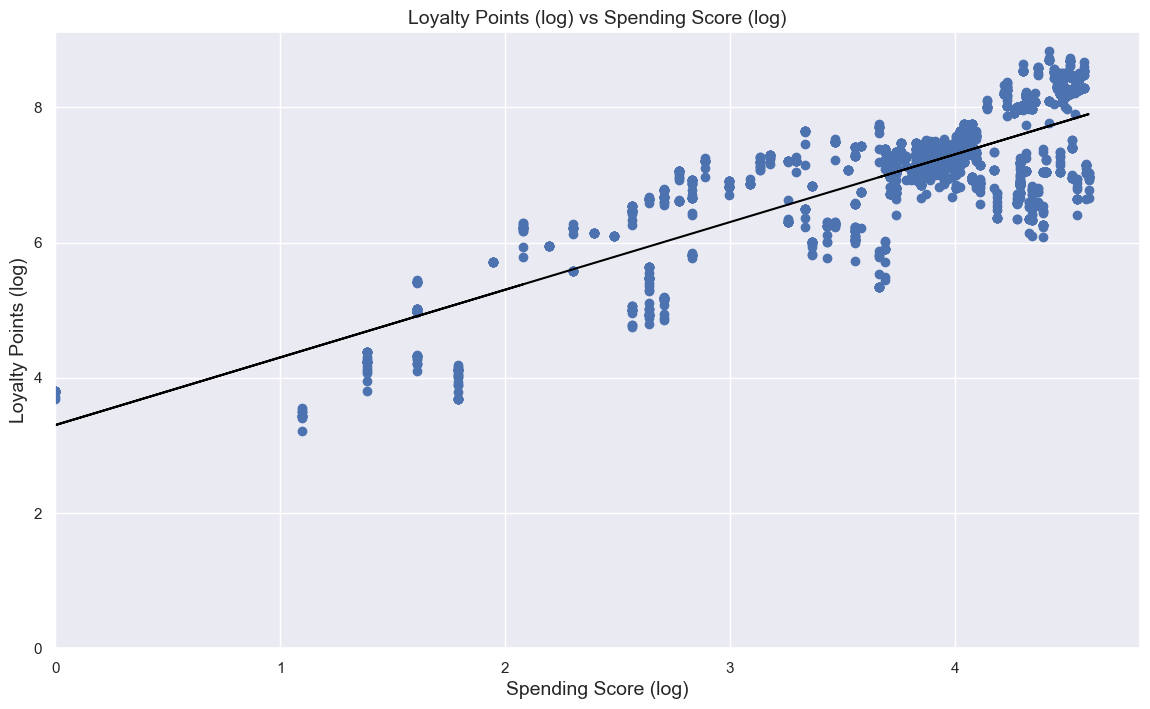

In [312]:
# Visualise the simple linear regression model.  

# Plot the data points with a scatterplot.
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.scatter(x, y)

# Plot the regression line in black.
# Add a title to the chart.
# Add axes titles. 
plt.plot(x, y_pred4, color='black')
plt.title("Loyalty Points (log) vs Spending Score (log)", fontsize=14)
plt.xlabel("Spending Score (log)", fontsize=14)
plt.ylabel("Loyalty Points (log)", fontsize=14)

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Save the plot.
plt.savefig('Loyalty vs Spending scatter log')

# View the plot.
plt.show()

In [313]:
# Check the accuracy of the model. 
# Use r2_score, mean_squared_error, and mean_absolute_error functions from Metrics. 

# Calculate R squared. 
R_spend_log = r2_score(reviews_log['log_loyalty'], y_pred4)
print("R squared: ", R_spend_log)

# Calculate RMSE
RMSE_spend_log = mean_squared_error(reviews_log['log_loyalty'], y_pred4, squared=False)
print("RMSE: ", RMSE_spend_log)

# Calculate MAE
MAE_spend_log = mean_absolute_error(reviews_log['log_loyalty'], y_pred4)
print("MAE: ", MAE_spend_log)

# Calculate MSE.
MSE_spend_log = mean_squared_error(y, y_pred4)
print("MSE:", MSE_spend_log)

# Output shows significantly lower levels of error with this model and a higher R squared value (67%). 

R squared:  0.6687132084855714
RMSE:  0.5872025619637045
MAE:  0.481173403120738
MSE: 0.34480684877673823


In [314]:
# Check for heteroscedasticity. 
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test4 = sms.het_breuschpagan(test4.resid, test4.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test4)))

# The output shows that the LM Test p-value is 0.0025 i.e. < 0.05. 
# Although heteroscedasticity is still present, it has been significantly reduced. 

{'LM stat': 9.124777577913301, 'LM Test p-value': 0.002521705421505486, 'F-stat': 9.157432568019342, 'F-test p-value': 0.002508716257655528}


#### 1.4.3.2 Loyalty Points (log) vs Income (log). 

Looking at the regression table for the model, the p-value (Prob (F-statistic)) is < 0.05 (4.96e-183) and means there is still a significant relationship between income and accumulated loyalty points. The R-squared value has decreased slightly from 38% to 34%; however, accuracy metrics show error was significantly reduced (RMSE = 0.83, MSE = 0.69, MAE = 0.61) and heteroscedasticity has been removed from the model using the log data. 

In [315]:
# Set the independent variable (log_income). 
x = reviews_log[['log_income']] 

# Set the dependent variable (log_loyalty). 
y = reviews_log['log_loyalty']  

# Define the regression formula as y being a function of x.
f = 'y ~ x'

# Fit the linear regression model to the data using the OLS method.
test5 = ols(f, data = reviews_log).fit()

# Print the regression table.
test5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     1033.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          4.96e-183
Time:                        16:35:29   Log-Likelihood:                -2461.2
No. Observations:                2000   AIC:                             4926.
Df Residuals:                    1998   BIC:                             4938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5421      0.359    -12.650      0.000      -5.246      -3.838
x              1.0826      0.034     32.138      0.000       1.016       1.149
==============================================================================
Omnibus:                      633.083   Durbin-Watson:                   3.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1739.379
Skew:                          -1.670   Prob(JB):                         0.00
Kurtosis:                       6.118   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [316]:
# Extract the estimated parameters e.g. intercept and estimated slope coefficient. 
print("Parameters: ", test5.params)  

Parameters:  Intercept   -4.542143
x            1.082557
dtype: float64


In [317]:
# Fit the model to predict the value of loyalty points (y_pred5) based on spending_score. 
# Use the estimated slope coefficient and add the estimated intercept values. 
y_pred5 = (-4.542143) + 1.082557 * reviews_log['log_income']

# View the output.
y_pred5

0       5.652680
1       5.652680
2       5.722547
3       5.722547
4       5.788176
          ...   
1995    7.738420
1996    7.838728
1997    7.838728
1998    7.903794
1999    7.838728
Name: log_income, Length: 2000, dtype: float64

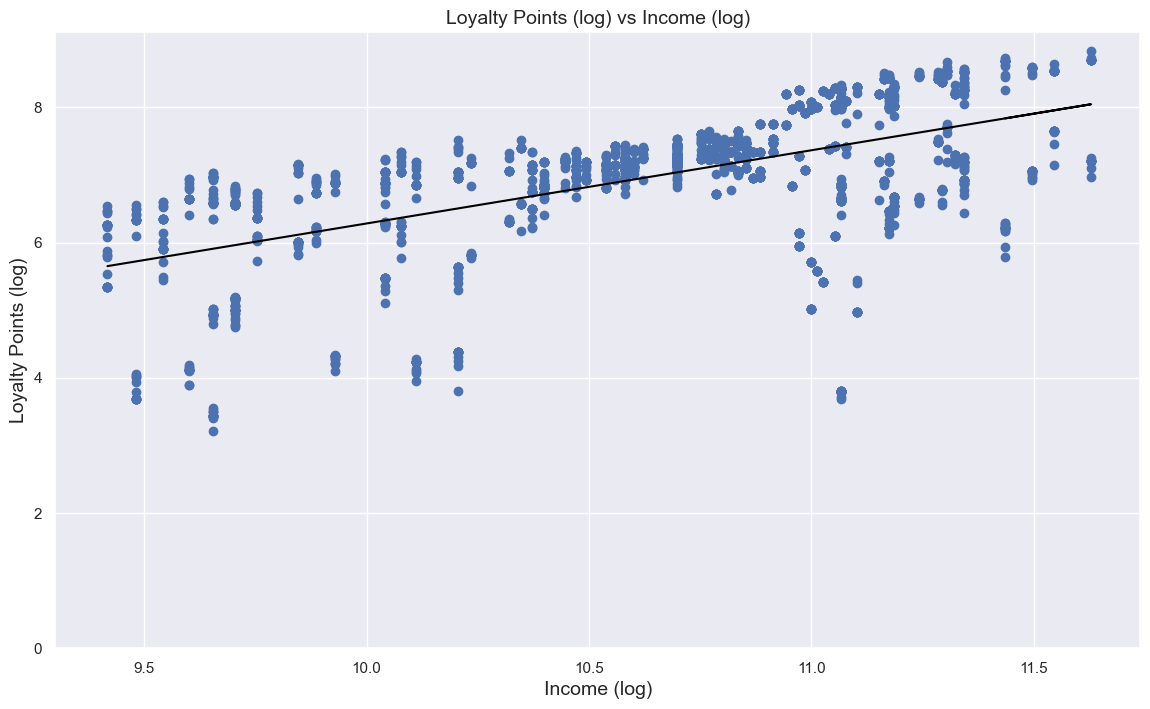

In [318]:
# Visualise the simple linear regression model.  

# Plot the data points with a scatterplot.
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.scatter(x, y)

# Plot the regression line in black.
# Add a title to the chart.
# Add axes titles. 
plt.plot(x, y_pred5, color='black')
plt.title("Loyalty Points (log) vs Income (log)", fontsize=14)
plt.xlabel("Income (log)", fontsize=14)
plt.ylabel("Loyalty Points (log)", fontsize=14)

# Set the x and y limits on the axes.
plt.xlim(9.3)
plt.ylim(0)

# Save the plot.
plt.savefig('Loyalty vs Income log')

# View the plot.
plt.show()

In [319]:
# Check the accuracy of the model. 
# Use r2_score, mean_squared_error, and mean_absolute_error functions from Metrics. 

# Calculate R squared. 
R_income_log = r2_score(reviews_log['log_loyalty'], y_pred5)
print("R squared: ", R_income_log)

# Calculate RMSE
RMSE_income_log = mean_squared_error(reviews_log['log_loyalty'], y_pred5, squared=False)
print("RMSE: ", RMSE_income_log)

# Calculate MAE
MAE_income_log = mean_absolute_error(reviews_log['log_loyalty'], y_pred5)
print("MAE: ", MAE_income_log)

# Calculate MSE.
MSE_income_log = mean_squared_error(y, y_pred5)
print("MSE:", MSE_income_log)

# Output shows significantly lower levels of error with this model and a slightly lower R squared value (34%). 

R squared:  0.34078099201339174
RMSE:  0.828324948217858
MAE:  0.6084600641970883
MSE: 0.6861222198401171


In [320]:
# Check for heteroscedasticity. 
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test5 = sms.het_breuschpagan(test5.resid, test5.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test5)))

# The output shows that the LM Test p-value is 0.18 i.e. > 0.05. 
# Therefore accept the null hypothesis and assume homoscedasticity.

{'LM stat': 1.7935219435734062, 'LM Test p-value': 0.1804976374568476, 'F-stat': 1.7933366159161641, 'F-test p-value': 0.18067248035705338}


### 1.4.4 Simple linear regression using machine learning 

Turtle Games is exploring enhancing its data analysis capacity and asked for simple linear regression models to be created with machine learning by using the LinearRegression() function from Python's Scikit-learn library.

The log transformed data has been used again for these models.

Compared to the model above, the test data for this model achieved the same R squared value for the loyalty points vs spending score (67%) and a similar R squared value for the loyalty points vs income (33%). Error metrics were also similar across models. 

Turtle Games would like any future data analysis projects to use machine learning methods to create simple linear regression models. 

#### 1.4.4.1 Loyalty Points vs Spending Score. 

In [321]:
# Use the reshape() method to ensure the data is a 2D array. 

# Set the independent variable (log_spending). 
x = reviews_log[['log_spending']].values.reshape(-1, 1)  

# Set the dependent variable (log_loyalty). 
y = reviews_log['log_loyalty'].values.reshape(-1, 1)

# Create new variable and specify the model.
lm = LinearRegression()

# Fit the model.
lm.fit(x, y) 

LinearRegression()

In [322]:
# Data paritioning.

# Split the data set into train and test subsets.
# Create the subset (30% to test). 
# Set the random state value to 42. 
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Predict the training set y values based on the x values. 
y_pred6 = lm.predict(x_train) 

# View the output
y_pred6

array([[6.13684781],
       [7.75942767],
       [7.66170212],
       ...,
       [7.33004944],
       [7.23643997],
       [6.85962661]])

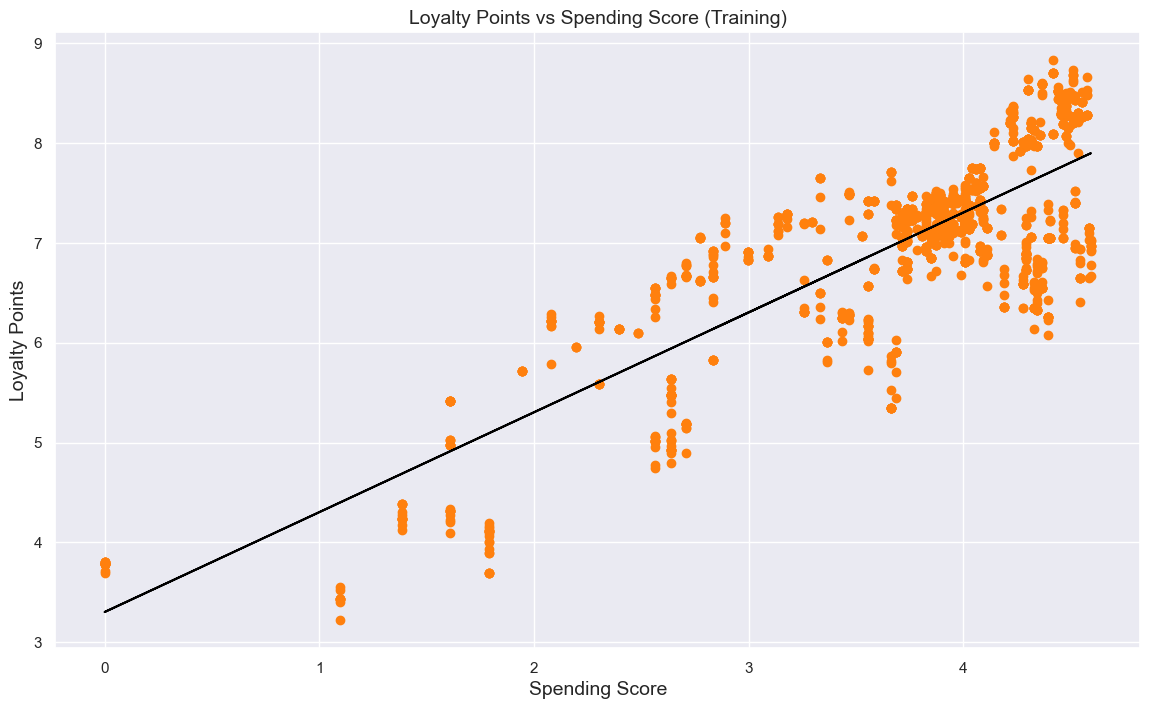

In [323]:
# Visualise the simple linear regression model.  

# Create a scatterplot of the training data set.
# Colour the data points in red.
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.scatter(x_train, y_train, color = '#FF800E')  

# Add a green regression line showing predicted y values. 
plt.plot(x_train, y_pred6, color = 'black')

# Set the title and labels for the graph.  
plt.title("Loyalty Points vs Spending Score (Training)", fontsize=14)
plt.xlabel("Spending Score", fontsize=14)
plt.ylabel("Loyalty Points",fontsize=14) 

# View the plot.
plt.show()

In [324]:
# Check accuracy of the training dataset. 

# Print R-squared value of the train data.
print("R-squared value: ", lm.score(x_train, y_train)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

# Output shows the R squared is 67%. 

R-squared value:  0.6682162767793409
Intercept value:  [3.30110748]
Coefficient value:  [[1.00089191]]


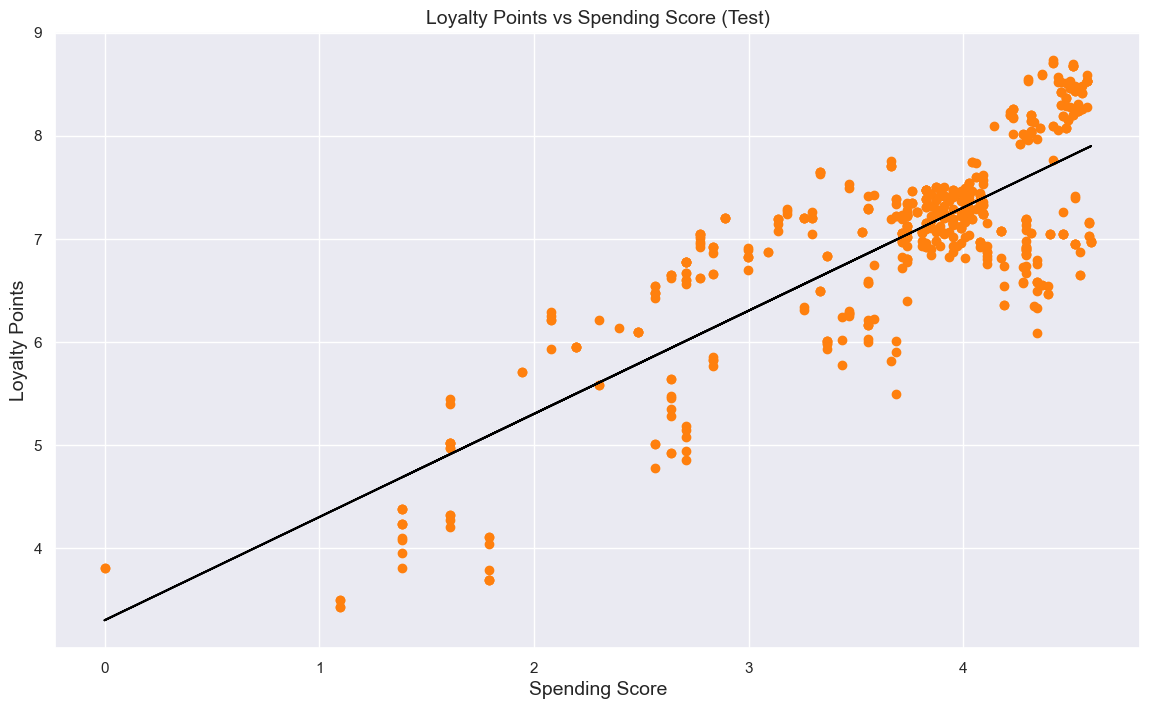

In [325]:
# Test the accuracy of the linear model with the test data set. 

# Predict the test set y values.
y_pred_test = lm.predict(x_test) 

# Plot the data points with a scatterplot.
# Colour the data points in red. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.scatter(x_test, y_test, color = '#FF800E') 

# Add a green regression line showing predicted y values. 
plt.plot(x_test, y_pred_test, color = 'black')

# Set the title and labels for the graph.  
plt.title("Loyalty Points vs Spending Score (Test)", fontsize=14)
plt.xlabel("Spending Score", fontsize=14)
plt.ylabel("Loyalty Points",fontsize=14) 

# Show the chart. 
plt.show() 

In [326]:
# Check accuracy of test data. 

# Print R-squared value of the test data.
print("R-squared value: ", lm.score(x_test, y_test)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

# R squared is 67%  - the same as the training data set. 

R-squared value:  0.6699431395692492
Intercept value:  [3.30110748]
Coefficient value:  [[1.00089191]]


In [327]:
# Check the accurary of the model with the test data. 
# Use mean_absolute_error and mean_squared_error functions from Metrics. 

# See the RMSE of the test data. 
print('RMSE:', metrics.mean_squared_error(y_test, y_pred_test, squared=False))  

# See the MAE of the test data. 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

# See the MSE of the test data. 
print('MAE:', metrics.mean_squared_error(y_test, y_pred_test))   

# Output gives scores close to zero so the model is accurate. 

RMSE: 0.5694686788797791
MAE: 0.4678541457666394
MAE: 0.32429457622508095


#### 1.4.4.2 Loyalty Points vs Income. 

In [328]:
# Prepare the data and use reshape() method to ensure it is a 2D array.  

# Set the independent variable (log_income). 
x2 = reviews_log[['log_income']].values.reshape(-1, 1)  

# Set the dependent variable (log_loyalty). 
y = reviews_log['log_loyalty'].values.reshape(-1, 1)

# Create new variable and specify the model.
lm2 = LinearRegression()

# Fit the model.
lm2.fit(x2, y) 

LinearRegression()

In [329]:
# Data paritioning.

# Split the data set into train and test subsets.
# Create the subset (30% to test). 
# Set the random state value to 42.
x_train, x_test, y_train, y_test = train_test_split(x2, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Predict the training set y values based on the x values. 
y_pred7 = lm2.predict(x_train) 

# View the output
y_pred7

array([[6.53854373],
       [7.56802938],
       [7.43744276],
       ...,
       [6.86577988],
       [6.86577988],
       [7.3356511 ]])

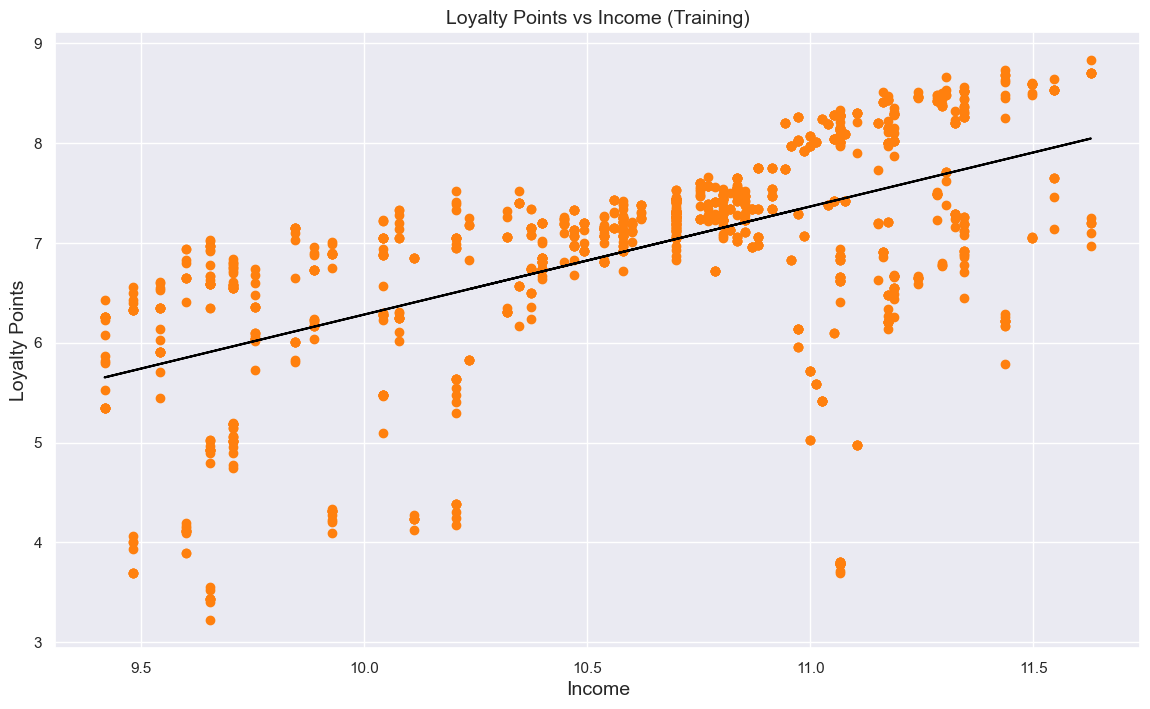

In [330]:
# Visualise the simple linear regression model.  

# Create a scatterplot of the training data set.
# Colour the data points in red.
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.scatter(x_train, y_train, color = '#FF800E')  

# Add a green regression line showing predicted y values.
plt.plot(x_train, y_pred7, color = 'black')

# Set the title and labels for the graph.  
plt.title("Loyalty Points vs Income (Training)", fontsize=14)
plt.xlabel("Income", fontsize=14)
plt.ylabel("Loyalty Points", fontsize=14) 

# Show the chart.
plt.show() 

In [331]:
# Check accuracy of the training dataset. 

# Print R-squared value of the test data.
print("R-squared value: ", lm2.score(x_train, y_train)) 

# Print the intercept value.
print("Intercept value: ", lm2.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm2.coef_)

# R squared is 35%. 

R-squared value:  0.34682968541942705
Intercept value:  [-4.54214275]
Coefficient value:  [[1.08255659]]


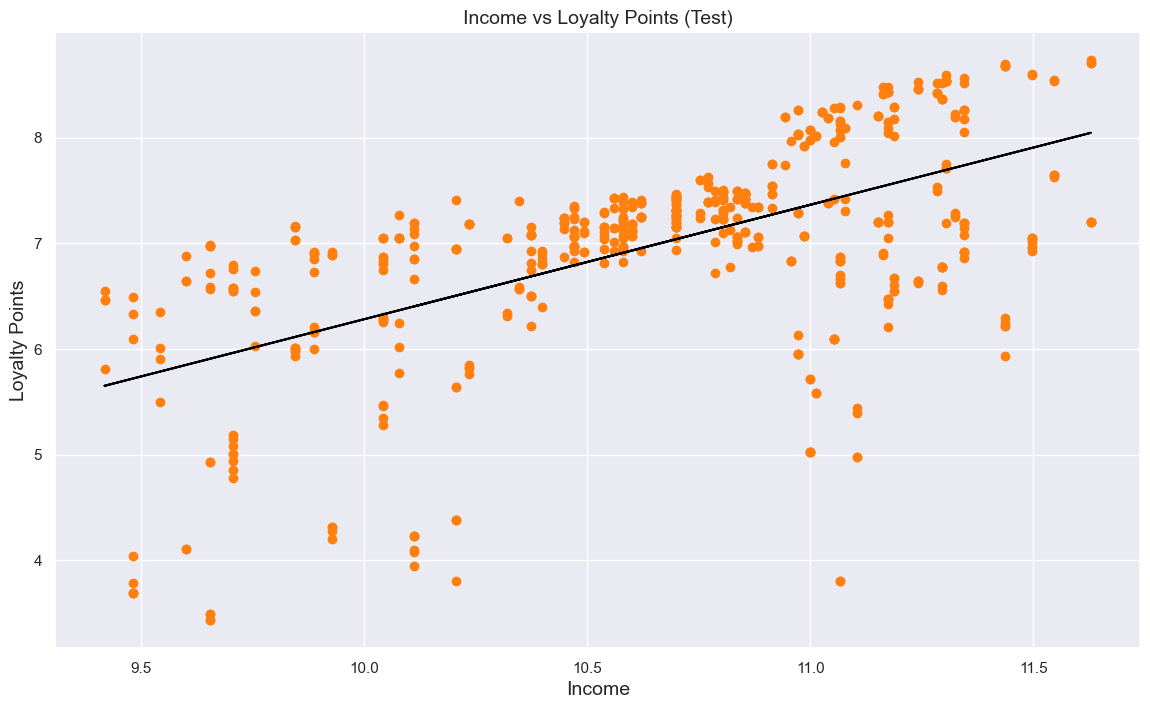

In [332]:
# Test the accuracy of the linear model with the test data set. 

# Predict the test set y values.
y_pred_test2 = lm2.predict(x_test) 

# Plot the data points with a scatterplot.
# Colour the data points in red. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.scatter(x_test, y_test, color = '#FF800E') 

# Add a green regression line showing predicted y values. 
plt.plot(x_test, y_pred_test2, color = 'black')

# Set the title and labels for the graph.  
plt.title("Income vs Loyalty Points (Test)", fontsize=14)
plt.xlabel("Income", fontsize=14)
plt.ylabel("Loyalty Points", fontsize=14) 

# Show the chart. 
plt.show() 

In [333]:
# Check accuracy of test dataset. 

# Print R-squared value of the test data.
print("R-squared value: ", lm2.score(x_test, y_test)) 

# Print the intercept value.
print("Intercept value: ", lm2.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm2.coef_)

# R squared is 33% - similar to the training dataset.

R-squared value:  0.3254169073917603
Intercept value:  [-4.54214275]
Coefficient value:  [[1.08255659]]


In [334]:
# Check the accurary of the model with the test data. 
# Use mean_absolute_error and mean_squared_error fucntions from Metrics. 

# See the RMSE of the test data. 
print('RMSE:', metrics.mean_squared_error(y_test, y_pred_test2, squared=False))  

# See the MAE of the test data. 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test2))

# See the MSE of the test data. 
print('MAE:', metrics.mean_squared_error(y_test, y_pred_test2))   

# Output gives scores close to zero so the model is accurate.  

RMSE: 0.8141289279111403
MAE: 0.607621730039749
MAE: 0.6628059112617427


### 1.4.5. Multiple linear regression

The R squared values from the linear regression models shows that spending score is more likely to predict variance in accumulated loyalty points than income (67% vs 33%). However, an R squared value of 67% is still not a strong enough predictor. Multiple linear regression has therefore been performed to see if the combination of spending score and income can better explain variation in accumulated loyalty points.

The log transformed data for the dependent and independent variables was used again for this model.

The resulting R-squared values for both the training and test data were 98%, indicating that the multiple linear regression model has performed well on both datasets and is not overfitting to the training data. The high R-squared value indicates a good fit between the model and the data, and this is a stronger model to use to predict loyalty points values (compared to simple linear regression).

The independent variables for also checked for multi-collinearity using variance inflation factor (VIF) analysis to ensure they were not excessively correlated, as this can lead to biased and unreliable model estimates. The output showed VIF scores of 1 for both spending score and income, indicating there is no correlation between the independent variables.

The model was also checked for heteroscedasticity with a Breusch-Pagan test. The LM Test p-value was 0.06 i.e., > 0.05. Therefore, accept the null hypothesis and assume homoscedasticity. 

The accuracy of the model was tested by calculating error metrics. For this model, RMSE was 0.14, MAE was 0.11,and  MSE was 0.02, indicating that model was accurate in predicting loyalty points values, and had lower levels of error compared to the simple linear regression models. 

In [335]:
# Set the dependent variable (log_loyalty).  
y = reviews_log['log_loyalty']  

# Set the independent variables (log_spending and log_income).  
# Use capital X to denote a set of independent variables. 
X = reviews_log[['log_spending', 'log_income']]

In [336]:
# Fit the mutiple linear regression model.
mlr = LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [337]:
# Call the y predictions for the X variables.
# Use the predict() method to predict the values of y for the X variables. 
mlr.predict(X) 

array([5.69366912, 6.41013485, 3.92578174, ..., 8.61999632, 6.97840311,
       6.2365548 ])

In [338]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_)

# Print the coefficients.
print("Coefficients:") 

# Map a similar index of multiple containers.
list(zip(X, mlr.coef_))  

# The R squared value for the model is 98%. 

R-squared:  0.9816384346021757
Intercept:  -7.671305037303133
Coefficients:


[('log_spending', 0.9802681212157308), ('log_income', 1.0378393875006922)]

In [339]:
# Data paritioning.

# Split the data set into train and test subsets.
# Create the subset (30% to test). 
# Set the random state value to 42.

# Split the data. 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [340]:
# Train the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
y_pred8 = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model) 

# The R squared value for the training data is 98.2%. 

                            OLS Regression Results                            
Dep. Variable:            log_loyalty   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 3.904e+04
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:35:32   Log-Likelihood:                 797.66
No. Observations:                1400   AIC:                            -1589.
Df Residuals:                    1397   BIC:                            -1574.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.6788      0.071   -107.661   

In [341]:
# Run a regression test. 

# Specify the model.
mlr2 = LinearRegression()  

# Fit the model.
mlr2.fit(X_train, Y_train)  

LinearRegression()

In [342]:
# Call the predictions for Y using the test set.
y_pred_mlr = mlr2.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [4.18649202 8.05805921 7.90832787 7.23967066 7.25927069 7.29727402
 6.0207548  6.79344127 7.30585151 8.10668932 7.0536048  7.35627181
 7.34329669 7.65371336 6.45734564 7.34172691 7.31421981 6.07090231
 5.84677734 4.21509296 7.20600985 5.73101249 6.88319636 7.14153384
 7.21059621 7.37345454 8.40618059 7.09886239 6.24268215 7.16167095
 6.15293535 6.24029126 6.18899572 7.34523133 7.28585274 7.04358528
 6.92671321 7.45171782 7.30483453 6.92671321 7.0037769  7.30585151
 7.18347092 8.54439089 8.54371627 5.33938751 7.34523133 7.25927069
 7.258659   7.20793161 6.70911674 6.8940417  6.78409088 5.05705678
 7.38683471 7.025406   6.36141715 8.45647324 6.70911674 8.15742949
 7.16674282 7.30483453 7.14405587 7.25927069 6.98273554 6.55609138
 8.21795968 5.4371384  7.50197139 7.4677849  7.10493835 8.43865083
 8.54371627 6.92671321 8.21241446 7.0037769  7.30585151 8.21795968
 7.159931   5.84677734 7.08357069 6.97209662 7.07250291 6.70911674
 7.65371336 7.29727402 6.55254475 7.3

In [343]:
# Print the R-squared value for the test data. 
print(mlr2.score(X_test, Y_test)*100) 

# The R-squared value for the test data is 98% - the same to the training data. 

97.96350374274543


#### 1.4.5.1 Check the accuracy of the multiple linear regression model. 

In [344]:
# Check the accurary of the model with the testing data. 
# Use mean_absolute_error and mean_squared_error fucntions from Metrics. 

# See the MAE of the model.  
print('MAE', metrics.mean_absolute_error(Y_test, y_pred8))  

# See the MSE of the model.
print('MSE', metrics.mean_squared_error(Y_test, y_pred8))  

# See the MSE of the model. 
print('RMSE:', metrics.mean_squared_error(y_test, y_pred8, squared=False))  

# Output gives scores close to zero so the model is accurate.  

MAE 0.10575412465033086
MSE 0.020009421705957826
RMSE: 0.14145466307604648


#### 1.4.5.2 Check data for multicollinearity 

In [345]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  

# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

# VIF = 1 for spending score and income, so there is no correlation between the independent variables. 

   VIF Factor      features
0      379.34         const
1        1.00  log_spending
2        1.00    log_income


#### 1.4.5.3 Check model for heteroscedasticity. 

In [346]:
# Check for heteroscedasticity. 
model = sms.het_breuschpagan(model.resid, model.model.exog) 

terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

# The output shows that the LM Test p-value is 0.06 i.e. > 0.05. 
# Therefore accept the null hypothesis and assume homoscedasticity.

{'LM stat': 5.601060961559012, 'LM Test p-value': 0.060777812610557466, 'F-stat': 2.8057544882721452, 'F-test p-value': 0.060801889311050274}


## Q1: Observations and insights

***This first part of the analysis aimed to understand what factors impacted the accumulation of loyalty points by Turtle Games customers. This was assessed by conducting both simple and multiple linear regression models using different independent variables.***

***Initial exploration of the data using the corr method and simple visualisations showed that there was positive relationships between loyalty points and income and spending score e.g. that higher spending scores and higher income were associated with more accumulated loyalty points. It was also deduced that there was no likely relationship between gender, education, or age and loyalty points.***

***Simple linear regression models showed positive relationships between higher levels of accumulated loyalty points and increasing income and increasing spending score. The R squared values showed that spending score was more likely to predict variance in accumulated loyalty points than income (67% vs 33%). However, an R squared value of 67% is still not a strong enough predictor.***

***Multiple linear regression was therefore used to see if the combination of spending score and income can better explain variation in accumulated loyalty points. The model gave an R squared value of 98% and is therefore a stronger model for predicting values. The model was also checked for multi-collinearity and heteroscedasticity. VIF scores of 1 indicated there was no correlation between the independent variables, and homoscedasticity was found (p = 0.06). MAE, MSE, and RMSE values also showed that the model was more accurate in predicting loyalty points values compared to the simple linear regression models.***

***Turtle Games can use this model to predict how a customer's spending score and income impacts loyalty points. The marketing department could use the spending score and income to segment customers into different "loyalty" groups and target their marketing campaigns accordingly. For example, "low loyalty" customers (lower incomes and spending scores) could be sent offers that double or triple the value of their accumulated loyalty points (for a specific time only) towards the cost of a product in order to encourage them to shop. Also, "high loyalty" customers (high incomes and spending scores) could be "rewarded" for their loyalty, such as early access to new products or exclusive sales.*** 

# Q2. How can customer groups be used to target specific market segments?

The marketing department at Turtle Games wants to better understand how to group its customers in order to target its marketing efforts. Based on the output of the linear regression models above, income and spending score have been identified as the main predictors of loyalty e.g. increased income and increased spending score lead to higher accumulated loyalty points. 

This part of the analysis has used K-means clustering to identify different customers groups based on income and spending score, that can be used in targeted marketing campaigns, including loyalty-based initiatives. 

## 2.1. Data ingestion

In [347]:
# Import necessary libraries.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
import matplotlib.patches as patches

In [348]:
# Import CSV file of reviews created earlier. 
# Only include the income and spending score columns. 

review3 = pd.read_csv('reviewscsv.csv', usecols=['income', 'spending_score'])

# View DataFrame.
print(review3.shape)
review3.head()

(2000, 2)


spending_score   income
0              39  12300.0
1              81  12300.0
2               6  13120.0
3              77  13120.0
4              40  13940.0

In [349]:
# Explore the metadata. 
review3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   spending_score  2000 non-null   int64  
 1   income          2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [350]:
# View the descriptive statistics.
review3.describe()

spending_score        income
count     2000.000000    2000.00000
mean        50.000000   48079.06000
std         26.094702   23123.98445
min          1.000000   12300.00000
25%         32.000000   30340.00000
50%         50.000000   47150.00000
75%         73.000000   63960.00000
max         99.000000  112340.00000

## 2.1 Visualisation of income vs spending score.

Initial exploration of income and spending score was conducted using visualisations from a pairplot. Scatterplots reveals that customers appears to be grouped into several clusters based on different levels of income and spending score. Kernel density estimates show the distribution of customer income and spending score. Most customers appear to be earning between £20,000 - £60,000, whereas most customers have a spending score of about 50 out of 100. 

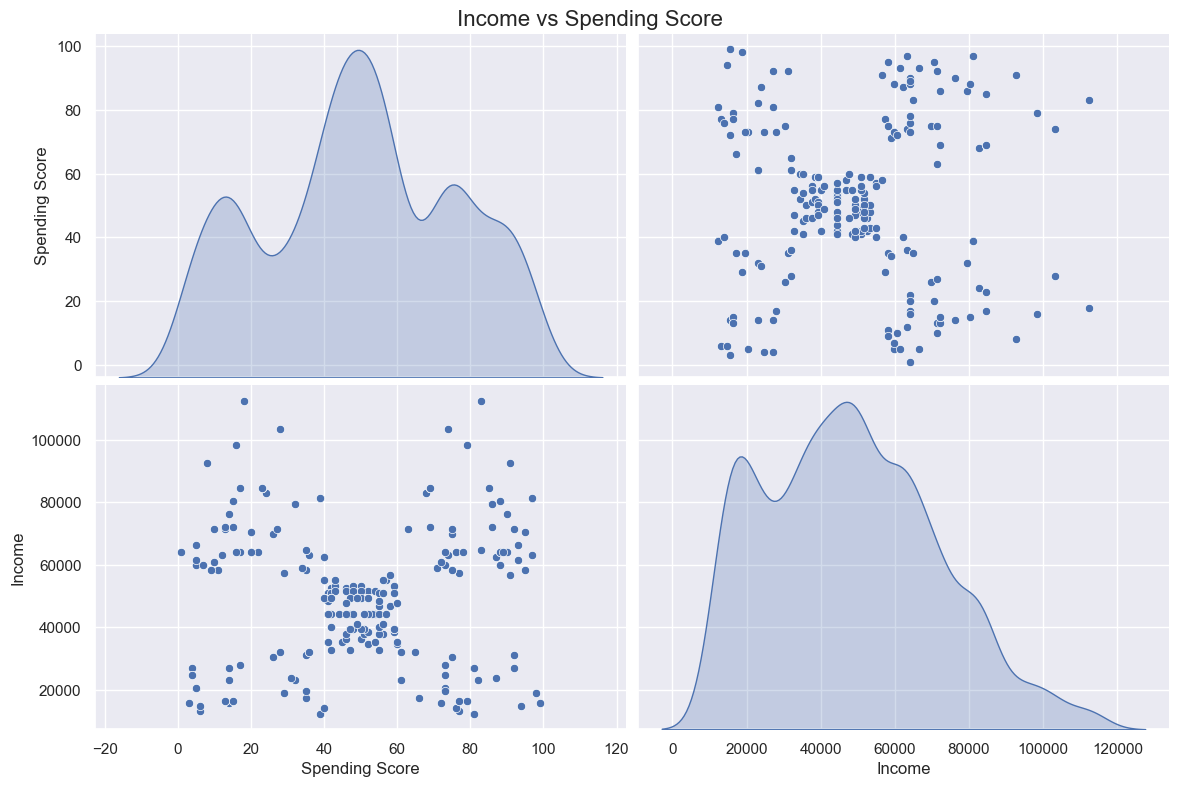

In [351]:
# Create subet of DataFrame with just income and spending score.
x = review3[['spending_score', 'income']]

# Create a pairplot with Seaborn using income and spending score.
g = sns.pairplot(review3, vars=x, diag_kind='kde', height=4, aspect=1.5, palette='Blues')
g.fig.suptitle("Income vs Spending Score", fontsize=16)
g.fig.subplots_adjust(top=0.95)

# Update axis labels. 
g.axes[0, 0].set_ylabel("Spending Score", fontsize=12)
g.axes[1, 0].set_ylabel("Income", fontsize=12)
g.axes[1, 0].set_xlabel("Spending Score", fontsize=12)
g.axes[1, 1].set_xlabel("Income", fontsize=12)

# Save the plot.
plt.savefig('Pairplot')

# Show the chart. 
plt.show() 

## 2.2. K-means clustering 

In order to investigate the clusters seen in the scatterplots above, K-mean clustering was performed to group the customers into clusters based on spending score and income. 

The elbow and silhouette methods were used to determine the optimal number of clusters for the for K-means clustering, with both indicating that 5 was the optimal number of clusters. 

The k-means model was tested with different k values around five e.g., 4-6, in order to ensure the right number of clusters was used. 

### 2.2.1 Determine the number of clusters using the elbow method. 

In [352]:
# The income data was changed from a rate to actual income at during initial data wrangling.
# This will impact clustering so has been amennded to have a similar scale as spending score. 
# Add new income_scale column (income / 1000). 
review3['income_scale'] = review3['income']/1000
review3.head()

spending_score   income  income_scale
0              39  12300.0         12.30
1              81  12300.0         12.30
2               6  13120.0         13.12
3              77  13120.0         13.12
4              40  13940.0         13.94

In [353]:
# Create new Dataframe and drop the income column. 
x = review3.drop('income', axis=1)
x.head()

spending_score  income_scale
0              39         12.30
1              81         12.30
2               6         13.12
3              77         13.12
4              40         13.94

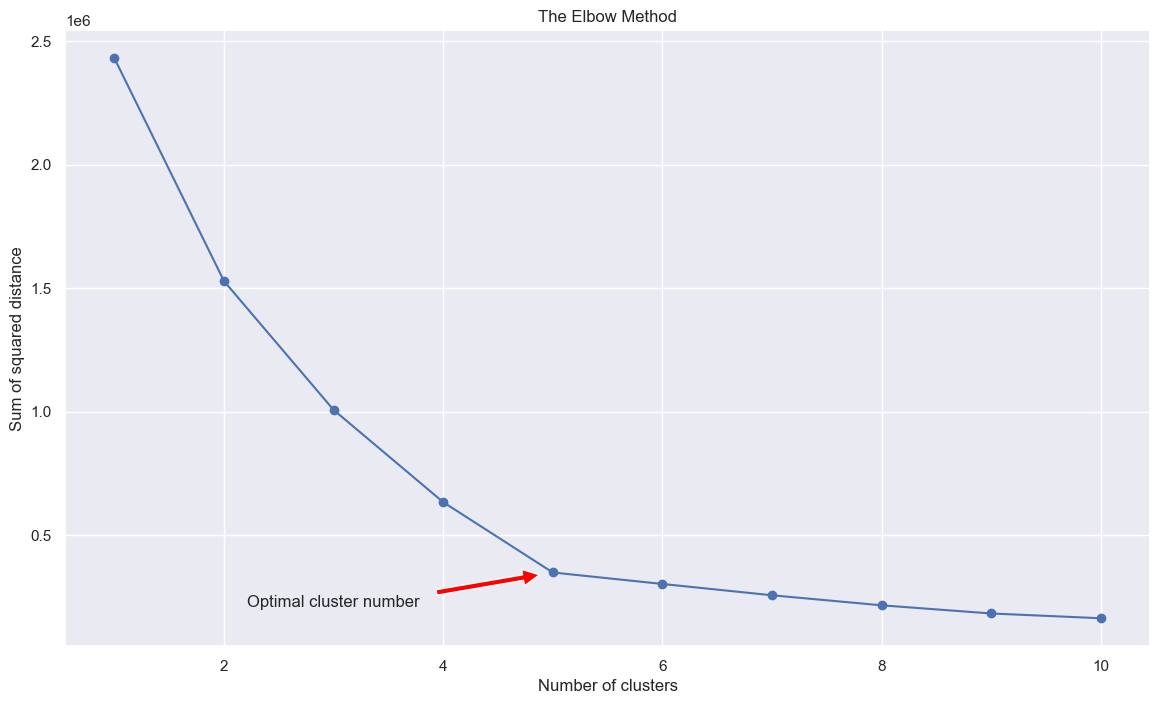

In [354]:
# Elbow method.

# Variable ssd is initialized as an empty list.
# Will be used to store the sum of squared distances for each number of clusters. 
# The model is trained on the x DataFrame. 

ssd = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ssd.append(kmeans.inertia_)

# Plot the elbow method.
# Plots the sum of squared distanaces from each point to its assigned centre. 
# Each data point should be marked with a circle. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.plot(range(1, 11),
         ssd,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distance")

# Add annotation for optimal cluster number to the plot. 
ax.annotate("Optimal cluster number",
            xy=(5, ssd[4]),
            xycoords='data',  
            xytext=(3, ssd[6]),
            textcoords='data',
            arrowprops={'facecolor': 'red', 'shrink': 0.1},
            horizontalalignment='center', verticalalignment='top')

# Save the plot.
plt.savefig('Elbow')

# See the plot. 
plt.show()

# The elbow plot shows that the optimal cluster number is 5.  

### 2.2.2 Determine the number of clusters using the silhouette method. 

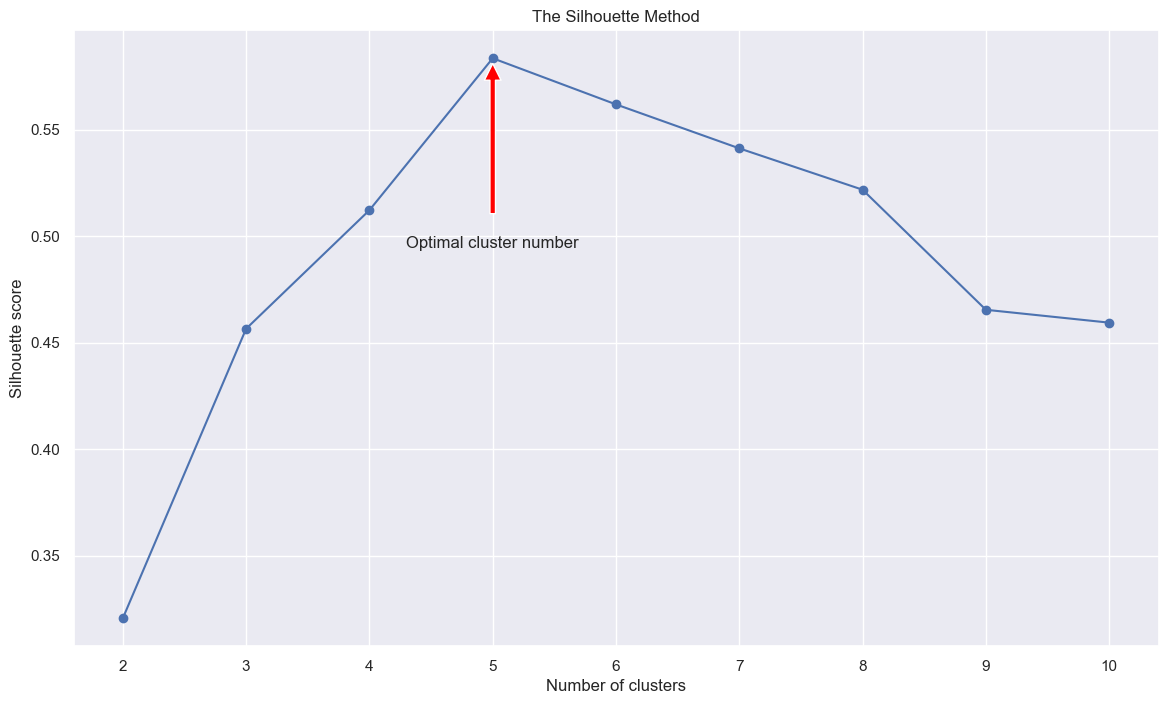

In [355]:
# Silhouette method.

# Variable sil is initialized as an empty list.
# Will be used to store the silhouette scores for each number of clusters.
# The model is trained on the x DataFrame. 

sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
# Each data point should be marked with a circle. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")


# Add annotation for optimal cluster number to the plot. 
ax.annotate("Optimal cluster number",
            xy=(5, 0.59),
            xycoords='data',  
            xytext=(5, 0.5),
            textcoords='data',
            arrowprops={'facecolor': 'red', 'shrink': 0.1},
            horizontalalignment='center', verticalalignment='top')

plt.show()

# The silhouette plot shows that optimal cluster number is 5.    

#### 2.2.3 Evaluate k-means model at different k values. 

The k-means model was tested with different k values around five e.g., 4-6. 

#### 2.2.3.1 Using four clusters. 

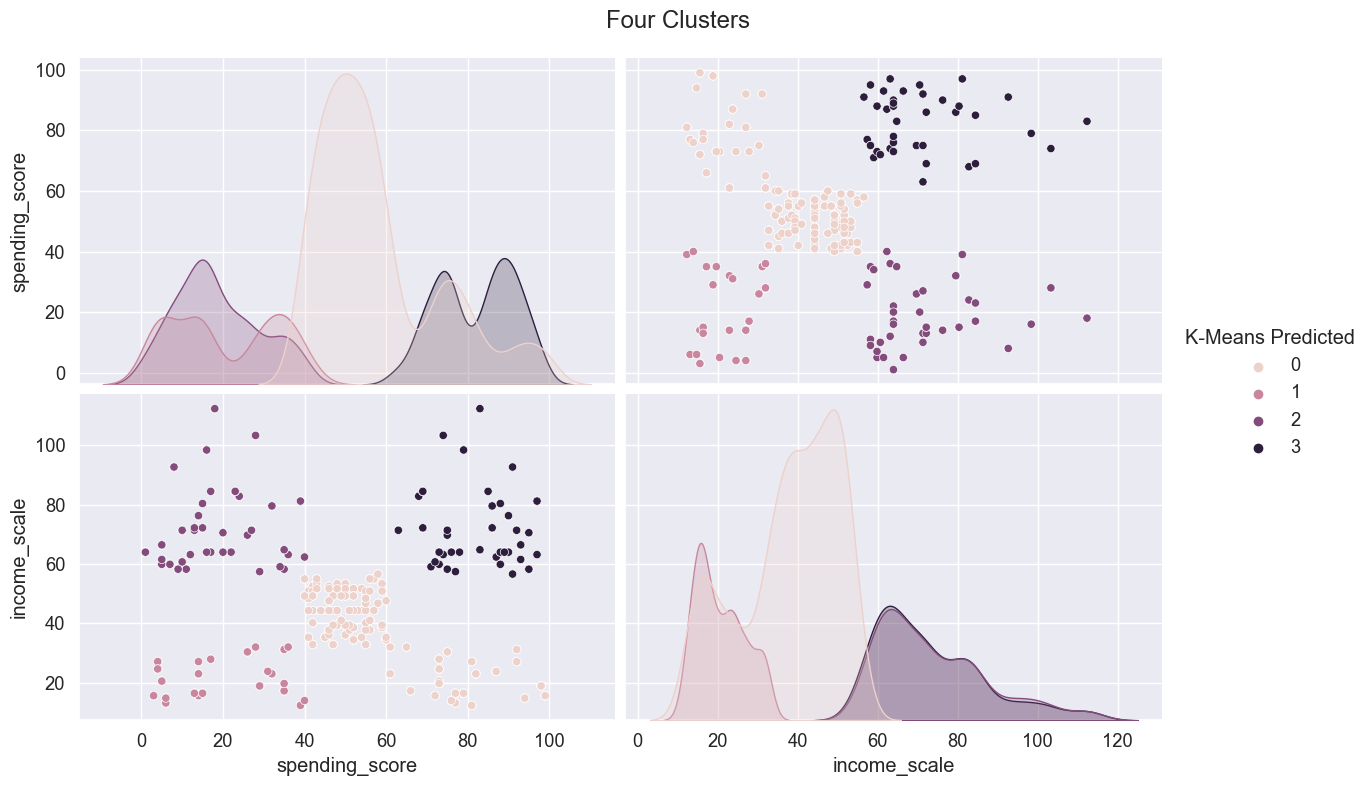

In [356]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

# Extract the cluster assignments. 
clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted cluster assignments.
sns.set(font_scale=1.2)
plot = sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde', height=4, aspect=1.5)

# Add a title to the chart and adjust spacing. 
plt.suptitle("Four Clusters")
plot.fig.subplots_adjust(top=0.92)

In [357]:
# Check the number of observations per predicted class using four clusters.
# The output shows that the first cluster (n=1013) is significantly larger than the rest.  
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

#### 2.2.3.2 Using five clusters. 

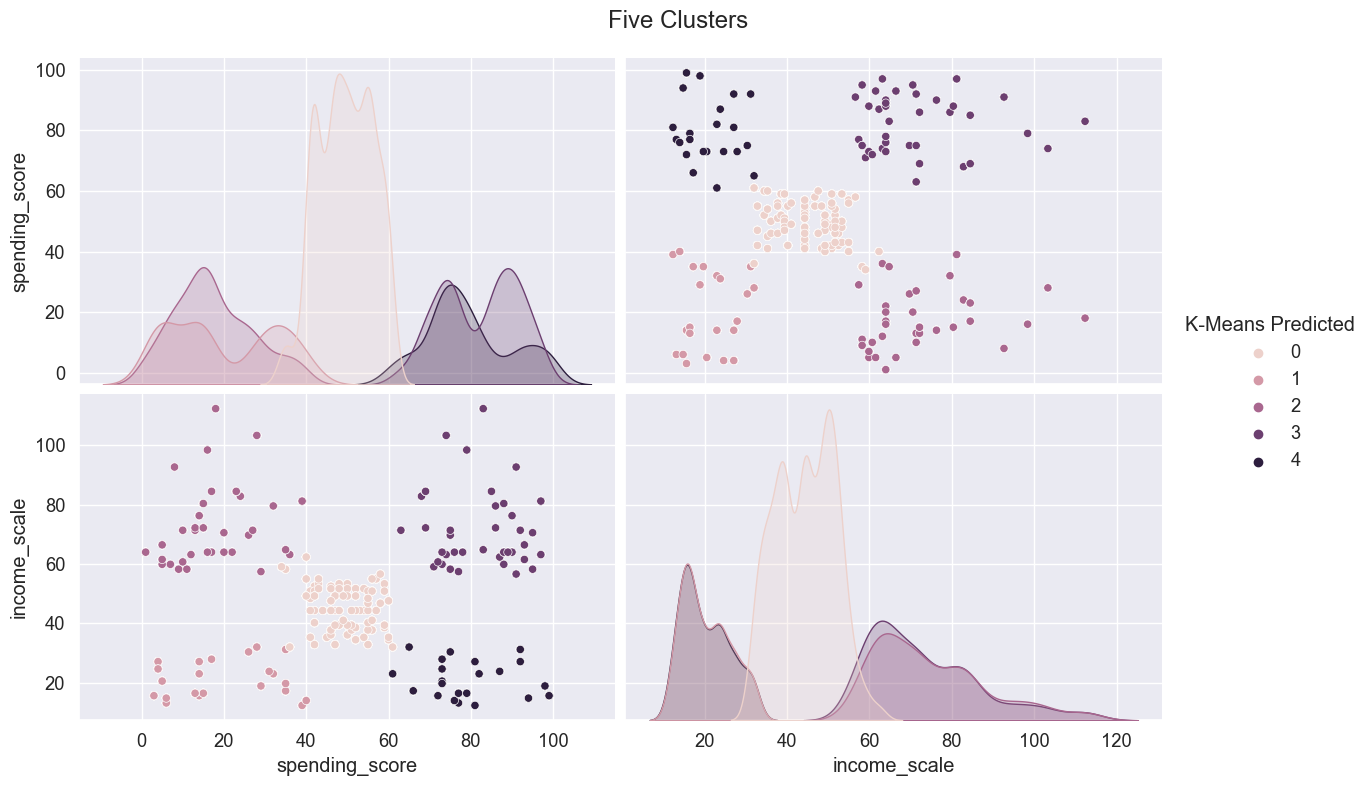

In [358]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

# Extract the cluster assignments. 
clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted cluster assignments.
sns.set(font_scale=1.2)
plot = sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde', height=4, aspect=1.5)

# Add a title to the chart and adjust spacing. 
plt.suptitle("Five Clusters")
plot.fig.subplots_adjust(top=0.92)

In [359]:
# Check the number of observations per predicted class using five clusters.
# The output shows that the clusters are grouped reasonably well.
# Most customers sit in the average of income and spending score.   
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

#### 2.2.3.3 Using six clusters. 

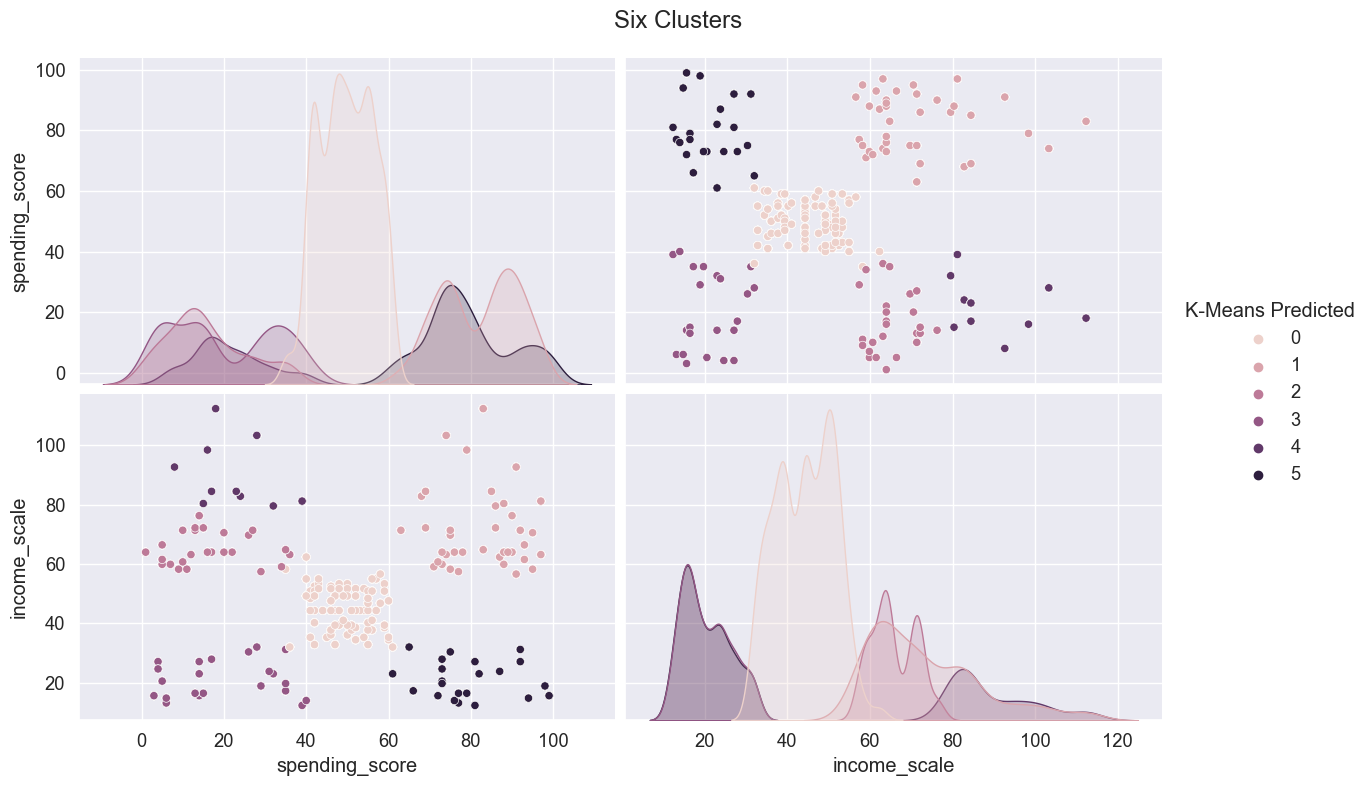

In [360]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

# Extract the cluster assignments. 
clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted cluster assignments.
sns.set(font_scale=1.2)
plot = sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde', height=4, aspect=1.5)

# Add a title to the chart and adjust spacing. 
plt.suptitle("Six Clusters")
plot.fig.subplots_adjust(top=0.92)

In [361]:
# Check the number of observations per predicted class using six clusters.
# The output shows that the fifth cluster (n=123) is much smaller than the first (n=767). 
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

### 2.2.4 Fit final model. 

Looking at the scatterplots and distribution of the clusters on the pairplots above, it was decided that the optimal number of clusters was five. This was confirmed by looking at the number of number of observations in the predicted clusters for each model. The model with five clusters had the highest number of "average" customers (n=774), e.g., average income and average spending score. The other four groups were distributed relatively evenly around this main group. 

In the scatterplot, these five clusters were classified as the following:
 - Cluster 0: Average income / spending score customers e.g., Average (n=774
 - Cluster 1: High income / high spending score customers e.g., Ideal (n=356)
 - Cluster 2: High income / low spending score customers e.g., Savers (n= 330)
 - Cluster 3: Low income / low spending score customers e.g., Low Budget (n = 271)
 - Cluster 4: Low income / high spending scorecustomers e.g., Spenders (n= 269)

In [362]:
# Apply the final model using five clusters. 

kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

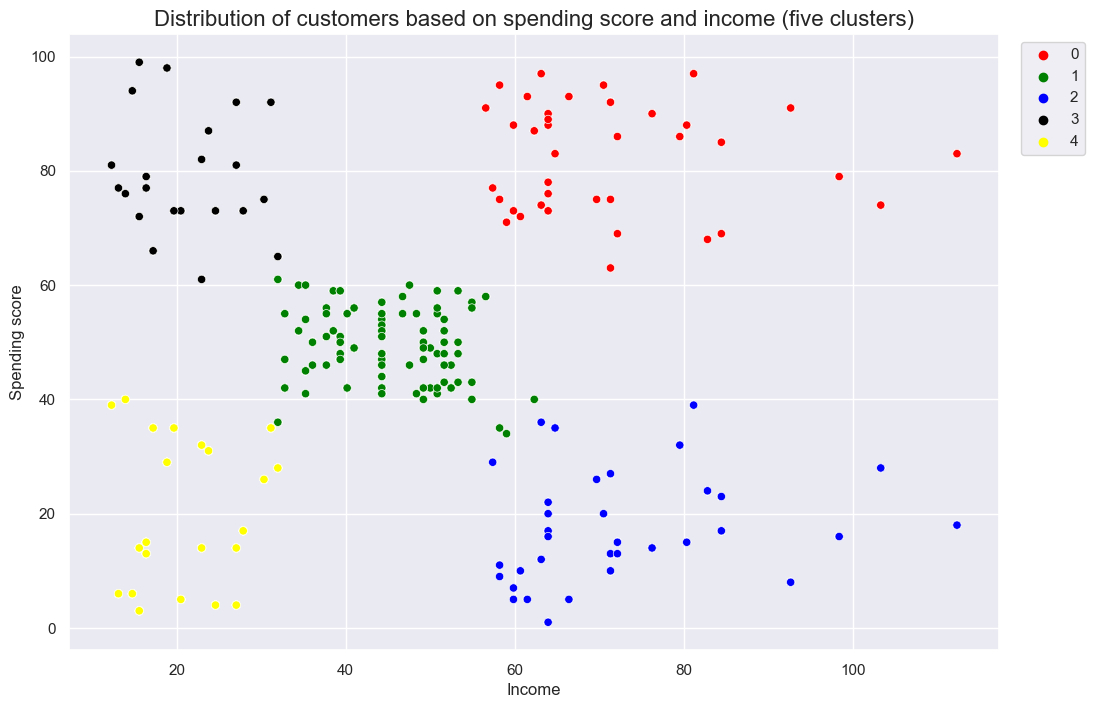

In [363]:
# Create a scatterplot to show the five clusters.
sns.set(rc = {'figure.figsize':(12, 8)})
sns.scatterplot(x='income_scale' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'yellow'])

# Add a title to the chart and change the axis labels.  
plt.title("Distribution of customers based on spending score and income (five clusters)", fontsize=16)
plt.xlabel('Income')
plt.ylabel('Spending score')

# Format the legend. 
plt.legend(bbox_to_anchor=(1.1,1))

# Save the plot.
plt.savefig('Clusters')

# See the plot. 
plt.show()

## Q2: Observations and insights

***Turtle Games wants to better understand how to group its customer base in order to enhance its marketing efforts and increase sales. Linear regression identified income and spending score as the main predicters of customer "loyalty," and these will be used to segment customers so the marketing team can target its campaigns accordingly.*** 

***K-means clustering was used to create different customer segments based on income and spending score. The income data was reverted back to a rate (/1000) to be in line with spending score scale, as this would have otherwise impacted the accuracy of the clustering. Both the elbow and silhouette methods indicated that five was the optimal number of clusters, but four and six were also checked to ensure the right number of customer segments was created.***

***It was decided that the optimal number of clusters was five, based on the scatterplot and distribution of observations among the clusters. The model with five clusters had the highest number of "average" customers (n=774), e.g., average income and average spending score. The other four clusters were distributed relatively evenly around this main "average" group.***

***These five customer clusters can be classified as:***

 ***- Low Budget*** - low income / low spending score
 
 ***- Spenders*** - low income / high spending score
 
 ***- Average*** - average income / average spending score
 
 ***- Savers*** - high income / low spending score
 
 ***- Ideal*** - high income / high spending score
 
***The marketing department at Turtle Games can now use these different customer segments to create targeted marketing campaigns. For example, Spenders and Ideal (high spending score) are the most "loyal" and generate the most revenue. These should be retained and rewarded for their loyalty and offered enhanced loyalty programs, exclusive discounts, and referral schemes. Those with low spending score (Low Budget and Savers) are more suited for customer acquisition strategies, such as free postage or a discount on their next purchase. These should also be tailored to different income levels, as Low Budget customers are likely to have a preference for less expensive products and vice versa.***

# 

# Q3: Sentiment Analysis of Online Customer Reviews
The marketing department at Turtle Games has also requested an analysis of reviews on the company website submitted by customers who purchased and used products. The data includes reviews and also a summary of reviews. This part of the project will utilise natural language processing (NLP) to generate sentiment analysis of the reviews and their summaries.

The department has asked for:
- Commonly used words in online product reviews
- A list of top positive and negative reviews on the website 

The results of the analysis will be used to inform future marketing initiatives and customer engagement strategies.

## 3.1 Data ingestion

In [364]:
# Import all the necessary packages and libraries.
import nltk 
import os 

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kitty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kitty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [365]:
# Load the data set.
# Include just the review and summary columns. 
reviews = pd.read_csv('turtle_reviews.csv', usecols=['review', 'summary'])

# View the DataFrame.
print(reviews.shape)
reviews.head()

(2000, 2)


review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are "meh". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the "Storm King's Thunder" adventure. Even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. I massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. And the few table you have are nigh-useless themselves.\n\nIn short, stop making crap DM screens.   
2  Nice art, nice printing.  Why two panels are filled with a general Forgotten Realms map is beyond me.  Most of one of them is all blue ocean.  Such a waste.\n\nI don't understand why they can't make these DM Screens more useful for these "kinds of adventures" rather than solely the specific adventure.  You're supposed to be able to transpose this adventure to other lands outside the Forgotten Realms.  So even just a list of new monsters or NPCs would at least be useful than the map.  Even more would just be stuff related to running the game but broad-use stuff related to giants.\n\nSame thing with Curse of Strahd.  Why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out Castle Ravenloft, which is only useful during a small fraction of the time even for the Curse of Strahd adventure, let alone various other Ravenloft adventuring.\n\nThey really kill the extended use of these screens by not thinking about their potential use, both for the adventure in question, as well as use in a broader sense.\n\nThe Rage of Demons screen is fa

In [366]:
# Explore the DataFrame and check for any missing data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


## 3.2 Prepare the data for NLP.
Before NLP is applied to the data, the textual data in the review and summary columns was pre-processed. This included changing all text to lower case, joining the words in each review or summary with a space, and removing punctuation. In addition, duplicate entries that appeared in both the review and the summary columns were removed (n = 39). 

### 3.2.1 Review column: Change to lower case and join the elements. 

In [367]:
# Change all to lower case and join with a space.
reviews['review'] = reviews['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the output.
reviews['review'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             when it co

### 3.2.2 Review column: Remove punctuation.

In [368]:
# Remove punctuation.
reviews['review'] = reviews['review'].str.replace('[^\w\s]','')

# Preview the output.
reviews['review'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       when it comes to a dms screen th

### 3.2.3 Summary column: Change to lower case and join the elements. 

In [369]:
# Change all to lower case and join with a space.
reviews['summary'] = reviews['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the output.
reviews['summary'].head()

0    the fact that 50% of this space is wasted on art (and not terribly informative or needed art ...
1                                           another worthless dungeon master's screen from galeforce9
2                                                                     pretty, but also pretty useless
3                                                                                          five stars
4                                                                                          money trap
Name: summary, dtype: object

### 3.2.4 Summary column: Remove punctuation

In [370]:
# Remove punctuation.
reviews['summary'] = reviews['summary'].str.replace('[^\w\s]','')

# Preview the output.
reviews['summary'].head()

0    the fact that 50 of this space is wasted on art and not terribly informative or needed art 
1                                       another worthless dungeon masters screen from galeforce9
2                                                                 pretty but also pretty useless
3                                                                                     five stars
4                                                                                     money trap
Name: summary, dtype: object

### 3.2.5 Drop duplicates appearing in both columns

In [371]:
# Check the number of duplicate values that appear in both the Review and Summary columns.
reviews[['review', 'summary']].duplicated().sum()

39

In [372]:
# Create a new Dataframe and drop duplicates.
reviews_clean = reviews.drop_duplicates(subset=['review', 'summary'])

# Reset the index. 
reviews_clean = reviews_clean.reset_index(drop=True)

# View the Dataframe.
print(reviews_clean.shape)
reviews_clean.head()

# Output shows that the 39 duplicates have been removed. 

(1961, 2)


review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens   
2  nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring  covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm gian

## 3.3 Create wordclouds. 

In order to visualise the most common words in reviews and summaries, wordclouds were created. This first involved applying tokenisation, where sentences in the review and summary columns were split into words. 

Wordclouds were then created by using for loops to concatenate all text data from each row of the columns and stored as string variables. The frequency of each word in the string variable was determined using the Counter class. Wordclouds for the review and summary columns were then generated by passing the word frequency object through the generate_from_frequencies method. 

The resulting wordclouds, particularly for the review column, showed high levels of stopwords, such as 'the,' 'and,' 'to,' 'it,' 'of,' 'is,' and 'this.' To review the count of top words in the wordclouds the frequency distribution was determined and this confirmed that many were stopwords. Stopwords and non-alphanumeric characters were removed and new wordclouds were generated. 

The 15 most common words were extracted from each new wordcloud using the most_common method from Counter class, and the polarity of each word was determined using the sentiment.polarity method from TextBlob.

### 3.3.1 Tokenise the review and summary columns. 

In [373]:
# Create a copy of the reviews_clean DataFrame. 
reviews_new = reviews_clean.copy() 

# View the Dataframe.
print(reviews_new.shape)
reviews_new.head()

(1961, 2)


review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens   
2  nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring  covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm gian

In [374]:
# Apply tokenisation to the review column.
# Create a new reviews_tokens column. 
reviews_new['review_tokens'] = reviews_new['review'].apply(word_tokenize)

# View DataFrame.
reviews_new['review_tokens'].head()

0                                                                                                                                                                                                                      [when, it, comes, to, a, dms, screen, the, space, on, the, screen, itself, is, at, an, absolute, premium, the, fact, that, 50, of, this, space, is, wasted, on, art, and, not, terribly, informative, or, needed, art, as, well, makes, it, completely, useless, the, only, reason, that, i, gave, it, 2, stars, and, not, 1, was, that, technically, speaking, it, can, at, least, still, stand, up, to, block, your, notes, and, dice, rolls, other, than, that, it, drops, the, ball, completely]
1    [an, open, letter, to, galeforce9, your, unpainted, miniatures, are, very, not, bad, your, spell, cards, are, great, your, board, games, are, meh, your, dm, screens, however, are, freaking, terrible, im, still, waiting, for, a, single, screen, that, isnt, polluted, with, pointless, artwork, whe

In [375]:
# Apply tokenisation to the summary column.
# Create a new summary_tokens column. 
reviews_new['summary_tokens'] = reviews_new['summary'].apply(word_tokenize)

# View DataFrame.
reviews_new['summary_tokens'].head()

0    [the, fact, that, 50, of, this, space, is, wasted, on, art, and, not, terribly, informative, or, needed, art]
1                                                 [another, worthless, dungeon, masters, screen, from, galeforce9]
2                                                                             [pretty, but, also, pretty, useless]
3                                                                                                    [five, stars]
4                                                                                                    [money, trap]
Name: summary_tokens, dtype: object

In [376]:
# View the DataFrame to see the new columns. 
reviews_new.head()

review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens   
2  nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring  covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm gian

### 3.3.2 Create wordclouds. 

#### 3.3.2.1 Review column
The wordcloud image for the review column shows a large number of prominent stopwords, such as 'the,' 'and,' 'to,' 'it,' and 'of.'

In [377]:
# Use a 'for' loop to concatenate all text data from each row of the 'review_tokens' column. 
# Store it in the 'all_reviews' variable as a single string.

all_reviews = ''
for i in range(reviews_new.shape[0]):
    all_reviews = all_reviews + ' '.join(reviews_new['review_tokens'][i]) + ' '
    
# Count the frequency of each word in the input text. 
# Resulting dictionary-like object is stored in the 'word_freq1' variable. 
word_freq1 = Counter(all_reviews.split())

# Generate word cloud using 'generate_from_frequencies' method and 'word_freq1' object.
# An empty set is passed as the 'stopwords' argument so no words are excluded.
wordcloud_review = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 5, stopwords=set()).generate_from_frequencies(word_freq1)

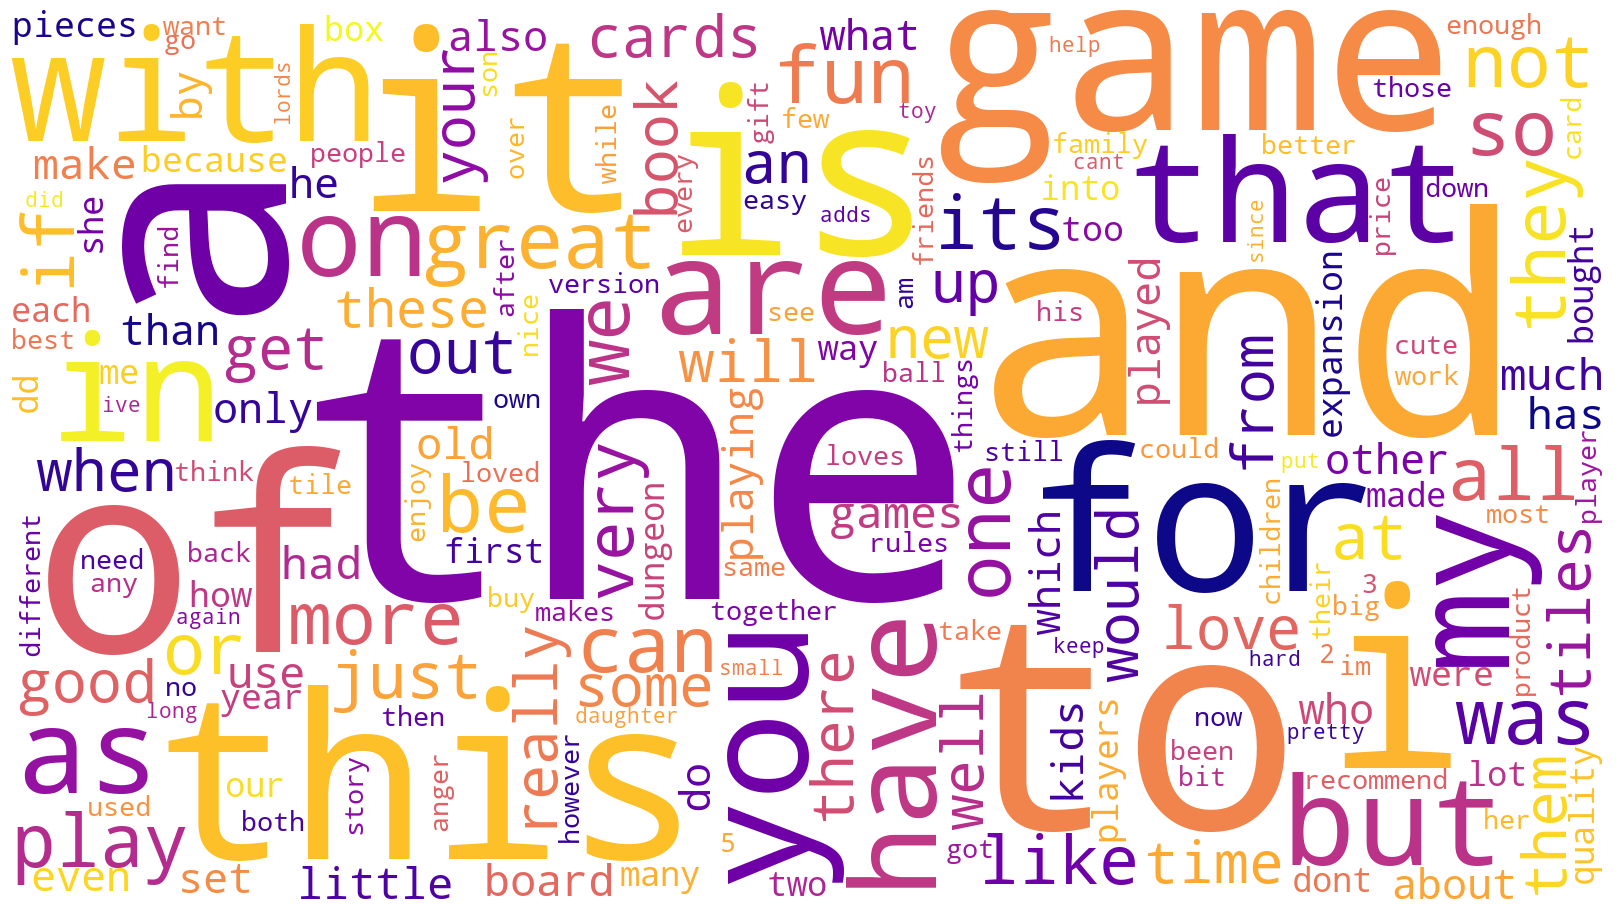

In [378]:
# Plot the review word cloud.  
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_review) 
plt.axis('off') 
plt.tight_layout(pad = 0) 

# Save the plot.
plt.savefig('Review wordcloud stopwords')

# See the plot. 
plt.show()

#### 3.3.2.2 Summary column. 

The wordcloud image for the summary column also has stopwords; however, they are not as prominent as those in the review column. This is likely due to the fact that there is considerably less text in the summary column. The most prominent words in the wordcloud include 'stars,' 'five,' 'game,' and 'great.' The appearance of 'stars' and 'five' as the most common words is not surprising as customers can give "five star" reviews. 

In [379]:
# Use a 'for' loop to concatenate all text data from each row of the 'summary_tokens' column. 
# Store it in the 'all_summary' variable as a single string.
all_summary = ''
for i in range(reviews_new.shape[0]):
    all_summary = all_summary + ' '.join(reviews_new['summary_tokens'][i]) + ' '

# Count the frequency of each word in the input text. 
# Resulting dictionary-like object is stored in the 'word_freq2' variable. 
word_freq2 = Counter(all_summary.split())

# Generate word cloud using 'generate_from_frequencies' method and 'word_freq2' object.
# An empty set is passed as the 'stopwords' argument so no words are excluded.
wordcloud_summ = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10, stopwords=set()).generate_from_frequencies(word_freq2)

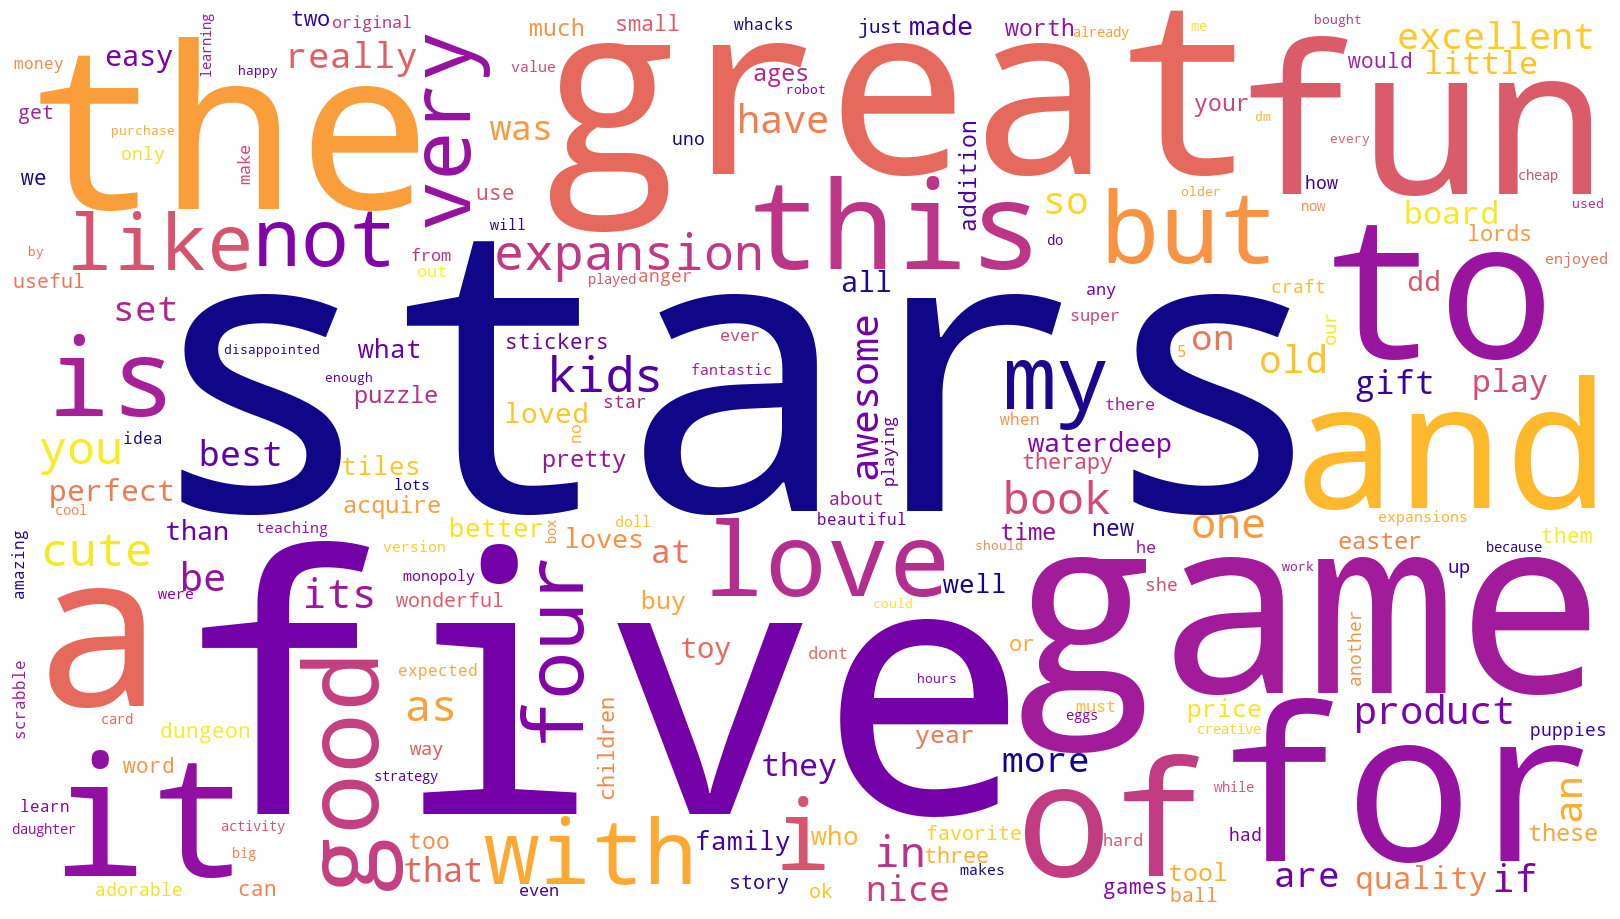

In [380]:
# Plot the summary word cloud.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summ) 
plt.axis('off') 
plt.tight_layout(pad = 0) 

# See the plot. 
plt.show()

### 3.3.3 Create frequency distributions. 

#### 3.3.3.1 Review column. 
The resulting frequency distribution of the review column confirms that 19 out of the top 20 words by distribution are stopwords. For example, 'the' appears 5,451 times and 'and' appears 3,233 times.  

In [381]:
# Determine the frequency distribution for review. 

# Define an empty list of tokens.
rv_tokens = []

for i in range(reviews_new.shape[0]):
    # Add each token to the list.
    rv_tokens = rv_tokens + reviews_new['review_tokens'][i]

summary_dist = FreqDist(rv_tokens)

# Preview data.
summary_dist

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [382]:
# Generate a DataFrame of the 20 most common review tokens. 
# Add corresponding frequency counts using Counter class. 
counts_review = pd.DataFrame(Counter(rv_tokens).most_common(20),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

Frequency
Word           
the        5451
and        3233
to         3162
a          3160
of         2488
i          2090
it         2083
is         1782
this       1776
game       1671
for        1545
with       1265
you        1177
in         1148
that       1067
my          973
are         947
but         797
as          741
have        741

#### 3.3.3.2 Summary column. 
The resulting frequency distribution of the summary column shows that 13 out of 20 top words are stopwords. However, they are not as prominent as those in the review column, with the top four words found to be 'stars,' 'five,' 'game,' and 'great.'   

In [383]:
# Determine the frequency distribution for summary. 

# Define an empty list of tokens.
sm_tokens = []

for i in range(reviews_new.shape[0]):
    # Add each token to the list.
    sm_tokens = sm_tokens + reviews_new['summary_tokens'][i]

summary_dist = FreqDist(sm_tokens)

# Preview data.
summary_dist

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

In [384]:
# Generate a DataFrame of the 20 most common summary tokens. 
# Add corresponding frequency counts using Counter class. 
counts_summ = pd.DataFrame(Counter(sm_tokens).most_common(20),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summ

Frequency
Word            
stars        427
five         342
game         319
great        295
the          261
a            240
for          232
fun          218
to           192
and          168
it           150
of           139
this         135
is           103
love          93
good          92
but           87
i             86
my            71
with          71

### 3.3.4 Remove non-alphanumeric characters and stopwords. 
Non-alphanumeric words were removed using the isalnum() method, and any English stopwords have also been excluded. 

#### 3.3.4.1 Review column. 

In [385]:
# Remove all the stopwords. 
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Filter out review tokens that are neither alphabets nor numbers. 
rv_nan = [word for word in rv_tokens if word.isalnum()]

# Create a filtered list of tokens without stopwords.
rv_tokens2 = [x for x in rv_nan if x.lower() not in english_stopwords]

#### 3.3.4.2 Summary column. 

In [386]:
# Filter out summary tokens that are neither alphabets nor numbers. 
sm_nan = [word for word in sm_tokens if word.isalnum()]
                        
# Create a filtered list of tokens without stopwords.
sm_tokens2 = [x for x in sm_nan if x.lower() not in english_stopwords]

### 3.3.5 Review column: Create new wordcloud.

After the non-alphanumeric characters and stopwords were removed from the text in the review column, a new wordcloud was generated. From the wordcloud image, it is clear that words like 'game,' 'great,' and 'fun' are the most prominent in the review column. 

In [387]:
# Create a review word cloud without alphanumeric characters and stopwords. 
# Use a 'for' loop to iterate over each value in the 'rv_tokens2' list. 
# Concatenates each filtered token to the 'rv_tokensstring' variable with a space character in between.

# Define an empty string variable.
rv_tokensstring = ''

for value in rv_tokens2:
    # Add each filtered token word to the string.
    rv_tokensstring = rv_tokensstring + value + ' '

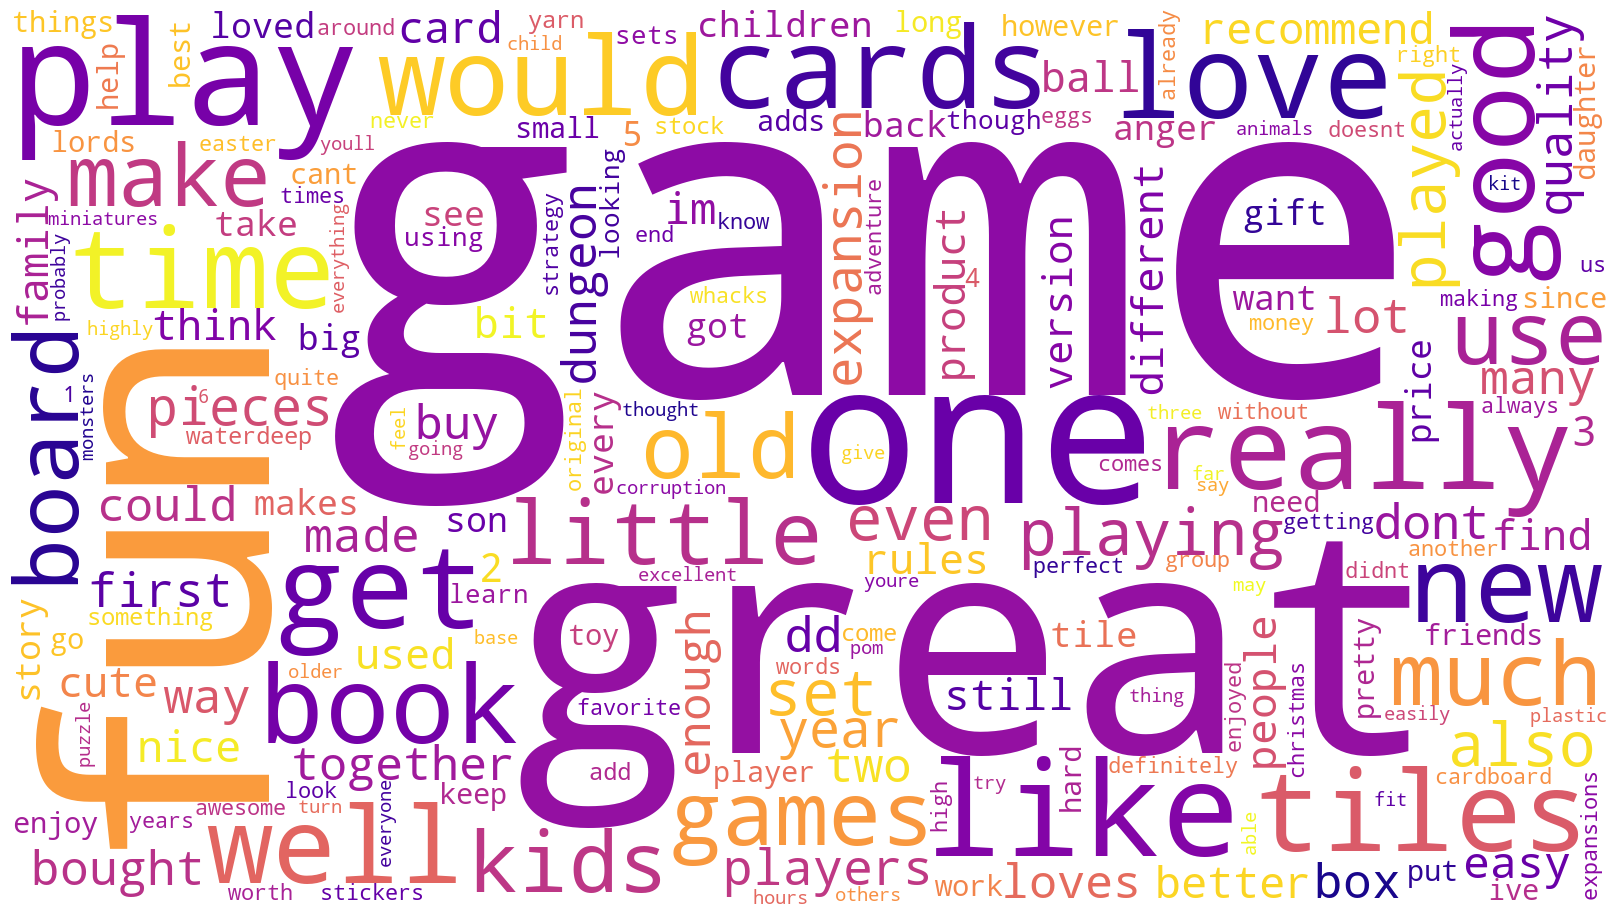

In [388]:
# Plot the new review wordcloud image.

# Counter class is used to count the frequency of each word in the 'rv_tokensstring' variable. 
# Resulting dictionary-like object is stored in the 'word_freq3' variable. 
word_freq3 = Counter(rv_tokensstring.split())

wordcloud3 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate_from_frequencies(word_freq3)

# Plot the wordcloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud3) 
plt.axis('off') 
plt.tight_layout(pad = 0) 

# Save the plot.
plt.savefig('Review wordcloud no stopwords')

# See the plot. 
plt.show()

#### 3.3.5.1 Review column: Determine the top 15 most common words. 
The 15 most common words in the review column were determined by using the Counter class and most_common method on the rv_tokens2 list created above. This was then visualised using a barchart. It can be seen that the word 'game' appeared 1,671 times in the review column, followed by 'great' (580 times), and 'fun' (552 times). 

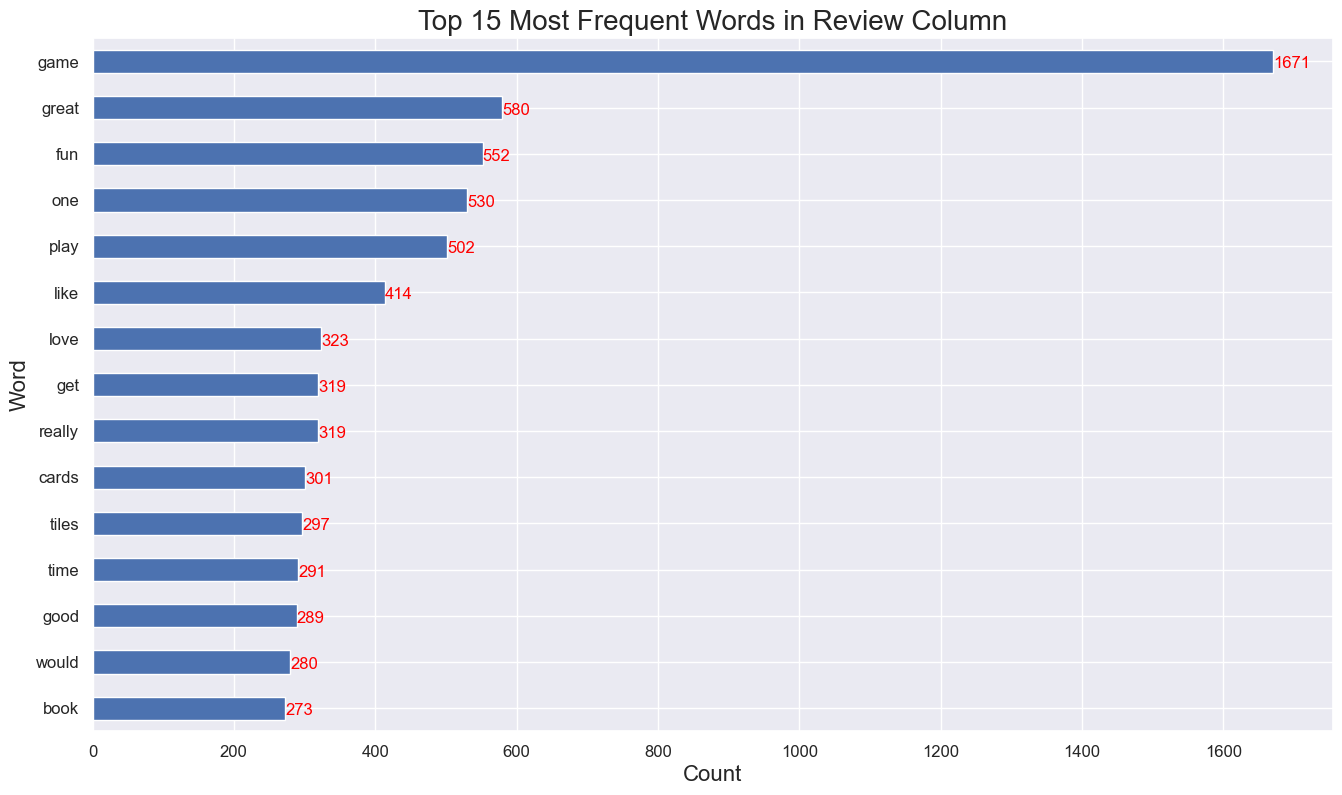

In [389]:
# Dictionary created of top 15 most common words using most_common() method from Counter class.
rv_wordcounts = Counter(rv_tokens2)
top_rv = dict(rv_wordcounts.most_common(15))

# Convert the dictionary to a DataFrame.
df = pd.DataFrame.from_dict(top_rv, orient='index', columns=['count'])

# Sort the DataFrame into descending order. 
df = df.sort_values(by='count', ascending=True)

# Create a horizontal barchart.
ax = df.plot(kind='barh', figsize=(16, 9), fontsize=12, legend=None)

# Set the labels.
ax.set_xlabel('Count', fontsize=16)
ax.set_ylabel('Word', fontsize=16)
ax.set_title("Top 15 Most Frequent Words in Review Column", fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + 0.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

# Save the plot.
plt.savefig('Review freq')   

# See the plot. 
plt.show()

#### 3.3.5.2 Review column: Determine the polarity of the 15 most common words.
The polarity for each of the top 15 words in the review column was determined using a for loop and the sentiment.polarity method from TextBlob. A DataFrame was created from the resulting list of dictionaries. Interestingly, the word 'game' has a negative polarity of -0.4. Words with the highest polarity include 'great' (0.8), 'good' (0.7), and 'love' (0.5). Over half of the 15 most common words (n=9) have neutral polarity (0.0).  

In [390]:
# A for loop used to calculate polarity of each word in the top_rv dictionary.
# Use sentiment.polarity method from TextBlob. 
# Sentiment polarity of each word appended to a list of dictionaries called word_polarity_rv. 

word_polarity_rv = []
for word in top_rv:
    polarity = TextBlob(word).sentiment.polarity
    word_polarity_rv.append({'word': word, 'polarity': polarity})

# Create a Dataframe from the list of dictionaries. 
top15review = pd.DataFrame(word_polarity_rv)

# View the Dataframe.
print(top15review)

      word  polarity
0     game      -0.4
1    great       0.8
2      fun       0.3
3      one       0.0
4     play       0.0
5     like       0.0
6     love       0.5
7   really       0.2
8      get       0.0
9    cards       0.0
10   tiles       0.0
11    time       0.0
12    good       0.7
13   would       0.0
14    book       0.0


### 3.3.6 Summary column: Create new wordcloud.
After the non-alphanumeric characters and stopwords were removed from the text in the summary column, a new wordcloud was generated. The wordcloud image is not significantly different from the one generated earlier, with words like 'stars,' 'five,' 'game,' and 'great' appearing the most frequently in the summary column. 

In [391]:
# Create a summary wordcloud without without alphanumeric characters and stop words. 
# Use a 'for' loop to iterate over each value in the 'sm_tokens2' list. 
# Concatenates each filtered token to the 'sm_tokensstring' variable with a space character in between.

# Define an empty string variable.
sm_tokensstring = ''

for value in sm_tokens2:
    # Add each filtered token word to the string.
    sm_tokensstring = sm_tokensstring + value + ' '

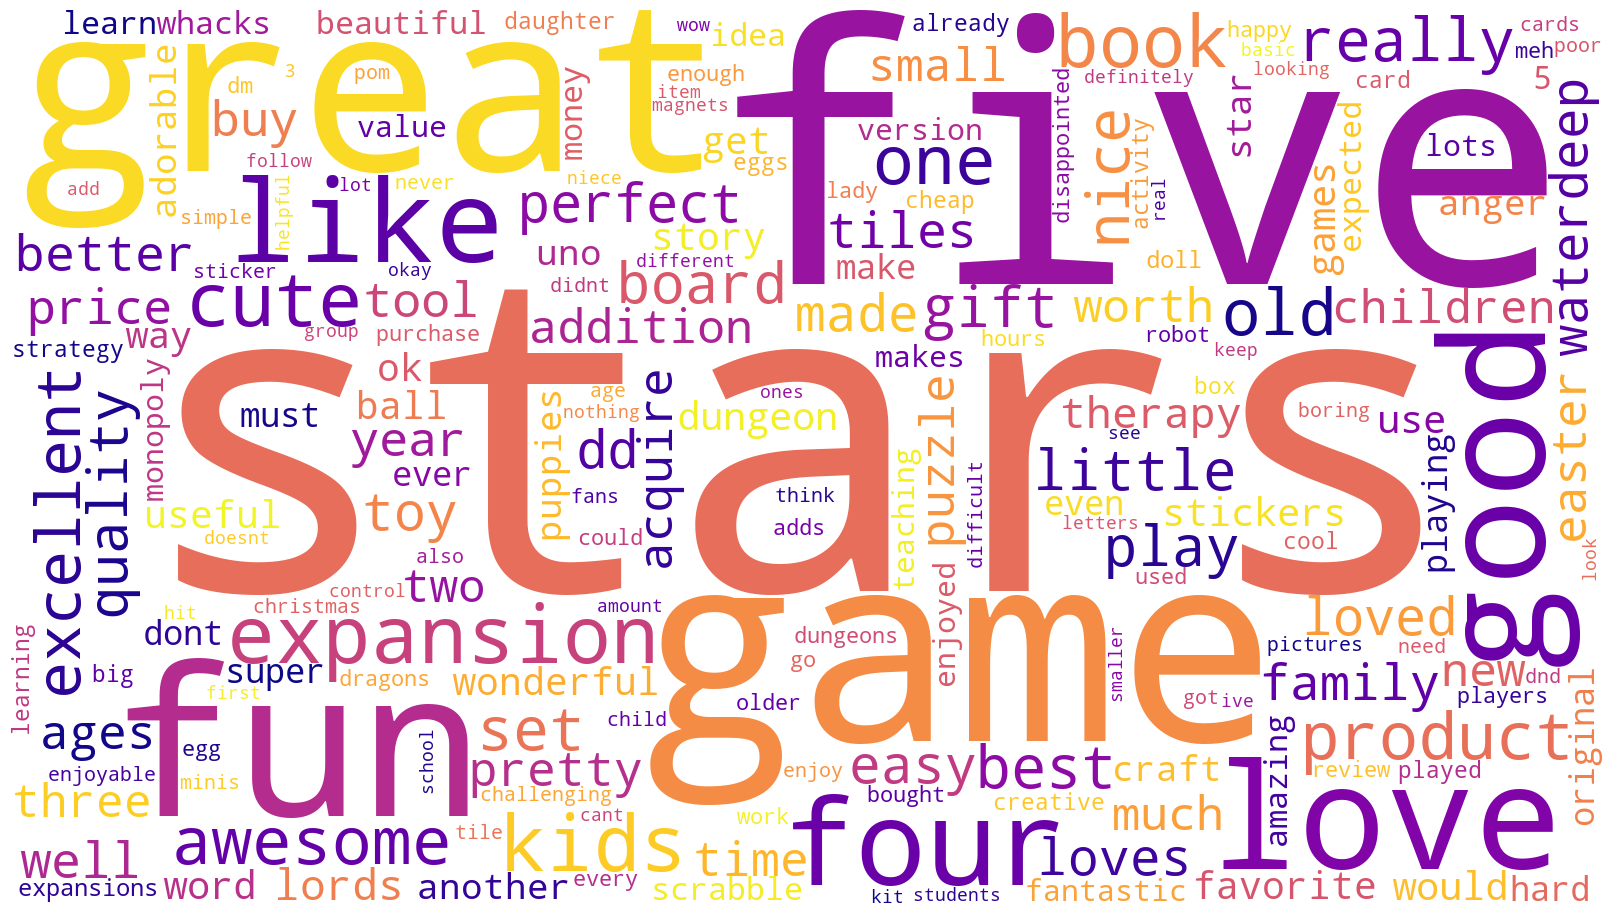

In [392]:
# Plot the summary wordcloud image.

# Counter class is used to count the frequency of each word in the 'sm_tokensstring' variable. 
# Resulting dictionary-like object is stored in the 'word_freq4' variable
word_freq4 = Counter(sm_tokensstring.split())

wordcloud4 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10, collocations=True).generate_from_frequencies(word_freq4)

# Plot the wordcloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud4) 
plt.axis('off') 
plt.tight_layout(pad = 0) 

# Save the plot.
plt.savefig('Summary wordcloud no stopwords')

# See the plot. 
plt.show()

#### 3.3.6.1 Summary column: Determine the top 15 most common words. 

The 15 most common words in the summary column were determined by using the Counter class and most_common method on the sm_tokens2 list created above. This was then visualised using a barchart. It can be seen that the word 'stars' appeared 427 times in the summary column, followed by 'stars' (342 times), 'game' (319 times), and 'great' (295 times).  

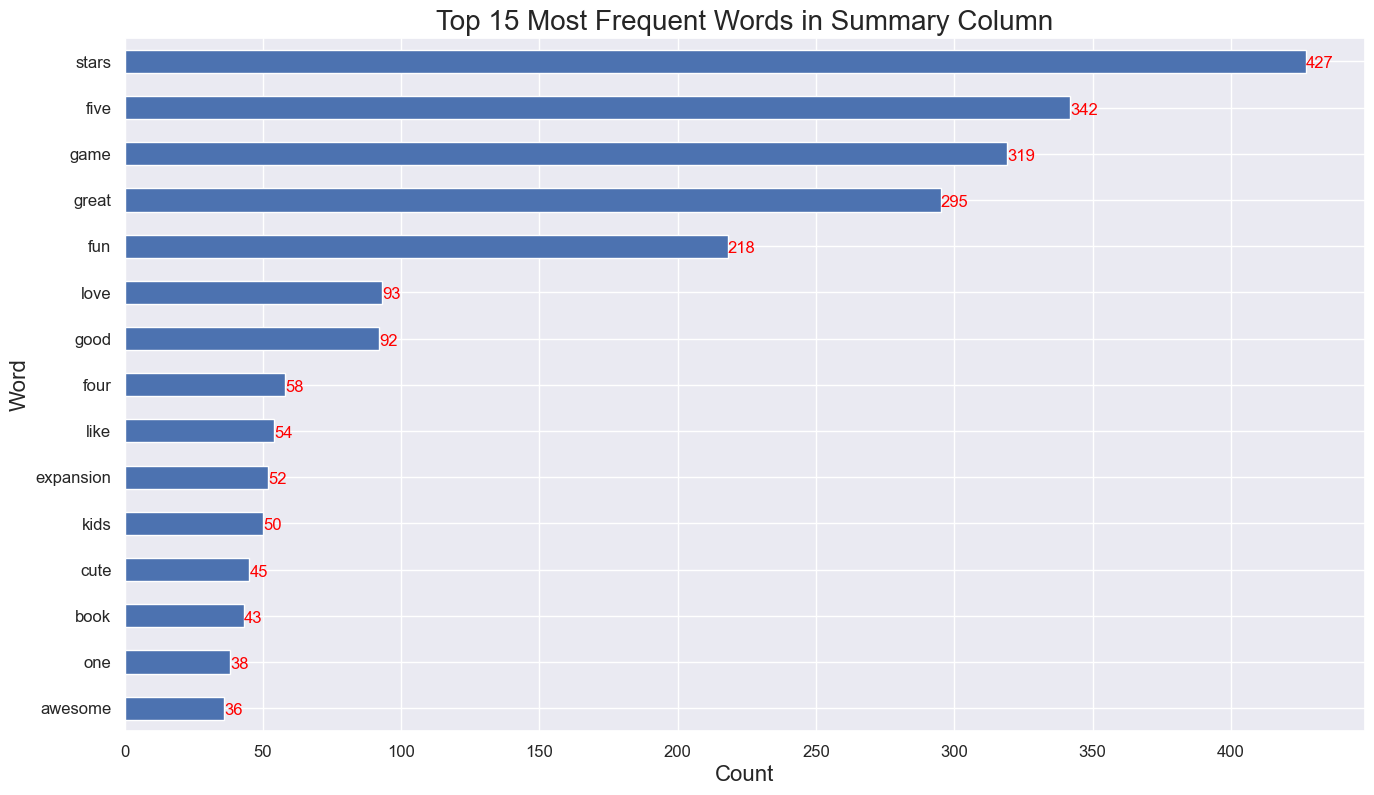

In [393]:
# Dictionary created of top 15 most common words using most_common() method from Counter class.
sm_wordcounts = Counter(sm_tokens2)
top_sm = dict(sm_wordcounts.most_common(15))

# Convert the dictionary to a DataFrame.
df2 = pd.DataFrame.from_dict(top_sm, orient='index', columns=['count'])

# Sort the DataFrame into descending order. 
df2 = df2.sort_values(by='count', ascending=True)

# Create a horizontal barchart.
ax = df2.plot(kind='barh', figsize=(16, 9), fontsize=12, legend=None)

# Set the labels.
ax.set_xlabel('Count', fontsize=16)
ax.set_ylabel('Word', fontsize=16)
ax.set_title("Top 15 Most Frequent Words in Summary Column", fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + 0.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

# Save the plot.
plt.savefig('Summary freq')

# See the plot. 
plt.show()

#### 3.3.6.2 Summary column: Determine the polarity of the 15 most common words.
The polarity for each of the top 15 words in the summary column was determined using a for loop and the sentiment.polarity method from TextBlob. A DataFrame was created from the resulting list of dictionaries. Again, the word 'game' has a negative polarity of -0.4. Words with the highest polarity include 'awesome' (1.0), 'great' (0.8), 'good' (0.7), 'cute' (0.5), and 'love' (0.5). Over half of the 15 most common words (n=8) have neutral polarity (0.0), including the two most frequent terms, 'stars' and 'five.' 

In [394]:
# A for loop used to calculate polarity of each word in the top_sm dictionary.
# Use sentiment.polarity method from TextBlob. 
# Sentiment polarity of each word appended to a list of dictionaries called word_polarity_sm. 

word_polarity_sm = []
for word in top_sm:
    polarity = TextBlob(word).sentiment.polarity
    word_polarity_sm.append({'word': word, 'polarity': polarity})

# Create a Dataframe from the list of dictionaries
top15summ = pd.DataFrame(word_polarity_sm)

# View the Dataframe.
print(top15summ)

         word  polarity
0       stars       0.0
1        five       0.0
2        game      -0.4
3       great       0.8
4         fun       0.3
5        love       0.5
6        good       0.7
7        four       0.0
8        like       0.0
9   expansion       0.0
10       kids       0.0
11       cute       0.5
12       book       0.0
13        one       0.0
14    awesome       1.0


## 3.4. Generate sentiment scores for review and summary columns.   

Turtle Games requested a sentiment analysis for all reviews and summaries to get an understanding of the overall customer view of the company and its products. 

Sentiment score for both polarity and subjectivity were calculated with user defined functions and TextBlob. The resulting polarity and subjectivity scores were then plotted as histograms to visualise their distribution and reveal the overall sentiment towards the company and its products. 

Results shows that the majority of polarity scores for reviews were positive (>70%), with 19% neutral and <10% negative. While there was a high number of positive reviews, most had a polarity score of less than 0.5. This was verified by calculating the average polarity score, which was found to be just 0.21. For summaries, a high proportion had neutral polarity score (>40%), with just 7% with negative polarity scores. The average polarity score for summaries was 0.22. 

Results for subjectivity show a relatively equal split of scores for the review column, which was verified with an average subjectivity score of 0.52. For the summary column, there was a high proportion of fact based text (scores of 0), while the average score was 0.39. This lower subjectivity score for summary is likely due to the concise nature of the text for this column. 

### 3.4.1 Generate polarity sentiment scores. 

In [395]:
# Define a user function to calculate polarity. 
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

#### 3.4.1.1 Review column. 

In [396]:
# Create a new 'rvpolarity' column.
# Apply the generate_polarity user defined function to the review column. 
reviews_new['rvpolarity'] = reviews_new['review'].apply(generate_polarity)
reviews_new['rvpolarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: rvpolarity, dtype: float64

#### 3.4.1.2 Summary column. 

In [397]:
# Create a new 'smpolarity' column.
# Apply the generate_polarity user defined function to the sumamry column. 
reviews_new['smpolarity'] = reviews_new['summary'].apply(generate_polarity)
reviews_new['smpolarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: smpolarity, dtype: float64

### 3.4.2 Generate subjectivity sentiment scores. 

In [398]:
# Define a user function to calculate subjectivity. 
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

#### 3.4.2.1 Review column. 

In [399]:
# Create a new 'rvsubject' column.
# Apply the generate_subjectivity user defined function to the review column. 
reviews_new['rvsubject'] = reviews_new['review'].apply(generate_subjectivity)
reviews_new['rvsubject'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: rvsubject, dtype: float64

#### 3.4.2.2 Summary column. 

In [400]:
# Create a new 'smsubject' column.
# Apply the generate_subjectivity user defined function to the summary column.
reviews_new['smsubject'] = reviews_new['summary'].apply(generate_subjectivity)
reviews_new['smsubject'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: smsubject, dtype: float64

#### 3.4.2.3 View the new sentiment columns.  

In [401]:
# View the Dataframe to see the new columns. 
reviews_new.head()

review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens   
2  nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring  covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm gian

### 3.4.3 Visualisation of polarity distribution. 

#### 3.4.3.1 Review column. 

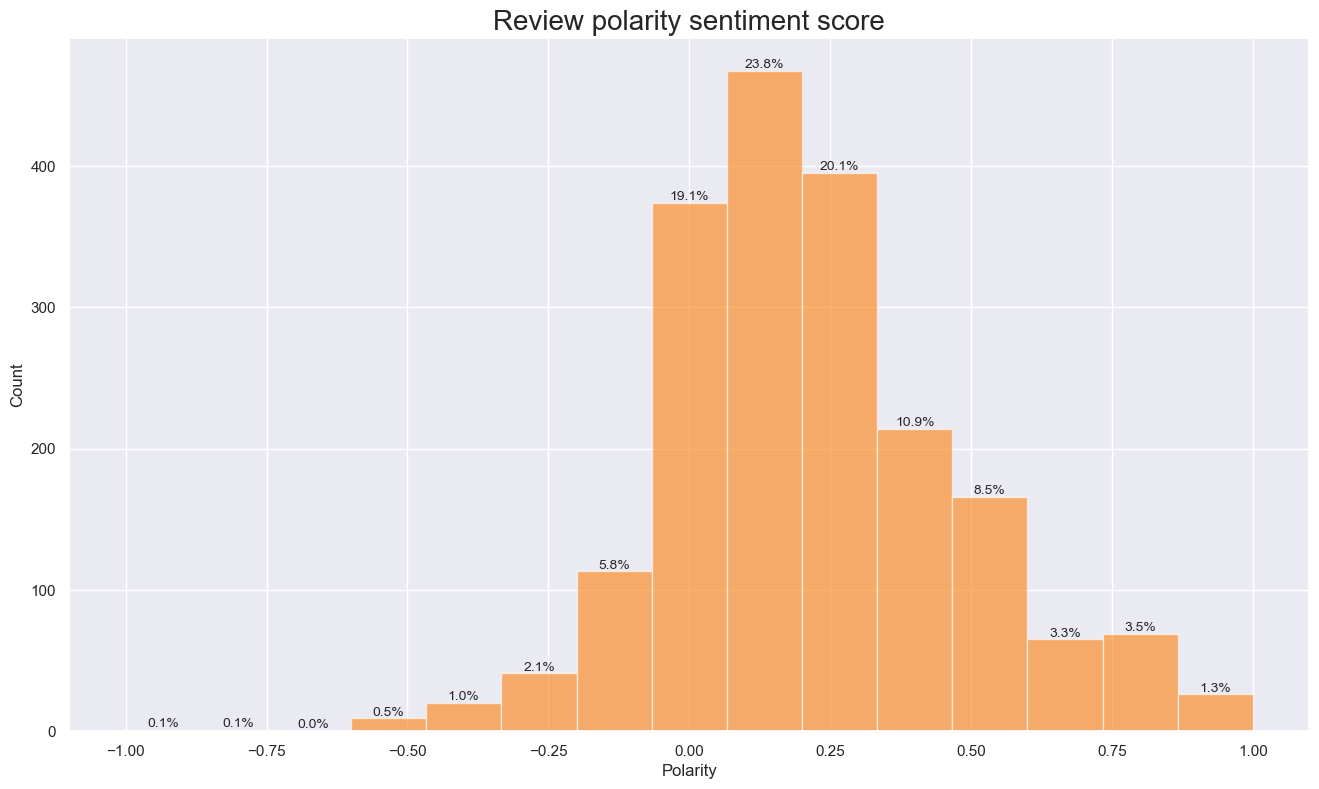

In [402]:
# Create a histogram of sentiment polarity for the review column. 
# Create a histogram plot with bins = 15.

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews_new['rvpolarity'], num_bins, facecolor='#FF800E', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review polarity sentiment score', fontsize=20)

# Add percentage labels to each bar.
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for i, bin in enumerate(bins[:-1]):
    plt.text(bin_centers[i], n[i], f'{n[i]/len(reviews_new)*100:.1f}%', ha='center', va='bottom', fontsize=10)
    

# Save the plot.
plt.savefig('Review polarity histo')

# View the plot. 
plt.show()

In [403]:
# Calculate the average polarity score for review.
avg_rvpolarity = reviews_new['rvpolarity'].mean()

# Print the average review polarity score.
print(f"Average review polarity score: {avg_rvpolarity:.2f}")

Average review polarity score: 0.21


#### 3.4.3.2 Summary column. 

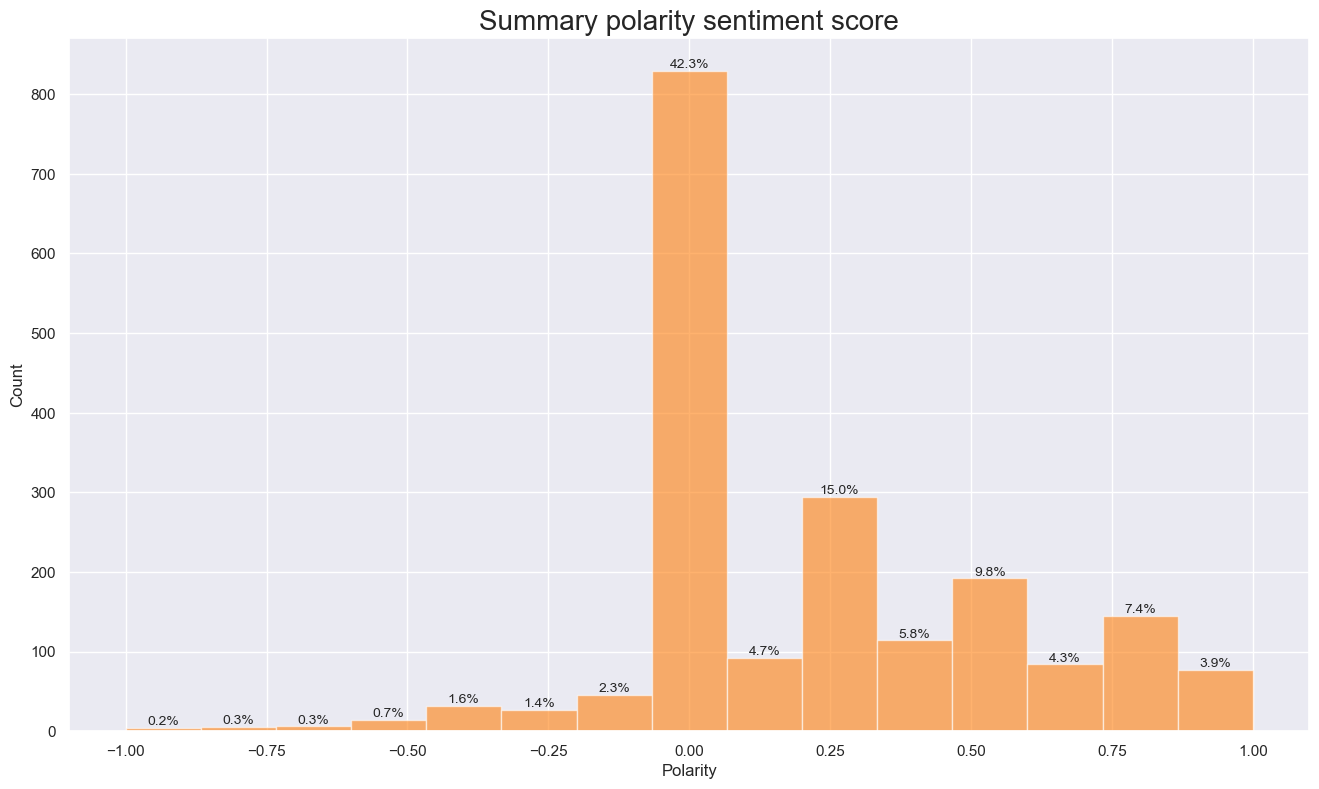

In [404]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of sentiment polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews_new['smpolarity'], num_bins, facecolor='#FF800E', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary polarity sentiment score', fontsize=20)

# Add percentage labels to each bar.
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for i, bin in enumerate(bins[:-1]):
    plt.text(bin_centers[i], n[i], f'{n[i]/len(reviews_new)*100:.1f}%', ha='center', va='bottom', fontsize=10)

# Save the plot.
plt.savefig('Summary polarity histo')

# View the plot. 
plt.show()

In [405]:
# Calculate the average polarity score for summary.
avg_smpolarity = reviews_new['smpolarity'].mean()

# Print the average polarity score.
print(f"Average summary polarity score: {avg_smpolarity:.2f}")

Average summary polarity score: 0.22


### 3.4.4 Visualisation of subjectivity distribution. 

#### 3.4.4.1 Review column. 

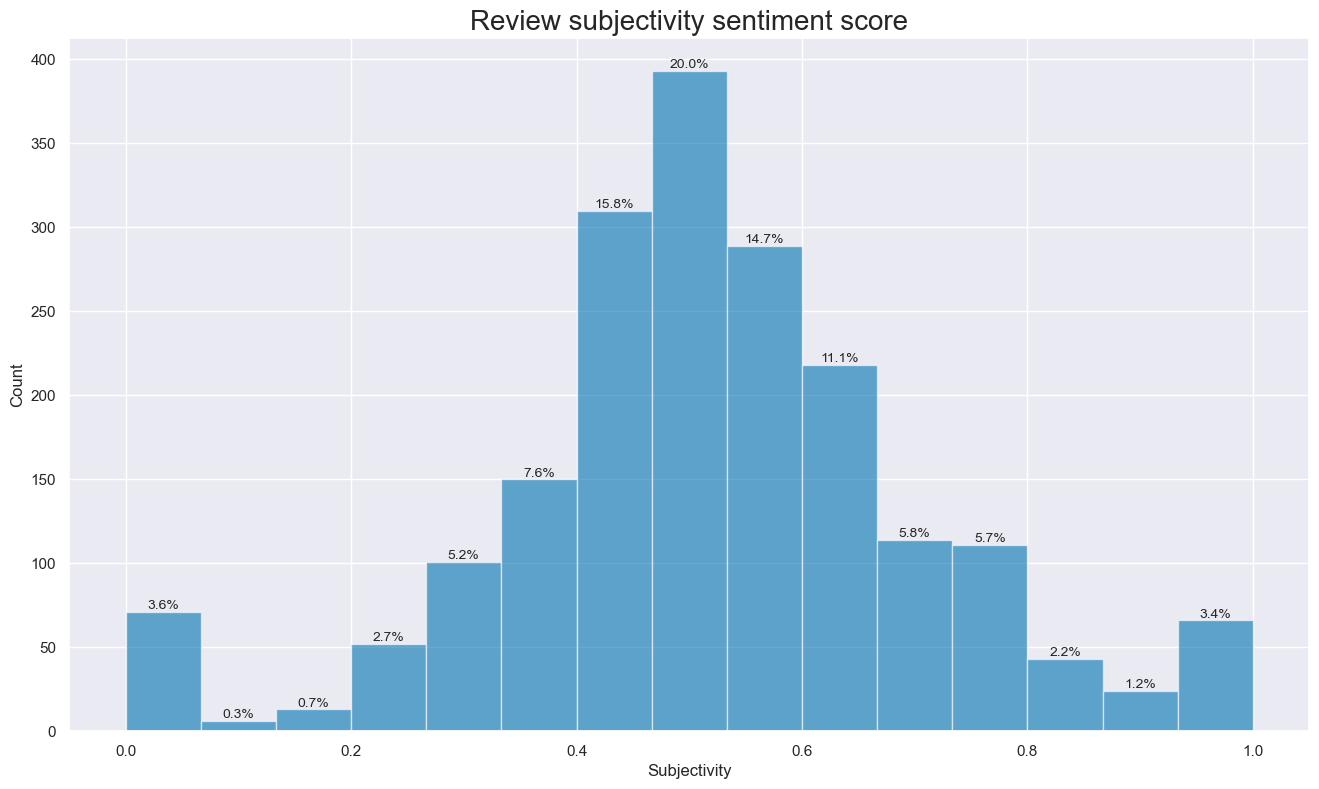

In [406]:
# Create a histogram of sentiment subjectivity for review. 
# Create a histogram plot with bins = 15.

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews_new['rvsubject'], num_bins, facecolor='#0072B2', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review subjectivity sentiment score', fontsize=20)

# Add percentage labels to each bar.
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for i, bin in enumerate(bins[:-1]):
    plt.text(bin_centers[i], n[i], f'{n[i]/len(reviews_new)*100:.1f}%', ha='center', va='bottom', fontsize=10)

# Save the plot.
plt.savefig('review subject histo')

# View the plot. 
plt.show()

In [407]:
# Calculate the average subjectivity score.
avg_rvsubject = reviews_new['rvsubject'].mean()

# Print the average polarity score.
print(f"Average subjectivity score: {avg_rvsubject:.2f}")

Average subjectivity score: 0.52


#### 3.4.4.2 Summary column. 

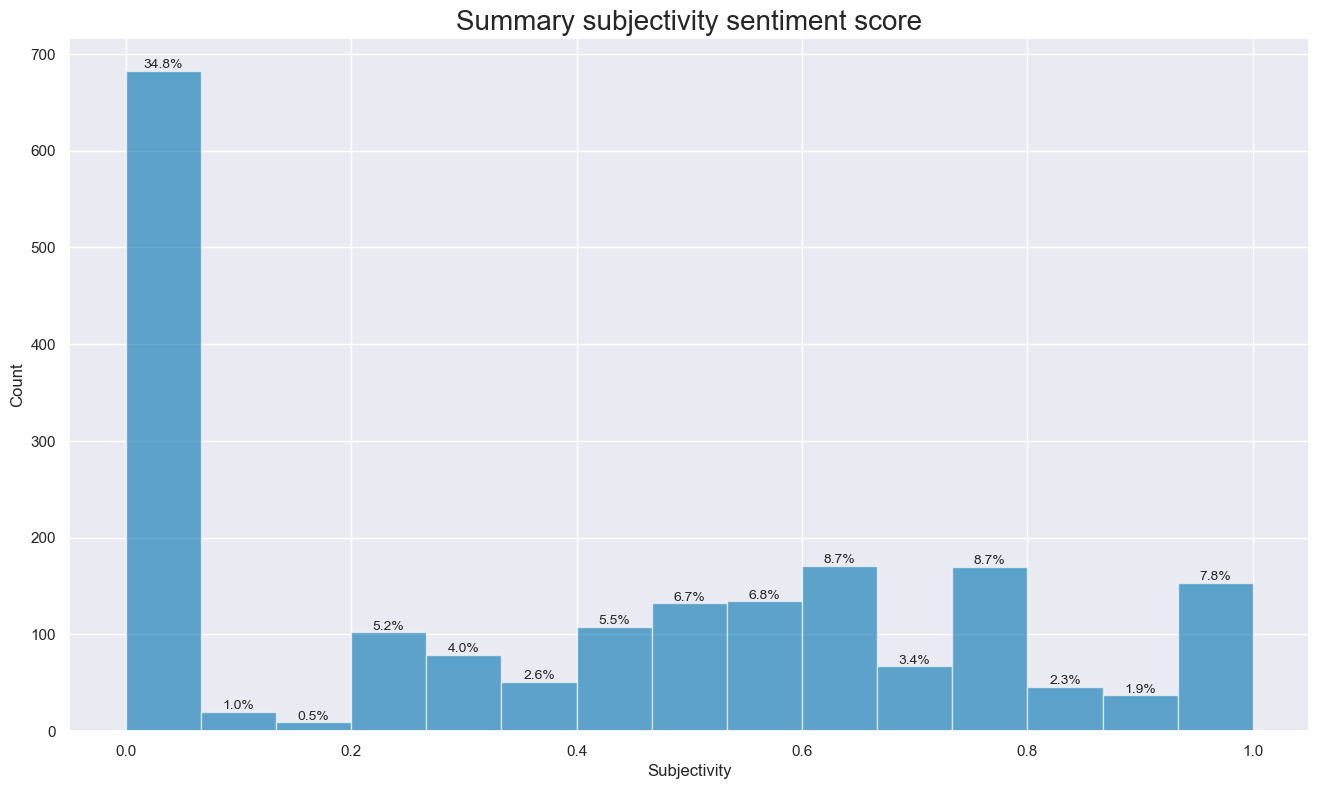

In [408]:
# Create a histogram of sentiment subjectivity for summary 
# Create a histogram plot with bins = 15.

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews_new['smsubject'], num_bins, facecolor='#0072B2', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary subjectivity sentiment score', fontsize=20)

# Add percentage labels to each bar.
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for i, bin in enumerate(bins[:-1]):
    plt.text(bin_centers[i], n[i], f'{n[i]/len(reviews_new)*100:.1f}%', ha='center', va='bottom', fontsize=10)

# Save the plot.
plt.savefig('summary subject histo')

# View the plot. 
plt.show()

In [409]:
# Calculate the average subjectivity score.
avg_smsubject = reviews_new['smsubject'].mean()

# Print the average polarity score.
print(f"Average subjectivity score: {avg_smsubject:.2f}")

Average subjectivity score: 0.39


## 3.5. Identify most positive reviews and summaries. 

While the initial wordclouds generated earlier revealed some positive words that could be used in marketing campaigns, the marketing department at Turtle Games requested further analysis of just top positive reviews in order to uncover a wider range to words. It also would like to identify positive reviews and summaries so the company can respond to these online. 

This analysis involved identifying the top 250 positive reviews and summaries by polarity score and generating wordclouds and frequency distributions for the top terms. The output revealed several new words that the marketing team can use for its campaigns. For example, additional words extracted from reviews and summaries include 'perfect,' 'excellent,' 'best,' 'wonderful,' 'gift,' and 'kids.'

It also created code to print out the top 20 reviews or summaries with the corresponding polarity score. The company can use this to identify which are the best positive customer reviews or summaries to respond to online.   

### 3.5.1 Review column

#### 3.5.1.1 Top positive reviews by polarity. 

In [410]:
# Find the top 250 positive reviews. 
posrv = reviews_new.nlargest(250, 'rvpolarity').reset_index()

# Eliminate unnecessary columns.
posrv = posrv[['review', 'rvpolarity']]

# Adjust the column width.
pd.set_option('display.max_colwidth', 1000)

# View the top 10 most positive reviews. 
posrv.head(10)

review  rvpolarity
0                                  came in perfect condition         1.0
1                                               awesome book         1.0
2                                               awesome gift         1.0
3      excellent activity for teaching selfmanagement skills         1.0
4                                perfect just what i ordered         1.0
5                                          wonderful product         1.0
6                                         delightful product         1.0
7  wonderful for my grandson to learn the resurrection story         1.0
8                                                    perfect         1.0
9                                                    awesome         1.0

#### 3.5.1.2 Print the top 20 positive reviews by polarity. 

In [411]:
# Print the sentiment value of the first 20 positive reviews. 
count = 0
for index, row in posrv.iterrows():
    if count == 20:
        break
    polarity = row['rvpolarity']
    review_text = row['review']
    print(f'The sentiment value of this positive review :"{review_text}" is : {polarity}')
    print("="*50)
    count += 1

The sentiment value of this positive review :"came in perfect condition" is : 1.0
The sentiment value of this positive review :"awesome book" is : 1.0
The sentiment value of this positive review :"awesome gift" is : 1.0
The sentiment value of this positive review :"excellent activity for teaching selfmanagement skills" is : 1.0
The sentiment value of this positive review :"perfect just what i ordered" is : 1.0
The sentiment value of this positive review :"wonderful product" is : 1.0
The sentiment value of this positive review :"delightful product" is : 1.0
The sentiment value of this positive review :"wonderful for my grandson to learn the resurrection story" is : 1.0
The sentiment value of this positive review :"perfect" is : 1.0
The sentiment value of this positive review :"awesome" is : 1.0
The sentiment value of this positive review :"awesome set" is : 1.0
The sentiment value of this positive review :"best set buy 2 if you have the means" is : 1.0
The sentiment value of this positi

#### 3.5.1.3 Generate a wordcloud of the top 250 positive reviews by polarity. 

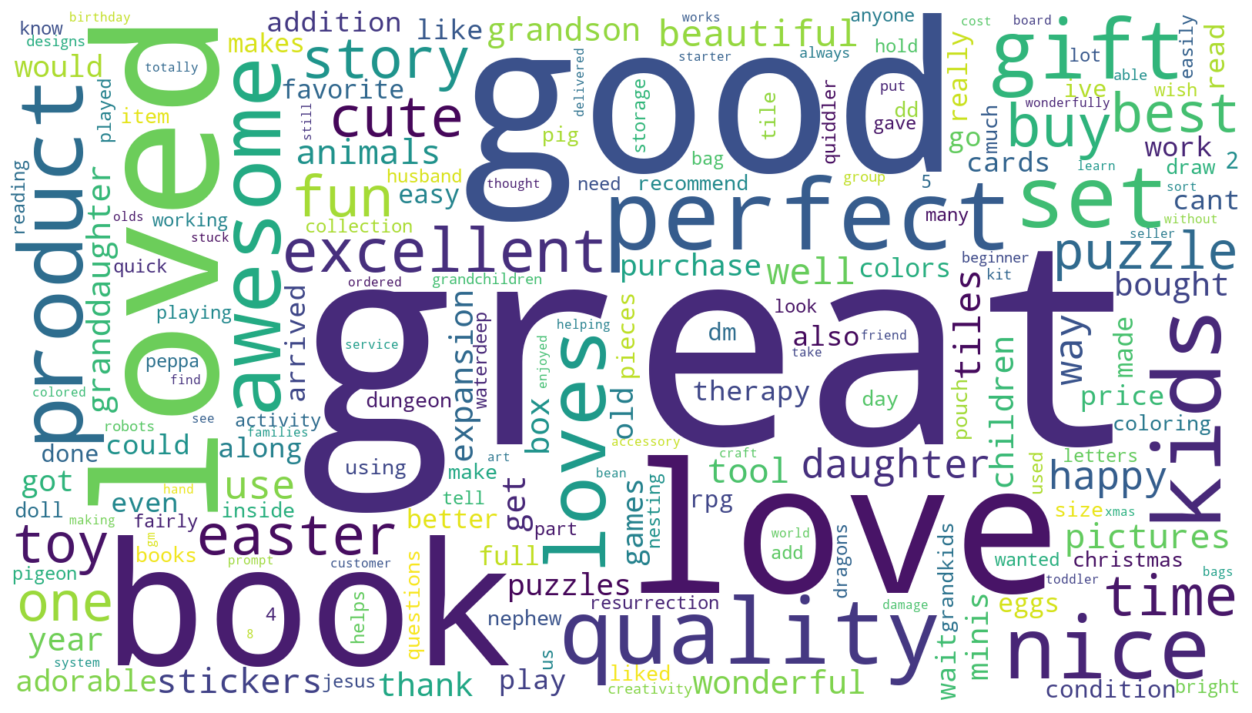

In [412]:
# Create a wordcloud with the words from the 250 most positive reviews.

# Load stopwords
stop_words = set(stopwords.words('english'))

# Reviews are joined together into a single string using the join() method.
# Assigned to the posrv_text variable.
posrv_text = ' '.join(posrv['review'])

# Use the split method to tokenize this string and get a list of individual words.
posrv_tokens = posrv_text.split()

# Remove stopwords.
posrv_tokens_stop = [word for word in posrv_tokens if word.lower() not in stop_words]

# Count the frequency of each word using a Counter object.
posrv_freq = Counter(posrv_tokens_stop)

# Generate a wordcloud. 
wordcloud5 = WordCloud(width = 1600, height = 900, background_color='white',
                       min_font_size = 5).generate_from_frequencies(posrv_freq)

# Display the word cloud
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis('off')

# Save the plot.
plt.savefig('Review 250 positive')

# See the plot. 
plt.show()

#### 3.5.1.4 Determine the top 15 most common words in positive reviews. 

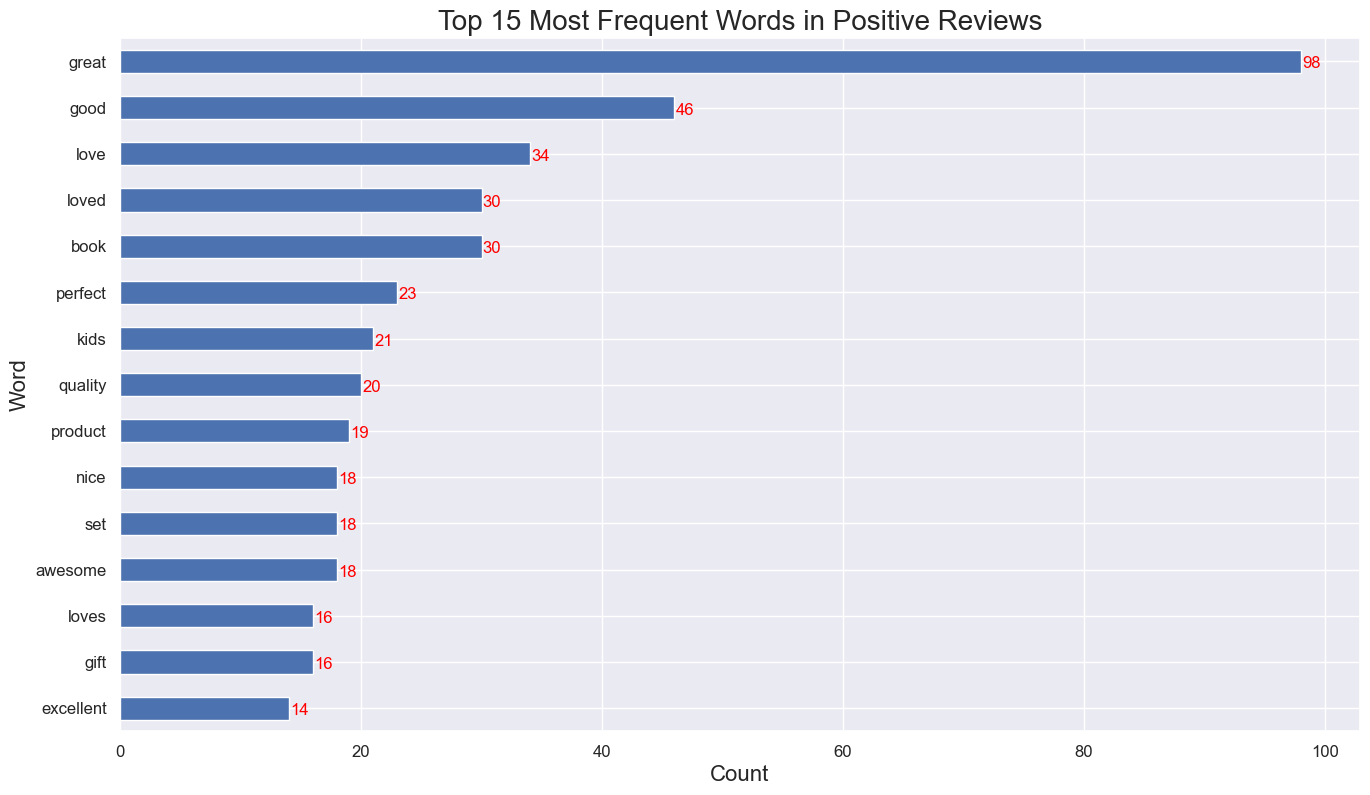

In [413]:
# Dictionary created of top 15 most common words using most_common() method from Counter class.
top_posrv = posrv_freq.most_common(15)

# Convert the dictionary to a DataFrame.
df3 = pd.DataFrame(top_posrv, columns=['Word', 'Count']).set_index('Word')

# Sort the DataFrame into descending order. 
df3 = df3.sort_values(by='Count', ascending=True)

# Create a horizontal barchart.
ax = df3.plot(kind='barh', figsize=(16, 9), fontsize=12, legend=None)

# Set the labels.
ax.set_xlabel('Count', fontsize=16)
ax.set_ylabel('Word', fontsize=16)
ax.set_title("Top 15 Most Frequent Words in Positive Reviews", fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + 0.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')
    
# Save the plot.
plt.savefig('Review 250 freq')

# See the plot. 
plt.show()

### 3.5.2 Summary column. 

#### 3.5.2.1 Top positive summaries by polarity. 

In [414]:
# Find the top 250 positive summaries. 
possm = reviews_new.nlargest(250, 'smpolarity').reset_index()

# Eliminate unnecessary columns.
possm = possm[['summary', 'smpolarity']]

# Adjust the column width.
pd.set_option('display.max_colwidth', 1000)

# View the top 10 most positive summaries. 
possm.head(10)

summary  smpolarity
0                                      best gm screen ever         1.0
1                                        wonderful designs         1.0
2                                                  perfect         1.0
3  theyre the perfect size to keep in the car or a diaper          1.0
4                                  perfect for preschooler         1.0
5                   awesome sticker activity for the price         1.0
6                                             awesome book         1.0
7                          he was very happy with his gift         1.0
8                                                  awesome         1.0
9                 awesome and welldesigned for 9 year olds         1.0

#### 3.5.2.2 Print the top 20 positive summaries by polarity. 

In [415]:
# Print the sentiment value of the first 20 positive sumamries. 
count = 0
for index, row in possm.iterrows():
    if count == 20:
        break
    polarity = row['smpolarity']
    summary_text = row['summary']
    print(f'The sentiment value of this positive summary :"{summary_text}" is : {polarity}')
    print("="*50)
    count += 1

The sentiment value of this positive summary :"best gm screen ever" is : 1.0
The sentiment value of this positive summary :"wonderful designs" is : 1.0
The sentiment value of this positive summary :"perfect" is : 1.0
The sentiment value of this positive summary :"theyre the perfect size to keep in the car or a diaper " is : 1.0
The sentiment value of this positive summary :"perfect for preschooler" is : 1.0
The sentiment value of this positive summary :"awesome sticker activity for the price" is : 1.0
The sentiment value of this positive summary :"awesome book" is : 1.0
The sentiment value of this positive summary :"he was very happy with his gift" is : 1.0
The sentiment value of this positive summary :"awesome" is : 1.0
The sentiment value of this positive summary :"awesome and welldesigned for 9 year olds" is : 1.0
The sentiment value of this positive summary :"perfect" is : 1.0
The sentiment value of this positive summary :"excellent" is : 1.0
The sentiment value of this positive su

#### 3.5.2.3 Generate a wordcloud of the top 250 positive summaries by polarity.  

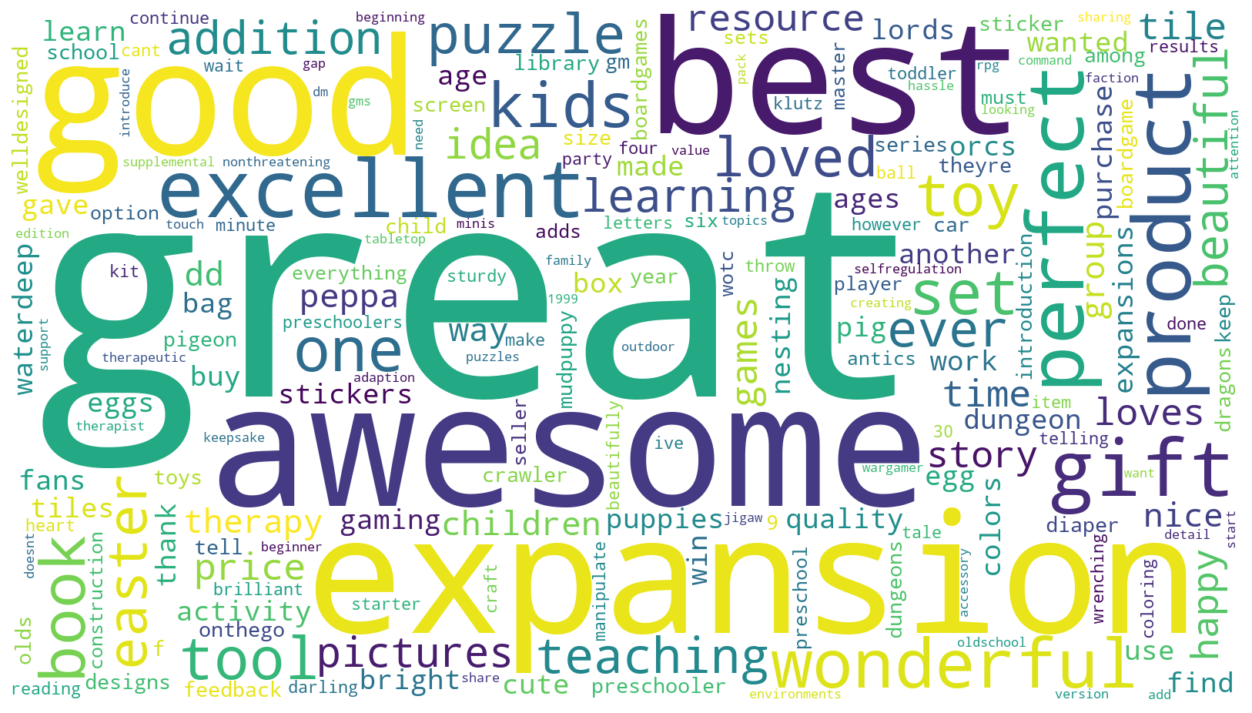

In [416]:
# Create a wordcloud with the words from the 100 most positive summaries. 

# Summaries are joined together into a single string using the join() method.
# Assigned to the possm_text variable.
possm_text = ' '.join(possm['summary'])

# Use the split method to tokenize this string and get a list of individual words.
possm_tokens = possm_text.split()

# Remove stopwords.
possm_tokens_stop = [word for word in possm_tokens if word.lower() not in stop_words]

# Count the frequency of each word using a Counter object.
possm_freq = Counter(possm_tokens_stop)

# Generate a wordcloud. 
wordcloud6 = WordCloud(width = 1600, height = 900, background_color='white',
                       min_font_size = 5).generate_from_frequencies(possm_freq)

# Display the word cloud
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud6, interpolation='bilinear')
plt.axis('off')


# Save the plot.
plt.savefig('Summary 250')

# See the plot. 
plt.show()

#### 3.5.2.3 Determine the top 15 most common words in positive summaries. 

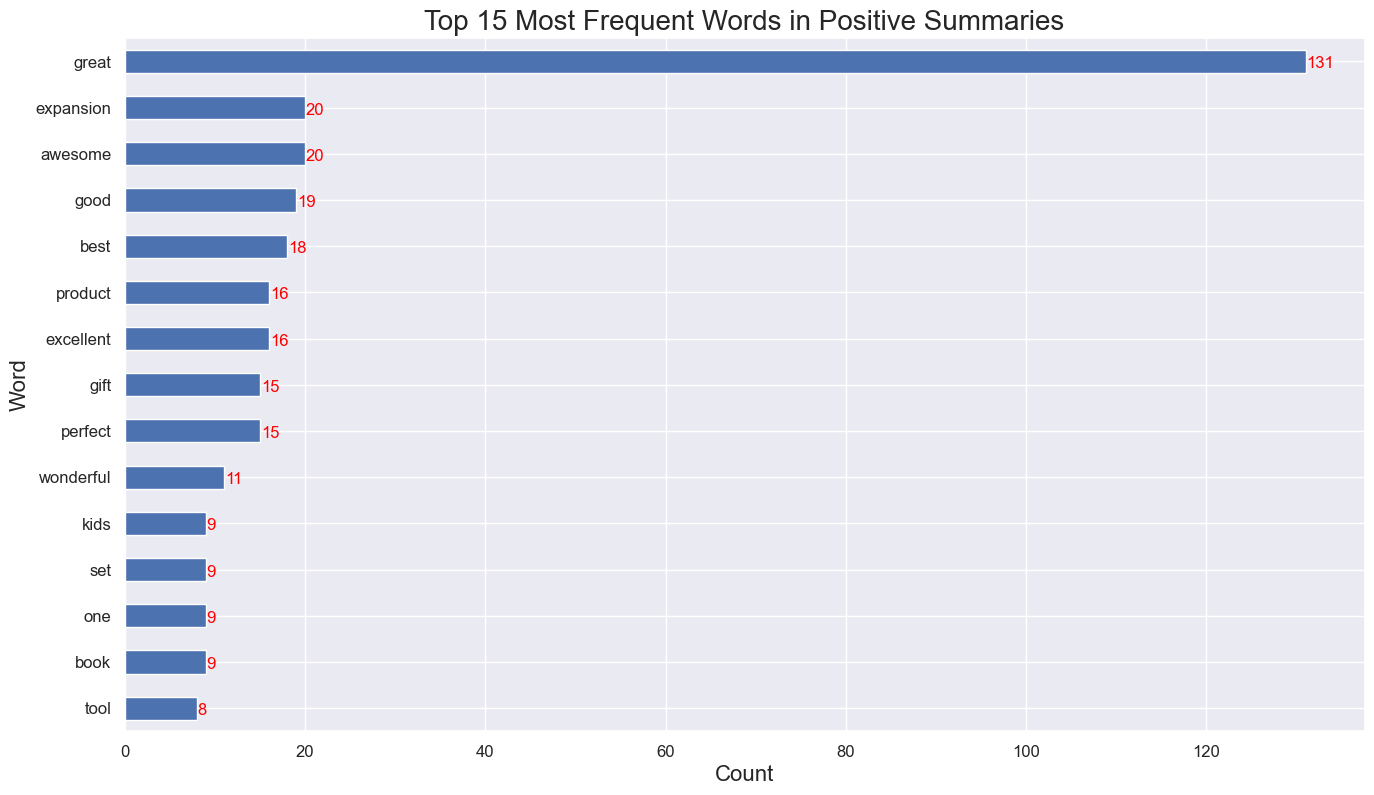

In [417]:
# Dictionary created of top 15 most common words using most_common() method from Counter class.
top_possm = possm_freq.most_common(15)

# Convert the dictionary to a DataFrame.
df4 = pd.DataFrame(top_possm, columns=['Word', 'Count']).set_index('Word')

# Sort the DataFrame into descending order. 
df4 = df4.sort_values(by='Count', ascending=True)

# Create a horizontal barchart.
ax = df4.plot(kind='barh', figsize=(16, 9), fontsize=12, legend=False)

# Set the labels.
ax.set_xlabel('Count', fontsize=16)
ax.set_ylabel('Word', fontsize=16)
ax.set_title("Top 15 Most Frequent Words in Positive Summaries", fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + 0.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')
    
# Save the plot.
plt.savefig('Summary freq 250')

# See the plot. 
plt.show()

## 3.6. Identify top negative reviews and summaries. 

While the histograms generated in 3.4.3 showed that the overall distribution of reviews and summaries was mainly positive, the marketing department at Turtle Games requested a more in-depth investigation into the most negative reviews and summaries by polarity score. It intends to use this analysis to identify customer pain points and areas of improvement for the company. 

This analysis involved identifying the top 250 negative reviews and summaries by polarity score and generating wordclouds and frequency distributions for the top terms. It also created code to print out the top 20 negative reviews or summaries with the corresponding polarity score. The company can use this to identify which are the most important negative customer reviews or summaries to investigate further.   

For the review column, only one of the top 15 most common words in negative reviews concerned the marketing team e.g., 'anger.' Further investigation revealed that this word was incorrectly classified as negative and was really being used to positively describe a game to help children manage their anger. For the summary column, the terms 'anger,' 'disappointed,' and 'disappointing' were investigated further. Again, the word 'anger' was incorrectly classified as negative in summaries. There were 12 summaries containing either 'disappointed,' and 'disappointing,' and Turtle Games should reach out to these customers to investigate why they were disappointed with their purchase. 'Game' was the most common word in negative reviews and summaries, but this is because the majority of the company's products are games. 

### 3.6.1 Review column. 

#### 3.6.1.1 Top negative reviews by polarity.

In [418]:
# Find the top 250 negative reviews. 
negrv = reviews_new.nsmallest(250, 'rvpolarity').reset_index()

# Eliminate unnecessary columns.
negrv = negrv[['review', 'rvpolarity']]

# Adjust the column width.
pd.set_option('display.max_colwidth', 1000)

# View the top 10 negative reviews. 
negrv.head(10)

review  \
0                                                                             booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not   
1                                                                                                                                                                                                incomplete kit very disappointing   
2                                                                                                                                                          im sorry i just find this product to be boring and to be frank juvenile   
3  one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it   
4                                                                                                                        i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift   
5                                                                                                                                                                      this was a gift for my daughter i found it difficult to use   
6                                                                                                                                                                                                 i found the directions difficult   
7                                                                                                                                                                                           instructions are complicated to follow   
8                                                                                                                                                                                                                        difficult   
9                                                                                                                                                                                                       expensive for what you get   

   rvpolarity  
0   -1.000000  
1   -0.780000  
2   -0.583333  
3   -0.550000  
4   -0.500000  
5   -0.500000  
6   -0.500000  
7   -0.500000  
8   -0.500000  
9   -0.500000

#### 3.6.1.2 Print the top 20 negative reviews by polarity. 

In [419]:
# Print the sentiment value of the first 20 negative reviews. 
count = 0
for index, row in negrv.iterrows():
    if count == 20:
        break
    polarity = row['rvpolarity']
    review_text = row['review']
    print(f'The sentiment value of this negative review :"{review_text}" is : {polarity}')
    print("="*50)
    count += 1

The sentiment value of this negative review :"booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not" is : -1.0
The sentiment value of this negative review :"incomplete kit very disappointing" is : -0.78
The sentiment value of this negative review :"im sorry i just find this product to be boring and to be frank juvenile" is : -0.5833333333333334
The sentiment value of this negative review :"one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it" is : -0.55
The sentiment value of this negative review :"i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift" is : -0.5
The sentiment value of this negative review :"this was a gift for my daughter i found it difficult to use" is : -

#### 3.6.1.3 Generate a wordcloud of the top 250 negative reviews by polarity. 

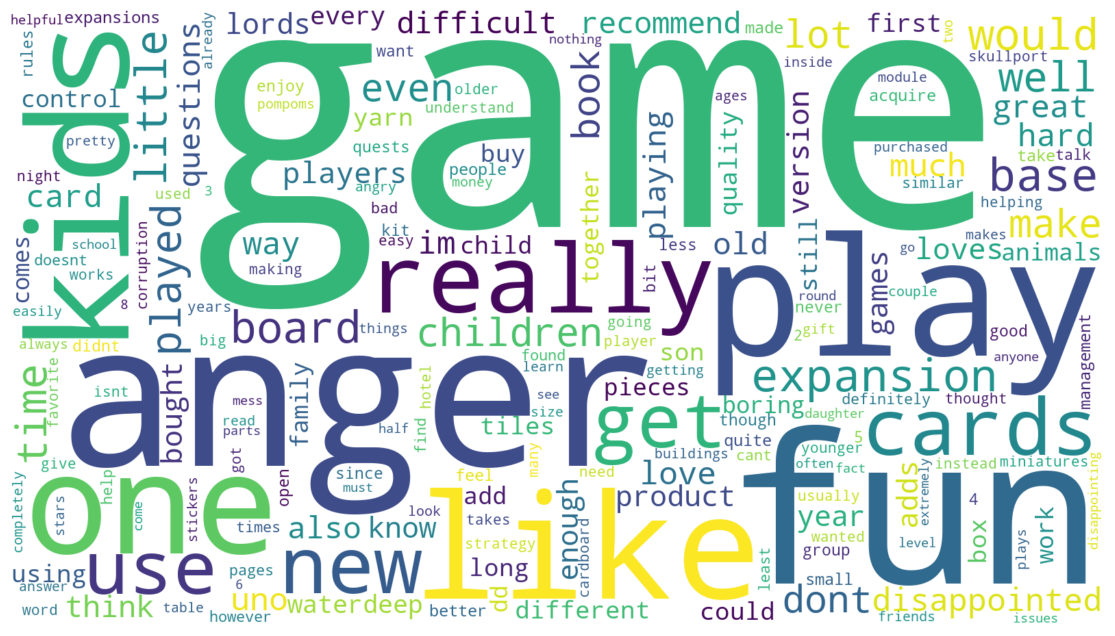

In [420]:
# Create a wordcloud with the words from the 100 most negative reviews. 

# Reviews are joined together into a single string using the join() method.
# Assigned to the negrv_text variable.
negrv_text = ' '.join(negrv['review'])

# Use the split method to tokenize this string and get a list of individual words.
negrv_tokens = negrv_text.split()

# Remove stopwords.
negrv_tokens_stop = [word for word in negrv_tokens if word.lower() not in stop_words]

# Count the frequency of each word using a Counter object.
negrv_freq = Counter(negrv_tokens_stop)

# Generate a wordcloud. 
wordcloud7 = WordCloud(width = 1600, height = 900, background_color='white',
                       min_font_size = 5).generate_from_frequencies(negrv_freq)

# Display the wordcloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud7, interpolation='bilinear')
plt.axis('off')

# Save the plot.
plt.savefig('Review 250 neg')

# See the plot. 
plt.show()

#### 3.6.1.4 Determine the top 15 most common words in negative reviews. 

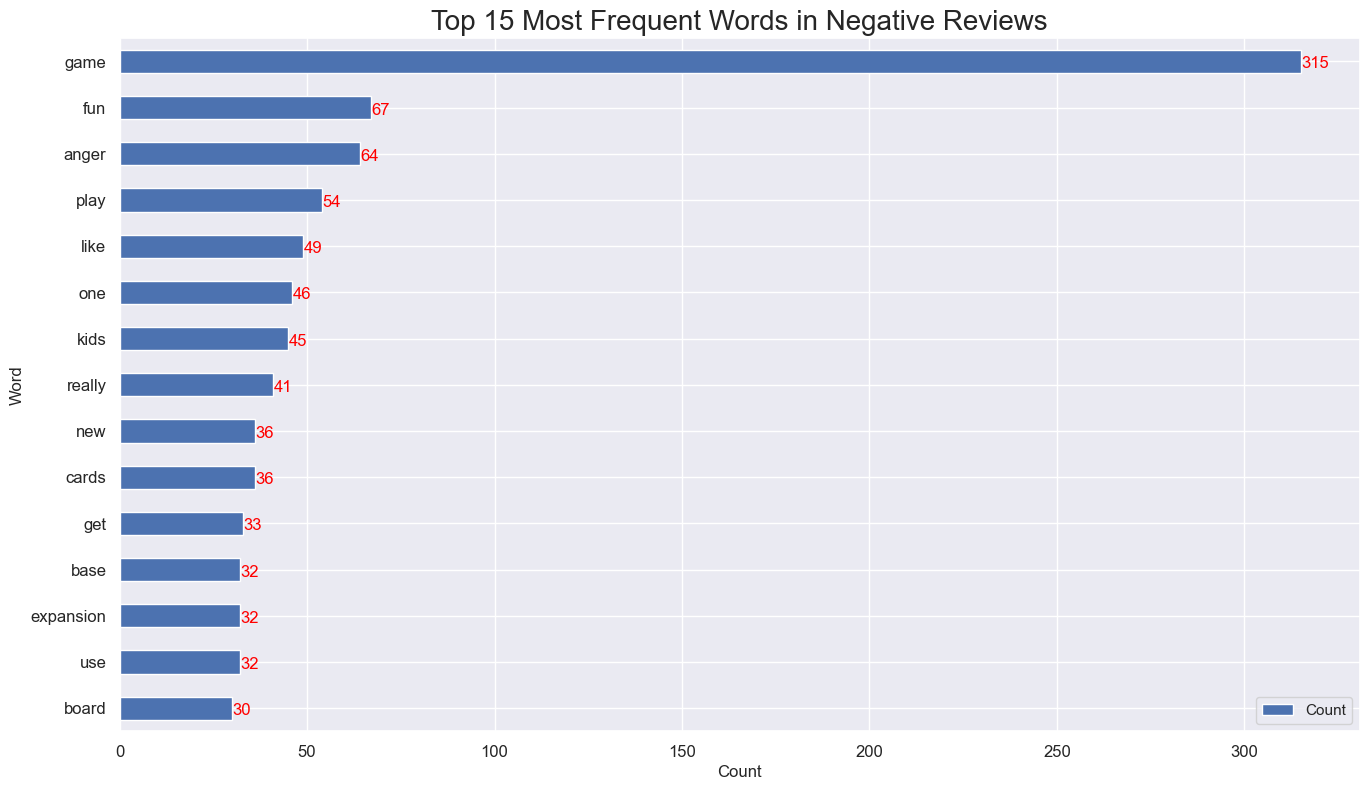

In [421]:
# Dictionary created of top 15 most common words using most_common() method from Counter class.
top_negrv = negrv_freq.most_common(15)

# Convert the dictionary to a DataFrame.
df5 = pd.DataFrame(top_negrv, columns=['Word', 'Count']).set_index('Word')

# Sort the DataFrame into descending order. 
df5 = df5.sort_values(by='Count', ascending=True)

# Create a horizontal barchart.
ax = df5.plot(kind='barh', figsize=(16, 9), fontsize=12)

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Top 15 Most Frequent Words in Negative Reviews", fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + 0.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')
    
# See the plot. 
plt.show()

#### 3.6.1.5 Investigate certain words from negative reviews. 

In [422]:
# Investigate the word 'anger'. 
anger_reviews = negrv[negrv['review'].str.contains('anger', case=False)]

# Get the count of reviews containing 'anger'
num_anger_reviews = anger_reviews.shape[0]

# Display the count
print(f'There are {num_anger_reviews} negative reviews out of 250 containing the word "anger"')

There are 40 negative reviews out of 250 containing the word "anger"


In [423]:
# Display the search result
pd.set_option('display.max_colwidth', None)
anger_reviews.head(20)

# Output shows that the term anger is not being used in a negative way.
# It is being used to postively describe a game to help children manage their anger. 
# Anger has been incorrectly classified as negative. 

review  \
3                                                                                                                                                                                                                                                                                                                                                                                                           one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it   
28                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      very fun game to use with kids working on handling anger you play like uno but have to answer questions about anger   
29                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  i really like this game it helps kids recognize anger and talk about difficult emotions   
31                                                                                                                                                                                                                                                                                                                                                                                                                                                                            i am a therapist for children and this game is so valuable to bring out insight and solutions to deal with and identify feelings of anger i use it frequently   
41                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  its uno with questions about anger its an okay way to discuss anger but it gets repetitive and the students start to get bored after about half a round   
43                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  fun game for kids in learning how to manage their anger   
44                                                                                                                                                                                                                                                          

### 3.6.2 Summary column. 

#### 3.6.2.1 Top 250 negative summaries by polarity. 

In [424]:
# Show the top 250 negative summaries. 
negsm = reviews_new.nsmallest(250, 'smpolarity').reset_index(0)

# Eliminate unnecessary columns.
negsm = negsm[['summary', 'smpolarity']]

# Adjust the column width.
pd.set_option('display.max_colwidth', 1000)

# View the top 10 negative summaries. 
negsm.head(10)

summary  \
0                                                the worst value ive ever seen   
1                             boring unless you are a craft person which i am    
2                                                                       boring   
3  before this i hated running any rpg campaign dealing with towns because it    
4                     another worthless dungeon masters screen from galeforce9   
5                                                                 disappointed   
6                                                                 disappointed   
7                                                                 disappointed   
8                                                                 disappointed   
9                           promotes anger instead of teaching calming methods   

   smpolarity  
0       -1.00  
1       -1.00  
2       -1.00  
3       -0.90  
4       -0.80  
5       -0.75  
6       -0.75  
7       -0.75  
8       -0.75  
9       -0.70

#### 3.6.2.2 Print the top 20 negative summaries by polarity. 

In [425]:
# Print the sentiment value of the first 20 negative summaries. 
count = 0
for index, row in negsm.iterrows():
    if count == 20:
        break
    polarity = row['smpolarity']
    summary_text = row['summary']
    print(f'The sentiment value of this negative summary :"{summary_text}" is : {polarity}')
    print("="*50)
    count += 1

The sentiment value of this negative summary :"the worst value ive ever seen" is : -1.0
The sentiment value of this negative summary :"boring unless you are a craft person which i am " is : -1.0
The sentiment value of this negative summary :"boring" is : -1.0
The sentiment value of this negative summary :"before this i hated running any rpg campaign dealing with towns because it " is : -0.9
The sentiment value of this negative summary :"another worthless dungeon masters screen from galeforce9" is : -0.8
The sentiment value of this negative summary :"disappointed" is : -0.75
The sentiment value of this negative summary :"disappointed" is : -0.75
The sentiment value of this negative summary :"disappointed" is : -0.75
The sentiment value of this negative summary :"disappointed" is : -0.75
The sentiment value of this negative summary :"promotes anger instead of teaching calming methods" is : -0.7
The sentiment value of this negative summary :"too bad this is not what i was expecting" is : 

#### 3.6.2.3 Generate a wordcloud of the top 250 negative summaries by polarity. 

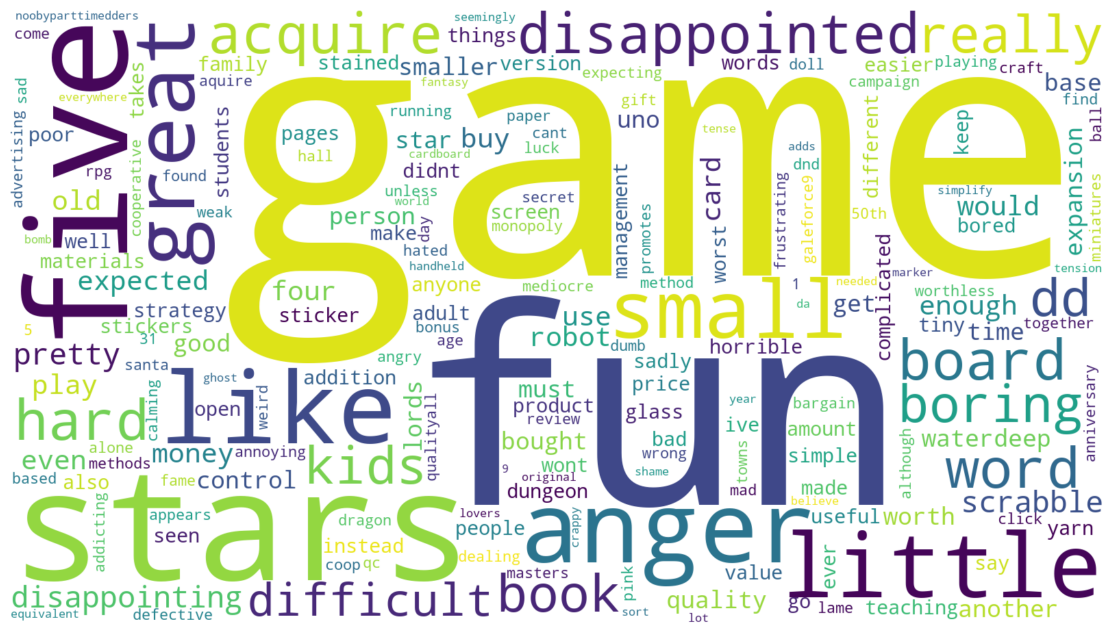

In [426]:
# Create a wordcloud with the words from the 100 most negative summaries. 

# Summaries are joined together into a single string using the join() method.
# Assigned to the negsm_text variable.
negsm_text = ' '.join(negsm['summary'])

# Use the split method to tokenize this string and get a list of individual words.
negsm_tokens = negsm_text.split()

# Remove stopwords.
negsm_tokens_stop = [word for word in negsm_tokens if word.lower() not in stop_words]

# Count the frequency of each word using a Counter object.
negsm_freq = Counter(negsm_tokens_stop)

# Generate a wordcloud. 
wordcloud8 = WordCloud(width = 1600, height = 900, background_color='white',
                       min_font_size = 5).generate_from_frequencies(negsm_freq)

# Display the wordcloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud8, interpolation='bilinear')
plt.axis('off')

# See the plot. 
plt.show()

#### 3.6.2.4 Determine the top 15 most common words in negative summaries. 

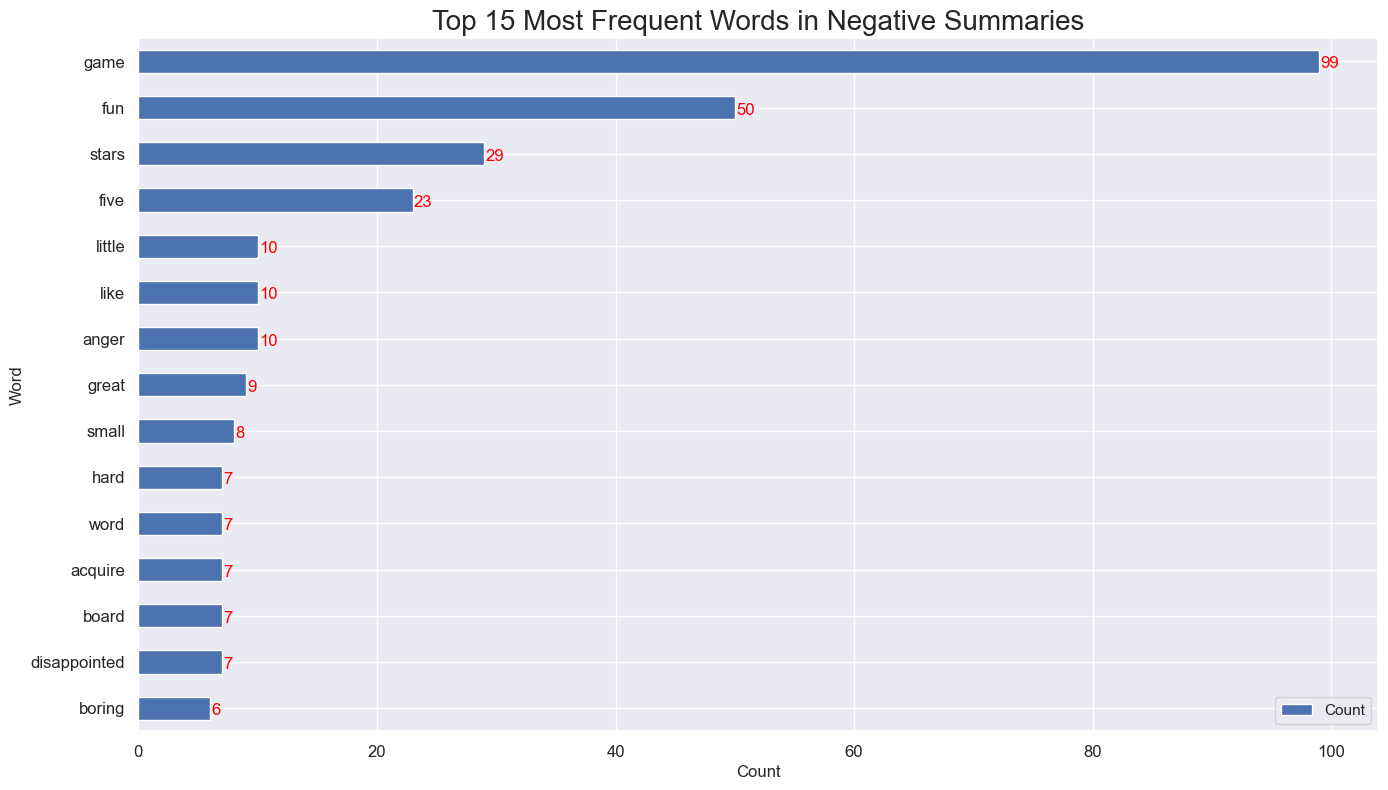

In [427]:
# Dictionary created of top 15 most common words using most_common() method from Counter class.
top_negsm = negsm_freq.most_common(15)

# Convert the dictionary to a DataFrame.
df6 = pd.DataFrame(top_negsm, columns=['Word', 'Count']).set_index('Word')

# Sort the DataFrame into descending order. 
df6 = df6.sort_values(by='Count', ascending=True)

# Create a horizontal barchart.
ax = df6.plot(kind='barh', figsize=(16, 9), fontsize=12)

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Top 15 Most Frequent Words in Negative Summaries", fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + 0.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')
    
# See the plot. 
plt.show()

#### 3.6.2.5 Investigate certain words from negative summaries. 

In [428]:
# Investigate summaries containing 'disappointed' or 'disappointing'. 
# The word 'disappointing' is also in the wordcloud. 
disappoint_summary = negsm[negsm['summary'].str.contains('disappoint(?:ing|ed)', case=False)]

# Get the count of reviews containing 'disappointed' or 'disappointing'.
num_diss_summary = disappoint_summary.shape[0]

# Display the count. 
print(f'There are {num_diss_summary} negative summaries out of 250 containing the word "disappointed" or "disappointing"')

There are 12 negative summaries out of 250 containing the word "disappointed" or "disappointing"


In [429]:
# Display the search result
pd.set_option('display.max_colwidth', None)
disappoint_summary.head(20)

# Output shows the terms disappointed and disappointing have been classified correctly as negative.
# Turtle Games should reach out to these customers to investigate why they were disappointed with their product.

summary  \
5                                                           disappointed   
6                                                           disappointed   
7                                                           disappointed   
8                                                           disappointed   
15                                                         disappointing   
16                                                         disappointing   
17                                                         disappointing   
18                                                         disappointing   
22                                             really small disappointed   
25                                             a disappointing coop game   
62                                               disappointed 9 year old   
91  she was disappointed when there was not enough yarn to complete the    

    smpolarity  
5      -0.7500  
6      -0.7500  
7      -0.7500  
8      -0.7500  
15     -0.6000  
16     -0.6000  
17     -0.6000  
18     -0.6000  
22     -0.5000  
25     -0.5000  
62     -0.3250  
91     -0.1875

In [430]:
# Investigate the word 'anger'. 
anger_summary = negsm[negsm['summary'].str.contains('anger', case=False)]

# Get the count of reviews containing 'anger'
num_anger_summary = anger_summary.shape[0]

# Display the count
print(f'There are {num_anger_summary} negative summaries out of 250 containing the word "anger"')

There are 11 negative summaries out of 250 containing the word "anger"


In [431]:
# Display the search result
pd.set_option('display.max_colwidth', None)
anger_summary.head(20)

# Output confirms what was found for the review column.
# Anger has been incorrectly classified as negative. 

summary  \
9                   promotes anger instead of teaching calming methods   
20                                                  anger control game   
21                                                  anger control game   
76            very fun game to use with kids working on handling anger   
85                                   made anger management session fun   
86                                         fun way to talk about anger   
105                         good game for helping kids deal with anger   
124  great game to use with clients who struggle with anger management   
125                   great game to kick off conversations about anger   
126            great game for teaching kids how to control their anger   
138         a fun interactive game to teach kids about angermanagement   

     smpolarity  
9     -0.700000  
20    -0.550000  
21    -0.550000  
76    -0.236667  
85    -0.200000  
86    -0.200000  
105   -0.133333  
124   -0.100000  
125   -0.100000  
126   -0.100000  
138   -0.050000

## 3.7. Identify products with the most negative reviews. 

Turtle Games would also like to investigate which specific products have the most negative reviews in order to understand why they have bad reviews and how to mitigate this e.g., improve the product, remove the product from their portfolio, or replace it with a better product.

A new Dataframe was created which included the product, review, and summary columns, and new columns were added with polarity scores. The data was grouped by product number and a mean polarity score was generated for each product. The top 20 products by negative polarity score were identified for both the review and summary columns. 

Further investigation into some of these products identified some areas of potential improvement. For example, the majority of negative reviews for product 6431 were actually not negative but one review about damaged product packaging should be investigated further by Turtle Games. For product 3436, there were several suggestions on how the product could be improved e.g. stronger glue, better quality materials etc. The output from the summary column was less informative as the review column, as there was less text used to describe any issues with a product. 

One observation from this analysis is that some reviews for the same product number do not appear to be reviewing the same product. For example, for product 3436, one customer appears to be reviewing a craft product involving pups whereas another is reviewing a game involving Wizards. Addition of the product name to the review and the resulting dataset should be considered for future analysis to ensure better accuracy.  

### 3.7.1 Create a new Dataframe. 

In [432]:
# Create a new DataFrame and include product as well as review and summary. 
reviews_prod = pd.read_csv('turtle_reviews.csv', usecols=['product', 'review', 'summary'])

# View the DataFrame.
print(reviews_prod.shape)
reviews_prod.head()

(2000, 3)


product  \
0      453   
1      466   
2      254   
3      263   
4      291   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are "meh". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the "Storm King

In [433]:
# Add new review and summary polarity columns to the DataFrame. 
reviews_prod['rvpolarity'] = reviews_prod['review'].apply(generate_polarity)
reviews_prod['smpolarity'] = reviews_prod['summary'].apply(generate_polarity)

# View the DataFrame.
reviews_prod.head()

product  \
0      453   
1      466   
2      254   
3      263   
4      291   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are "meh". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the "Storm King

### 3.7.2 Group the data by product and mean polarity score for review and summary. 

In [434]:
# Get the mean of polarity score as products will have mutiple reviews. 

# Group the data by product and calculate the mean review polarity for each product
product_polrev = reviews_prod.groupby('product')[['rvpolarity']].mean()

# Group the data by product and calculate the mean summary polarity for each product
product_polsumm = reviews_prod.groupby('product')[['smpolarity']].mean()

### 3.7.3 Identify products with the most negative review polarity scores. 

In [435]:
# See the top 20 products with the most negative polarity for reviews
product_polrevneg = product_polrev.sort_values(by='rvpolarity').head(20)

# Display the results
print("Products with the most negative polarity for reviews:")
print(product_polrevneg)

Products with the most negative polarity for reviews:
         rvpolarity
product            
6431       0.001382
3436       0.011848
9597       0.035130
4399       0.036642
2795       0.047544
486        0.049146
876        0.070702
3524       0.070886
1459       0.074501
231        0.080997
3967       0.081009
5512       0.083888
9560       0.087730
6504       0.090898
7143       0.092977
2285       0.098395
2253       0.101246
6720       0.105995
7381       0.107395
2387       0.107801


#### 3.7.3.1 Investigate products with negative reviews.

In [436]:
# Investigate product number 6431. 
# Filter the reviews_prod DataFrame based on the product value and reset the index
product_6431 = reviews_prod[reviews_prod['product'] == 6431][['review']].reset_index(drop=True)

# Display the search result
pd.set_option('display.max_colwidth', None)
print(product_6431)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          review
0                      

In [437]:
# Investigate product number 3436. 
# Filter the reviews_prod DataFrame based on the product value and reset the index
product_3436 = reviews_prod[reviews_prod['product'] == 3436][['review']].reset_index(drop=True)

# Display the search result
pd.set_option('display.max_colwidth', None)
print(product_3436)

### 3.7.4 Identify products with the most negative summary polarity scores. 

In [438]:
# See the top 20 products with the most negative polarity for summary. 
product_polsummneg = product_polsumm.sort_values(by='smpolarity').head(20)

# Display the results
print("Products with the most negative polarity for summaries:")
print(product_polsummneg)

Products with the most negative polarity for summaries:
         smpolarity
product            
11056     -0.023750
1501      -0.019375
466        0.006250
3525       0.008333
9507       0.017083
4047       0.018333
123        0.035000
2285       0.046250
7143       0.050000
6720       0.055000
3967       0.057045
8235       0.070000
1241       0.070000
6678       0.073889
6287       0.080000
2457       0.081667
107        0.081667
2793       0.083333
8275       0.086597
195        0.086667


#### 3.7.4.1 Investigate products with negative summaries.

In [439]:
# Investigate product number 11056.
# Filter the reviews_prod DataFrame based on the product value and reset the index
product_11056 = reviews_prod[reviews_prod['product'] == 11056][['summary']].reset_index(drop=True)

# Display the search result
pd.set_option('display.max_colwidth', None)
print(product_11056)

                                                       summary
0                                                   Five Stars
1                                           Anger Control game
2                                                   Four Stars
3                                             SMALL but STURDY
4                                                   Five Stars
5                                                   Five Stars
6  If you have 5 or more people, and love Waterdeep, Get this!
7                                                   Five Stars
8                                                       Meh...
9                                                   Five Stars


In [440]:
# Investigate product number 1501.
# Filter the reviews_prod DataFrame based on the product value and reset the index
product_1501 = reviews_prod[reviews_prod['product'] == 1501][['summary']].reset_index(drop=True)

# Display the search result
pd.set_option('display.max_colwidth', None)
print(product_1501)

                                                          summary
0                                                  Very weak game
1                                                      Five Stars
2                                   5 year old finally opened up!
3                                                      Five Stars
4                                                   Disappointing
5                                    It's fun but no replay value
6  OK game... better when used as a DnD or Descent expansion pack
7                                                      Five Stars
8                                 but when you do it's quite fun.
9                                           Rubik's Cube unhinged


## Q3: Observations and insights

***Turtle Games wants to better understand how its customers view the company and its products and provided reviews from the company website submitted by customers who purchased and used products. Turtle Games wants to use the results of this analysis to inform future marketing initiatives and customer engagement strategies. For example, common words from positive reviews can be integrated into marketing campaigns, such as terms for search engine optimisation (SEO). The company would also like to reach out to customers to thank them for posting positive reviews, particularly its most loyal customers. Negative reviews can be used to identify customer pain points and create opportunities to reach out to these customers to resolve issues and improve retention. The company could also look to investigate why certain products have negative reviews and take action e.g., improve the product or remove it from its product offering and find a replacement.***

***The first part of this analysis generated wordclouds and word frequency distributions for both the review and summary columns. Outputs showed high levels of stopwords, particularly for the review column, such as 'the,' 'and,' 'to,' 'it,' 'of,' 'is,' and 'this.' Stopwords and non-alphanumeric characters were then removed and new wordclouds were generated. The new wordcloud and frequency distribution barcharts for the review column revealed that words like 'game,' 'great,' and 'fun' were the most prominent, while for the summary column, 'stars,' 'five,' 'game,' and 'great' appeared most frequently. As these words will be used to drive marketing campaigns and SEO tactics, Turtle Games were not satisfied with the range of terms generated and requested a deeper dive into just the most positive reviews and summaries to find more terms. Analysis of the top 250 reviews and summaries by polarity identified several additional words such as 'perfect,' 'excellent,' 'best,' 'wonderful,' 'gift,' and 'kids.'***

***The distribution of sentiment scores for all reviews and summaries was determined using histograms of polarity and subjectivity scores. Overall results were good, showing that the majority of reviews had moderate positive polarity scores, while most summaries were either neutral or positive. For subjectivity, the distribution for reviews was spread evenly, whereas for summaries, there was more fact-based distribution, probably due to the concise nature of the text in the column.***

***The analysis also provided Turtle Games with the 20 most positive and negative reviews and summaries by polarity score. The company can use these to identify opportunities to reach out to customers to thank them (or even reward them) for posting positive reviews, or to address any issues with products or customer service flagged in negative reviews. Some terms from negative reviews were investigated further. For example, it was found that the word 'anger' was incorrectly classified as negative, whereas summaries containing the word 'disappointed' or disappointing' should be monitored as opportunities to reach out to customers.***
 
***The final part of the analysis identified products with negative reviews and summaries by polarity. Further investigation into these revealed that in some cases the reviews were not actually negative. In other cases, it revealed opportunities to improve the product, such as having better quality materials. A potential data quality issue emerged from this part of the analysis, with several reviews for the same product number appearing to be reviewing different products. The addition of product name to reviews is recommended for future analysis.***